**The kernel is restarted on line [136]: to prevent the Broken Pipe Error and to clear memory space. It is advised to shut down all other kernels befor
e runnning the code.**

Research conducted by Jan Darecki as part of the Data Science course assignment.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datascience-for-Economics-Final-Assignment" data-toc-modified-id="Datascience-for-Economics-Final-Assignment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datascience for Economics Final Assignment</a></span></li><li><span><a href="#Research-question-1" data-toc-modified-id="Research-question"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research question</a></span></li><li><span><a href="#Motivation-(0.5-points)" data-toc-modified-id="Motivation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Motivation (0.5 points)</a></span></li><li><span><a href="#Method-and-data-(1.0-point)" data-toc-modified-id="Method-and-data-(1.0-point)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Method and data (1.0 point)</a></span></li><li><span><a href="#Preview-of-the-answers-(0.5-points)" data-toc-modified-id="Preview-of-the-answers-(0.5-points)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preview of the answers (0.5 points)</a></span></li><li><span><a href="#Main-assumptions-(0.5-points)" data-toc-modified-id="Main-assumptions-(0.5-points)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Main assumptions (0.5 points)</a></span></li><li><span><a href="#Python/R-code-(6-points)" data-toc-modified-id="Python/R-code-(6-points)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Python/R code (6 points)</a></span></li><li><span><a href="#Robustness-analysis-(0.5-points)" data-toc-modified-id="Robustness-analysis-(0.5-points)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Robustness analysis (0.5 points)</a></span></li><li><span><a href="#Discussion-and-conclusion-(0.5-points)" data-toc-modified-id="Discussion-and-conclusion-(0.5-points)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Discussion and conclusion (0.5 points)</a></span></li></ul></div>

For this problem set, we'll be using the Jupyter notebook:

![](jupyter.png)

# Research question 

"Can we predict future levels of inflation? And if so, what measures could forecast, or (if a plausible mechanism is found) cause higher inflation?" 

# Motivation

Excessive inflation has for long been a severe problem not just for economists, but mostly for regular economy participants. It has often indirectly been the cause for recessions and prolonged periods of static economic growth. Kept at bay for some time, it appears to have resurfaced among the major developed economies amid a rapid recovery from the COVID-induced recession and the war in Ukraine. 

Debate around inflation, specifically about its prevention, should resurface too. Prevention, along with accurate prediction, seems key, especially as the current mechanism for bringing inflation down (raising interest rates) has time and time again proven to be hurtful for the economy as a whole. Identifying forecasting indicators or even causal mechanisms would go a long way in preventing future surges in price growth.

# Method and data

### The data

To answer the research question I wil be using Federal Reserve (US) data on inflation (CPI) and 8 other economic indicators spanning 60 years, collected quarterly, from 1962 to 2022. 

The data can be considered representative to the population of interest (EU), as the United States is widely viewed as a model version of a developed, free-market economy. The conclusions derived from this dataset will most certainly be of great insight to other countries as well.

Link: https://github.com/TiSEM/final-assignment-seminar-datascience-2021-2022-jjd-timider/tree/master/data

FRED links: https://fred.stlouisfed.org/series/CPIAUCSL#0

https://fred.stlouisfed.org/series/PPIACO#0

https://fred.stlouisfed.org/series/DGS10#0

https://fred.stlouisfed.org/series/AAA#0

https://fred.stlouisfed.org/series/GDPC1

https://fred.stlouisfed.org/series/UNRATE

https://fred.stlouisfed.org/series/FGEXPND#0

https://fred.stlouisfed.org/series/PRS85006091#0

https://fred.stlouisfed.org/series/PSAVERT#0

https://fred.stlouisfed.org/series/PSAVERT#0

Data was downoladed from my github repository: https://github.com/timider/dscproj/tree/mid

I use pandas to read the .csv variable files, and then I merge the observations together on the 'DATE' column. I rename the columns and create several, additional variables by transforming existing ones. 

Firstly, I create target variables, starting with CPI1, which indicates the next-quarter (target) inflation rate for all current-quarter variables. To add this column to my dataframe, I get rid of my last column, for which target inflation (CPI1) cannot be given. Based on CPI1, I create other target variables: CPIY1, which rounds the CPI1 value to an integer; CPIY2, which indicates whether the inflation rate has risen or fallen (quarter to quarter); and CPIY3, which groups inflation rates into 4 quantiles.

Secondly, I create past-value variables. The motivation for this is simple. When trying to predict inflation or GDP, one does not only look at the most recent measure, but also at the overarching trend and/or figures from the previous quarters. When analysing causal pathways to inflation, measures from previous quarters must be considered too, as transmission in an economy does not happen solely on a quarter to quarter basis. I create 5 past-value variables for each variable in my dataframe. To add them to my dataframe, I get rid of my first 5 columns, for which 5 past quarter values cannot be synthesized.

Lastly, I create a standardized version of my dataframe.

### Methods

In order to answer the first part of the research question ("Can we predict future levels of inflation?"), I will use a neural network model to try and predict next-quarter inflation (CPIY1, CPIY2 and CPIY3) based on current and past-quarter measures of 9 variables.

To answer the second part of the research question ("What measures could forecast or cause higher inflation?"), I will use Lasso regressions and conduct a Bayesian analysis.

# Preview of the answers

Future (next-quarter) levels of inflation can be predicted with around 50% probability. This probability rises to even 67% when trying to predict the category (low, moderate, elevated or alarming) into which the inflation rate falls. 

Apart from previous-quarter CPI and PPI measures, the personal savings rate, GDP and government spending all exhibit a significant amount of pressure on the target inflation measure.

Moreover, Lasso regressions show a correlation between current (Q0) market yield on 10-year U.S Treasury bonds and next-quarter inflation.

# Main assumptions

As this analysis is being conducted using U.S data, the biggest assumption needed to generalize the conclusions of this study to other (e.g European) countries, is the assumption that market mechanisms are the same or at least highly similar for other developed, free-market economies.

Moreover, it is assumed that the data was gathered in a professional manner, in accordance with the general principles of statistics.

# Python code


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize
from scipy import stats
from sklearn.preprocessing import StandardScaler
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
# from linearmodels.iv import IV2S}LS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
import arviz as az
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, show
import os
import datetime as dt

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


#### Downloading the data from my repository, then merging and renaming the columns

In [2]:
cpi = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/CPIAUCSL.csv")
ppico = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/PPIACO.csv")
gdp = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/GDPC1.csv")
unemp = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/UNRATE.csv")
govspend = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/FGEXPND.csv")
savings = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/PSAVERT.csv")
prod = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/PRS85006091%20(1).csv")
aaa = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/AAA.csv")
ts10 = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/DGS10.csv")

In [5]:
ppico.head()

DATE  PPIACO_PC1
0  1962-01-01    -0.31447
1  1962-04-01     0.63898
2  1962-07-01     1.26984
3  1962-10-01     0.00000
4  1963-01-01    -0.63091

In [6]:
df = pd.merge(cpi, ppico, how='inner', on='DATE')
df = pd.merge(df, gdp, how='inner', on='DATE')
df = pd.merge(df, unemp, how='inner', on='DATE')
df = pd.merge(df, govspend, how='inner', on='DATE')
df = pd.merge(df, aaa, how='inner', on='DATE')
df = pd.merge(df, ts10, how='inner', on='DATE')
df = pd.merge(df, savings, how='inner', on='DATE')
df = pd.merge(df, prod, how='inner', on='DATE')

df = df.rename({
    'PPIACO_PC1':'PPI0',
    'CPIAUCSL_PC1':'CPI0',
    'GDPC1_PC1':'GDP0',
    'UNRATE':'U0',
    'FGEXPND_PC1':'GOVSPEND0',
    'DGS10':'BOND0',
    'PSAVERT':'S0',
    'PRS85006091':'PROD0',
    'DATE':'DATE0', 
    'AAA':'AAA0'   
}, axis='columns')

### Creating target variables: CPI1

In [7]:
cpipred = []
for i in range(1, len(df['CPI0'])):
    cpipred.append(df['CPI0'][i])
cpipred = pd.DataFrame (cpipred, columns = ['CPI1'])

#### Adding cpipred to the dataframe
In order to add the variable to the dataframe, removing the last observation of the dataframe was necessary (cannot establish target inflation for last observation).

In [8]:
df = df.iloc[:-1 , :]
df = pd.concat([df, cpipred], axis=1) 
df = df. T. drop_duplicates(). T
df

DATE0     CPI0      PPI0      GDP0   U0 GOVSPEND0  AAA0 BOND0    S0  \
0    1962-01-01   1.1059  -0.31447   7.56728  5.6   9.78344  4.39  3.86  11.3   
1    1962-04-01  1.23995   0.63898   6.72769  5.5   7.62818  4.28   4.0  11.7   
2    1962-07-01  1.46765   1.26984   6.00401  5.6   8.77395  4.32  3.94  11.6   
3    1962-10-01  1.23292       0.0    4.3071  5.5   8.90023  4.24  3.85  11.3   
4    1963-01-01  1.12695  -0.63091   3.59787  5.7   5.81773  4.19  3.95  10.9   
..          ...      ...       ...       ...  ...       ...   ...   ...   ...   
235  2020-10-01  1.27815   0.75377  -2.26292  6.7  23.45544  2.26  0.93  13.6   
236  2021-01-01  2.65838  11.34127   0.54698  6.0  64.41446  3.04  1.74  19.9   
237  2021-04-01  5.34102  19.71757  12.22668  5.9 -17.74758  2.79  1.45  12.6   
238  2021-07-01  5.38991  20.55141   4.94656  4.7   -8.9697  2.53  1.52  10.5   
239  2021-10-01  7.09654  20.36808   5.53348  3.9   0.13917  2.65  1.52   7.5   

    PROD0     CPI1  
0     7.0  1.23995  
1     3.8  1.46765  
2     3.8  1.23292  
3     3.7  1.12695  
4     2.3  1.32406  
..    ...      ...  
235   2.7  2.65838  
236   3.9  5.34102  
237   2.2  5.38991  
238  -0.4  7.09654  
239   1.9  8.55759  

[240 rows x 11 columns]

#### Moving CPI1 to the first column

In [9]:
first = df.pop('CPI1')
df.insert(0, 'CPI1', first)
df

CPI1       DATE0     CPI0      PPI0      GDP0   U0 GOVSPEND0  AAA0  \
0    1.23995  1962-01-01   1.1059  -0.31447   7.56728  5.6   9.78344  4.39   
1    1.46765  1962-04-01  1.23995   0.63898   6.72769  5.5   7.62818  4.28   
2    1.23292  1962-07-01  1.46765   1.26984   6.00401  5.6   8.77395  4.32   
3    1.12695  1962-10-01  1.23292       0.0    4.3071  5.5   8.90023  4.24   
4    1.32406  1963-01-01  1.12695  -0.63091   3.59787  5.7   5.81773  4.19   
..       ...         ...      ...       ...       ...  ...       ...   ...   
235  2.65838  2020-10-01  1.27815   0.75377  -2.26292  6.7  23.45544  2.26   
236  5.34102  2021-01-01  2.65838  11.34127   0.54698  6.0  64.41446  3.04   
237  5.38991  2021-04-01  5.34102  19.71757  12.22668  5.9 -17.74758  2.79   
238  7.09654  2021-07-01  5.38991  20.55141   4.94656  4.7   -8.9697  2.53   
239  8.55759  2021-10-01  7.09654  20.36808   5.53348  3.9   0.13917  2.65   

    BOND0    S0 PROD0  
0    3.86  11.3   7.0  
1     4.0  11.7   3.8  
2    3.94  11.6   3.8  
3    3.85  11.3   3.7  
4    3.95  10.9   2.3  
..    ...   ...   ...  
235  0.93  13.6   2.7  
236  1.74  19.9   3.9  
237  1.45  12.6   2.2  
238  1.52  10.5  -0.4  
239  1.52   7.5   1.9  

[240 rows x 11 columns]

### Creating target variables: CPIY1
CPI1 is created by rounding to the nearest integer. We add 1 to make sure there are no negative values in the column. This is necessary since neural networks do not accept target variable categories smaller than 0.  Since we don't have an inflation (deflation) value smaller than -1.5, adding 1 is enough. 

In [10]:
df['CPI1'] = df['CPI1'].astype(float)
df['CPIY1'] = df['CPI1'].round() +1
df

CPI1       DATE0     CPI0      PPI0      GDP0   U0 GOVSPEND0  AAA0  \
0    1.23995  1962-01-01   1.1059  -0.31447   7.56728  5.6   9.78344  4.39   
1    1.46765  1962-04-01  1.23995   0.63898   6.72769  5.5   7.62818  4.28   
2    1.23292  1962-07-01  1.46765   1.26984   6.00401  5.6   8.77395  4.32   
3    1.12695  1962-10-01  1.23292       0.0    4.3071  5.5   8.90023  4.24   
4    1.32406  1963-01-01  1.12695  -0.63091   3.59787  5.7   5.81773  4.19   
..       ...         ...      ...       ...       ...  ...       ...   ...   
235  2.65838  2020-10-01  1.27815   0.75377  -2.26292  6.7  23.45544  2.26   
236  5.34102  2021-01-01  2.65838  11.34127   0.54698  6.0  64.41446  3.04   
237  5.38991  2021-04-01  5.34102  19.71757  12.22668  5.9 -17.74758  2.79   
238  7.09654  2021-07-01  5.38991  20.55141   4.94656  4.7   -8.9697  2.53   
239  8.55759  2021-10-01  7.09654  20.36808   5.53348  3.9   0.13917  2.65   

    BOND0    S0 PROD0  CPIY1  
0    3.86  11.3   7.0    2.0  
1     4.0  11.7   3.8    2.0  
2    3.94  11.6   3.8    2.0  
3    3.85  11.3   3.7    2.0  
4    3.95  10.9   2.3    2.0  
..    ...   ...   ...    ...  
235  0.93  13.6   2.7    4.0  
236  1.74  19.9   3.9    6.0  
237  1.45  12.6   2.2    6.0  
238  1.52  10.5  -0.4    8.0  
239  1.52   7.5   1.9   10.0  

[240 rows x 12 columns]

In [11]:
np.sum(df['CPIY1'] < 0)

0

#### Moving CPIY1 to the second column

In [12]:
second = df.pop('CPIY1')
df.insert(1, 'CPIY1', second)
df

CPI1  CPIY1       DATE0     CPI0      PPI0      GDP0   U0 GOVSPEND0  \
0    1.23995    2.0  1962-01-01   1.1059  -0.31447   7.56728  5.6   9.78344   
1    1.46765    2.0  1962-04-01  1.23995   0.63898   6.72769  5.5   7.62818   
2    1.23292    2.0  1962-07-01  1.46765   1.26984   6.00401  5.6   8.77395   
3    1.12695    2.0  1962-10-01  1.23292       0.0    4.3071  5.5   8.90023   
4    1.32406    2.0  1963-01-01  1.12695  -0.63091   3.59787  5.7   5.81773   
..       ...    ...         ...      ...       ...       ...  ...       ...   
235  2.65838    4.0  2020-10-01  1.27815   0.75377  -2.26292  6.7  23.45544   
236  5.34102    6.0  2021-01-01  2.65838  11.34127   0.54698  6.0  64.41446   
237  5.38991    6.0  2021-04-01  5.34102  19.71757  12.22668  5.9 -17.74758   
238  7.09654    8.0  2021-07-01  5.38991  20.55141   4.94656  4.7   -8.9697   
239  8.55759   10.0  2021-10-01  7.09654  20.36808   5.53348  3.9   0.13917   

     AAA0 BOND0    S0 PROD0  
0    4.39  3.86  11.3   7.0  
1    4.28   4.0  11.7   3.8  
2    4.32  3.94  11.6   3.8  
3    4.24  3.85  11.3   3.7  
4    4.19  3.95  10.9   2.3  
..    ...   ...   ...   ...  
235  2.26  0.93  13.6   2.7  
236  3.04  1.74  19.9   3.9  
237  2.79  1.45  12.6   2.2  
238  2.53  1.52  10.5  -0.4  
239  2.65  1.52   7.5   1.9  

[240 rows x 12 columns]

In [13]:
df['CPIY1'].nunique()

17

### Creating target variables: CPIY2
CPIY2 equals 1 if inflation has increased and 0 if it has decreased or stayed the same.

In [14]:
df['CPIY2'] = np.where(df['CPI1'] > df['CPI0'], 1, 0)
df['CPIY2']

0      1
1      1
2      0
3      0
4      1
      ..
235    1
236    1
237    1
238    1
239    1
Name: CPIY2, Length: 240, dtype: int64

#### Moving CPIY2 to the third column

In [15]:
third = df.pop('CPIY2')
df.insert(2, 'CPIY2', third)
df

CPI1  CPIY1  CPIY2       DATE0     CPI0      PPI0      GDP0   U0  \
0    1.23995    2.0      1  1962-01-01   1.1059  -0.31447   7.56728  5.6   
1    1.46765    2.0      1  1962-04-01  1.23995   0.63898   6.72769  5.5   
2    1.23292    2.0      0  1962-07-01  1.46765   1.26984   6.00401  5.6   
3    1.12695    2.0      0  1962-10-01  1.23292       0.0    4.3071  5.5   
4    1.32406    2.0      1  1963-01-01  1.12695  -0.63091   3.59787  5.7   
..       ...    ...    ...         ...      ...       ...       ...  ...   
235  2.65838    4.0      1  2020-10-01  1.27815   0.75377  -2.26292  6.7   
236  5.34102    6.0      1  2021-01-01  2.65838  11.34127   0.54698  6.0   
237  5.38991    6.0      1  2021-04-01  5.34102  19.71757  12.22668  5.9   
238  7.09654    8.0      1  2021-07-01  5.38991  20.55141   4.94656  4.7   
239  8.55759   10.0      1  2021-10-01  7.09654  20.36808   5.53348  3.9   

    GOVSPEND0  AAA0 BOND0    S0 PROD0  
0     9.78344  4.39  3.86  11.3   7.0  
1     7.62818  4.28   4.0  11.7   3.8  
2     8.77395  4.32  3.94  11.6   3.8  
3     8.90023  4.24  3.85  11.3   3.7  
4     5.81773  4.19  3.95  10.9   2.3  
..        ...   ...   ...   ...   ...  
235  23.45544  2.26  0.93  13.6   2.7  
236  64.41446  3.04  1.74  19.9   3.9  
237 -17.74758  2.79  1.45  12.6   2.2  
238   -8.9697  2.53  1.52  10.5  -0.4  
239   0.13917  2.65  1.52   7.5   1.9  

[240 rows x 13 columns]

### Creating target variables: CPIY3
CPIY3 separates CPI1 into 4 equal groups; quantiles, denoted 0, 1, 2, 3.
The quantiles will be graded as follows:

1st quantile - low inflation

2nd quantile - moderate inflation

3rd quantile - elevated inflation

4th quantile - alarming inflation

In [16]:
df['CPI1'].quantile([0.25, 0.5, 0.75])

0.25    1.931145
0.50    3.001215
0.75    4.761660
Name: CPI1, dtype: float64

In [17]:
df['CPIY3'] = pd.qcut(df["CPI1"], 4, labels=[0,1,2,3])
df['CPIY3']

0      0
1      0
2      0
3      0
4      0
      ..
235    1
236    3
237    3
238    3
239    3
Name: CPIY3, Length: 240, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

#### Moving CPIY3 to the fourth column

In [18]:
fourth = df.pop('CPIY3')
df.insert(3, 'CPIY3', fourth)
df

CPI1  CPIY1  CPIY2 CPIY3       DATE0     CPI0      PPI0      GDP0  \
0    1.23995    2.0      1     0  1962-01-01   1.1059  -0.31447   7.56728   
1    1.46765    2.0      1     0  1962-04-01  1.23995   0.63898   6.72769   
2    1.23292    2.0      0     0  1962-07-01  1.46765   1.26984   6.00401   
3    1.12695    2.0      0     0  1962-10-01  1.23292       0.0    4.3071   
4    1.32406    2.0      1     0  1963-01-01  1.12695  -0.63091   3.59787   
..       ...    ...    ...   ...         ...      ...       ...       ...   
235  2.65838    4.0      1     1  2020-10-01  1.27815   0.75377  -2.26292   
236  5.34102    6.0      1     3  2021-01-01  2.65838  11.34127   0.54698   
237  5.38991    6.0      1     3  2021-04-01  5.34102  19.71757  12.22668   
238  7.09654    8.0      1     3  2021-07-01  5.38991  20.55141   4.94656   
239  8.55759   10.0      1     3  2021-10-01  7.09654  20.36808   5.53348   

      U0 GOVSPEND0  AAA0 BOND0    S0 PROD0  
0    5.6   9.78344  4.39  3.86  11.3   7.0  
1    5.5   7.62818  4.28   4.0  11.7   3.8  
2    5.6   8.77395  4.32  3.94  11.6   3.8  
3    5.5   8.90023  4.24  3.85  11.3   3.7  
4    5.7   5.81773  4.19  3.95  10.9   2.3  
..   ...       ...   ...   ...   ...   ...  
235  6.7  23.45544  2.26  0.93  13.6   2.7  
236  6.0  64.41446  3.04  1.74  19.9   3.9  
237  5.9 -17.74758  2.79  1.45  12.6   2.2  
238  4.7   -8.9697  2.53  1.52  10.5  -0.4  
239  3.9   0.13917  2.65  1.52   7.5   1.9  

[240 rows x 14 columns]

### Creating explanatory variables: 5 past quarters for all variables
The observation indexed 5 will become the first observation in our dataframe, as it is the first observation for which we have a full (5) set of past observations.

In [19]:
df.head(7)

CPI1  CPIY1  CPIY2 CPIY3       DATE0     CPI0     PPI0     GDP0   U0  \
0  1.23995    2.0      1     0  1962-01-01   1.1059 -0.31447  7.56728  5.6   
1  1.46765    2.0      1     0  1962-04-01  1.23995  0.63898  6.72769  5.5   
2  1.23292    2.0      0     0  1962-07-01  1.46765  1.26984  6.00401  5.6   
3  1.12695    2.0      0     0  1962-10-01  1.23292      0.0   4.3071  5.5   
4  1.32406    2.0      1     0  1963-01-01  1.12695 -0.63091  3.59787  5.7   
5  0.98619    2.0      0     0  1963-04-01  1.32406  0.31746  3.82216  5.6   
6  1.64582    3.0      1     0  1963-07-01  0.98619 -0.94044  4.81693  5.5   

  GOVSPEND0  AAA0 BOND0    S0 PROD0  
0   9.78344  4.39  3.86  11.3   7.0  
1   7.62818  4.28   4.0  11.7   3.8  
2   8.77395  4.32  3.94  11.6   3.8  
3   8.90023  4.24  3.85  11.3   3.7  
4   5.81773  4.19  3.95  10.9   2.3  
5   3.94545  4.23   4.0  10.7   3.5  
6   4.07336  4.31  4.07  10.1   4.3

#### CPI

In [20]:
cpipast1 = []
for i in range(4, len(df['CPI0'])-1):
    cpipast1.append(df['CPI0'][i])
cpipast1 = pd.DataFrame (cpipast1, columns = ['CPI-1'])

cpipast2 = []
for i in range(3, len(df['CPI0'])-2):
    cpipast2.append(df['CPI0'][i])
cpipast2 = pd.DataFrame (cpipast2, columns = ['CPI-2'])

cpipast3 = []
for i in range(2, len(df['CPI0'])-3):
    cpipast3.append(df['CPI0'][i])
cpipast3 = pd.DataFrame (cpipast3, columns = ['CPI-3'])

cpipast4 = []
for i in range(1, len(df['CPI0'])-4):
    cpipast4.append(df['CPI0'][i])
cpipast4 = pd.DataFrame (cpipast4, columns = ['CPI-4'])

cpipast5 = []
for i in range(0, len(df['CPI0'])-5):
    cpipast5.append(df['CPI0'][i])
cpipast5 = pd.DataFrame (cpipast5, columns = ['CPI-5'])

In [21]:
cpipast5

CPI-5
0    1.10590
1    1.23995
2    1.46765
3    1.23292
4    1.12695
..       ...
230  1.72733
231  2.26172
232  1.53064
233  0.72681
234  1.40065

[235 rows x 1 columns]

#### PPI

In [22]:
ppipast1 = []
for i in range(4, len(df['PPI0'])-1):
    ppipast1.append(df['PPI0'][i])
ppipast1 = pd.DataFrame (ppipast1, columns = ['PPI-1'])

ppipast2 = []
for i in range(3, len(df['PPI0'])-2):
    ppipast2.append(df['PPI0'][i])
ppipast2 = pd.DataFrame (ppipast2, columns = ['PPI-2'])

ppipast3 = []
for i in range(2, len(df['PPI0'])-3):
    ppipast3.append(df['PPI0'][i])
ppipast3 = pd.DataFrame (ppipast3, columns = ['PPI-3'])

ppipast4 = []
for i in range(1, len(df['PPI0'])-4):
    ppipast4.append(df['PPI0'][i])
ppipast4 = pd.DataFrame (ppipast4, columns = ['PPI-4'])

ppipast5 = []
for i in range(0, len(df['PPI0'])-5):
    ppipast5.append(df['PPI0'][i])
ppipast5 = pd.DataFrame (ppipast5, columns = ['PPI-5'])

#### Real GDP

In [23]:
gdppast1 = []
for i in range(4, len(df['GDP0'])-1):
    gdppast1.append(df['GDP0'][i])
gdppast1 = pd.DataFrame (gdppast1, columns = ['GDP-1'])

gdppast2 = []
for i in range(3, len(df['GDP0'])-2):
    gdppast2.append(df['GDP0'][i])
gdppast2 = pd.DataFrame (gdppast2, columns = ['GDP-2'])

gdppast3 = []
for i in range(2, len(df['GDP0'])-3):
    gdppast3.append(df['GDP0'][i])
gdppast3 = pd.DataFrame (gdppast3, columns = ['GDP-3'])

gdppast4 = []
for i in range(1, len(df['GDP0'])-4):
    gdppast4.append(df['GDP0'][i])
gdppast4 = pd.DataFrame (gdppast4, columns = ['GDP-4'])

gdppast5 = []
for i in range(0, len(df['GDP0'])-5):
    gdppast5.append(df['GDP0'][i])
gdppast5 = pd.DataFrame (gdppast5, columns = ['GDP-5'])

#### Unemployment rate

In [24]:
upast1 = []
for i in range(4, len(df['U0'])-1):
    upast1.append(df['U0'][i])
upast1 = pd.DataFrame (upast1, columns = ['U-1'])

upast2 = []
for i in range(3, len(df['U0'])-2):
    upast2.append(df['U0'][i])
upast2 = pd.DataFrame (upast2, columns = ['U-2'])

upast3 = []
for i in range(2, len(df['U0'])-3):
    upast3.append(df['U0'][i])
upast3 = pd.DataFrame (upast3, columns = ['U-3'])

upast4 = []
for i in range(1, len(df['U0'])-4):
    upast4.append(df['U0'][i])
upast4 = pd.DataFrame (upast4, columns = ['U-4'])

upast5 = []
for i in range(0, len(df['U0'])-5):
    upast5.append(df['U0'][i])
upast5 = pd.DataFrame (upast5, columns = ['U-5'])

#### Government expenditures

In [25]:
spendpast1 = []
for i in range(4, len(df['GOVSPEND0'])-1):
    spendpast1.append(df['GOVSPEND0'][i])
spendpast1 = pd.DataFrame (spendpast1, columns = ['GOVSPEND-1'])

spendpast2 = []
for i in range(3, len(df['GOVSPEND0'])-2):
    spendpast2.append(df['GOVSPEND0'][i])
spendpast2 = pd.DataFrame (spendpast2, columns = ['GOVSPEND-2'])

spendpast3 = []
for i in range(2, len(df['GOVSPEND0'])-3):
    spendpast3.append(df['GOVSPEND0'][i])
spendpast3 = pd.DataFrame (spendpast3, columns = ['GOVSPEND-3'])

spendpast4 = []
for i in range(1, len(df['GOVSPEND0'])-4):
    spendpast4.append(df['GOVSPEND0'][i])
spendpast4 = pd.DataFrame (spendpast4, columns = ['GOVSPEND-4'])

spendpast5 = []
for i in range(0, len(df['GOVSPEND0'])-5):
    spendpast5.append(df['GOVSPEND0'][i])
spendpast5 = pd.DataFrame (spendpast5, columns = ['GOVSPEND-5'])

#### Yield on AAA corporate bonds

In [26]:
aaapast1 = []
for i in range(4, len(df['AAA0'])-1):
    aaapast1.append(df['AAA0'][i])
aaapast1 = pd.DataFrame (aaapast1, columns = ['AAA-1'])

aaapast2 = []
for i in range(3, len(df['AAA0'])-2):
    aaapast2.append(df['AAA0'][i])
aaapast2 = pd.DataFrame (aaapast2, columns = ['AAA-2'])

aaapast3 = []
for i in range(2, len(df['AAA0'])-3):
    aaapast3.append(df['AAA0'][i])
aaapast3 = pd.DataFrame (aaapast3, columns = ['AAA-3'])

aaapast4 = []
for i in range(1, len(df['AAA0'])-4):
    aaapast4.append(df['AAA0'][i])
aaapast4 = pd.DataFrame (aaapast4, columns = ['AAA-4'])

aaapast5 = []
for i in range(0, len(df['AAA0'])-5):
    aaapast5.append(df['AAA0'][i])
aaapast5 = pd.DataFrame (aaapast5, columns = ['AAA-5'])

#### Yield on 10-year Treasury bond

In [27]:
bondpast1 = []
for i in range(4, len(df['BOND0'])-1):
    bondpast1.append(df['BOND0'][i])
bondpast1 = pd.DataFrame (bondpast1, columns = ['BOND-1'])

bondpast2 = []
for i in range(3, len(df['BOND0'])-2):
    bondpast2.append(df['BOND0'][i])
bondpast2 = pd.DataFrame (bondpast2, columns = ['BOND-2'])

bondpast3 = []
for i in range(2, len(df['BOND0'])-3):
    bondpast3.append(df['BOND0'][i])
bondpast3 = pd.DataFrame (bondpast3, columns = ['BOND-3'])

bondpast4 = []
for i in range(1, len(df['BOND0'])-4):
    bondpast4.append(df['BOND0'][i])
bondpast4 = pd.DataFrame (bondpast4, columns = ['BOND-4'])

bondpast5 = []
for i in range(0, len(df['BOND0'])-5):
    bondpast5.append(df['BOND0'][i])
bondpast5 = pd.DataFrame (bondpast5, columns = ['BOND-5'])

#### Personal savings rate

In [28]:
savpast1 = []
for i in range(4, len(df['S0'])-1):
    savpast1.append(df['S0'][i])
savpast1 = pd.DataFrame (savpast1, columns = ['S-1'])

savpast2 = []
for i in range(3, len(df['S0'])-2):
    savpast2.append(df['S0'][i])
savpast2 = pd.DataFrame (savpast2, columns = ['S-2'])

savpast3 = []
for i in range(2, len(df['S0'])-3):
    savpast3.append(df['S0'][i])
savpast3 = pd.DataFrame (savpast3, columns = ['S-3'])

savpast4 = []
for i in range(1, len(df['S0'])-4):
    savpast4.append(df['S0'][i])
savpast4 = pd.DataFrame (savpast4, columns = ['S-4'])

savpast5 = []
for i in range(0, len(df['S0'])-5):
    savpast5.append(df['S0'][i])
savpast5 = pd.DataFrame (savpast5, columns = ['S-5'])

#### Labor productivity

In [29]:
prodpast1 = []
for i in range(4, len(df['PROD0'])-1):
    prodpast1.append(df['PROD0'][i])
prodpast1 = pd.DataFrame (prodpast1, columns = ['PROD-1'])

prodpast2 = []
for i in range(3, len(df['PROD0'])-2):
    prodpast2.append(df['PROD0'][i])
prodpast2 = pd.DataFrame (prodpast2, columns = ['PROD-2'])

prodpast3 = []
for i in range(2, len(df['PROD0'])-3):
    prodpast3.append(df['PROD0'][i])
prodpast3 = pd.DataFrame (prodpast3, columns = ['PROD-3'])

prodpast4 = []
for i in range(1, len(df['PROD0'])-4):
    prodpast4.append(df['PROD0'][i])
prodpast4 = pd.DataFrame (prodpast4, columns = ['PROD-4'])

prodpast5 = []
for i in range(0, len(df['PROD0'])-5):
    prodpast5.append(df['PROD0'][i])
prodpast5 = pd.DataFrame (prodpast5, columns = ['PROD-5'])

#### Adding the variables to the dataframe
First, we drop the first 5 observations and then we add all the newly created variables.

In [30]:
df = df.iloc[5: , :]
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)

/tmp/ipykernel_93564/3264401089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', inplace=True, axis=1)


In [31]:
df = pd.concat([df, cpipast1, cpipast2, cpipast3, cpipast4, cpipast5, ppipast1, ppipast2, ppipast3, ppipast4, ppipast5, gdppast1, gdppast2, gdppast3, gdppast4, gdppast5, upast1, upast2, upast3, upast4, upast5, spendpast1, spendpast2, spendpast3, spendpast4, spendpast5, aaapast1, aaapast2, aaapast3, aaapast4, aaapast5, bondpast1, bondpast2, bondpast3, bondpast4, bondpast5, savpast1, savpast2, savpast3, savpast4, savpast5, prodpast1, prodpast2, prodpast3, prodpast4, prodpast5], axis=1) 
df = df. T. drop_duplicates(). T
df

CPI1 CPIY1 CPIY2 CPIY3       DATE0     CPI0      PPI0      GDP0   U0  \
0    0.98619   2.0     0     0  1963-04-01  1.32406   0.31746   3.82216  5.6   
1    1.64582   3.0     1     0  1963-07-01  0.98619  -0.94044   4.81693  5.5   
2    1.40937   2.0     0     0  1963-10-01  1.64582       0.0   5.15824  5.5   
3    1.30676   2.0     0     0  1964-01-01  1.40937   0.31746   6.21582  5.4   
4    1.17188   2.0     0     0  1964-04-01  1.30676  -0.31646   6.18075  5.2   
..       ...   ...   ...   ...         ...      ...       ...       ...  ...   
230  2.65838   4.0     1     1  2020-10-01  1.27815   0.75377  -2.26292  6.7   
231  5.34102   6.0     1     3  2021-01-01  2.65838  11.34127   0.54698  6.0   
232  5.38991   6.0     1     3  2021-04-01  5.34102  19.71757  12.22668  5.9   
233  7.09654   8.0     1     3  2021-07-01  5.38991  20.55141   4.94656  4.7   
234  8.55759  10.0     1     3  2021-10-01  7.09654  20.36808   5.53348  3.9   

    GOVSPEND0  ...   S-1   S-2   S-3   S-4   S-5 PROD-1 PROD-2 PROD-3 PROD-4  \
0     3.94545  ...  10.9  11.3  11.6  11.7  11.3    2.3    3.7    3.8    3.8   
1     4.07336  ...  10.7  10.9  11.3  11.6  11.7    3.5    2.3    3.7    3.8   
2     4.40262  ...  10.1  10.7  10.9  11.3  11.6    4.3    3.5    2.3    3.7   
3     5.09562  ...  11.5  10.1  10.7  10.9  11.3    3.5    4.3    3.5    2.3   
4      6.0126  ...  10.7  11.5  10.1  10.7  10.9    4.0    3.5    4.3    3.5   
..        ...  ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
230  23.45544  ...  18.7  33.8   7.8   7.4   7.0    3.7    2.5    0.9    2.4   
231  64.41446  ...  13.6  18.7  33.8   7.8   7.4    2.7    3.7    2.5    0.9   
232 -17.74758  ...  19.9  13.6  18.7  33.8   7.8    3.9    2.7    3.7    2.5   
233   -8.9697  ...  12.6  19.9  13.6  18.7  33.8    2.2    3.9    2.7    3.7   
234   0.13917  ...  10.5  12.6  19.9  13.6  18.7   -0.4    2.2    3.9    2.7   

    PROD-5  
0      7.0  
1      3.8  
2      3.8  
3      3.7  
4      2.3  
..     ...  
230    2.1  
231    2.4  
232    0.9  
233    2.5  
234    3.7  

[235 rows x 59 columns]

### Standardizing the dataframe

In [34]:
def standardize(x):
    return (x-x.mean())/x.std()

#### Dropping variables that cannot or should not be standardized (these will be added later on)

In [32]:
dfprep = df.loc[:, df.columns !='DATE0']
dfprep = dfprep.loc[:, dfprep.columns !='CPIY1']
dfprep = dfprep.loc[:, dfprep.columns !='CPIY2']
dfprep = dfprep.loc[:, dfprep.columns !='CPIY3']
dfprep

CPI1     CPI0      PPI0      GDP0   U0 GOVSPEND0  AAA0 BOND0    S0  \
0    0.98619  1.32406   0.31746   3.82216  5.6   3.94545  4.23   4.0  10.7   
1    1.64582  0.98619  -0.94044   4.81693  5.5   4.07336  4.31  4.07  10.1   
2    1.40937  1.64582       0.0   5.15824  5.5   4.40262  4.35  4.14  11.5   
3    1.30676  1.40937   0.31746   6.21582  5.4   5.09562  4.38  4.23  10.7   
4    1.17188  1.30676  -0.31646   6.18075  5.2    6.0126  4.41  4.15  12.4   
..       ...      ...       ...       ...  ...       ...   ...   ...   ...   
230  2.65838  1.27815   0.75377  -2.26292  6.7  23.45544  2.26  0.93  13.6   
231  5.34102  2.65838  11.34127   0.54698  6.0  64.41446  3.04  1.74  19.9   
232  5.38991  5.34102  19.71757  12.22668  5.9 -17.74758  2.79  1.45  12.6   
233  7.09654  5.38991  20.55141   4.94656  4.7   -8.9697  2.53  1.52  10.5   
234  8.55759  7.09654  20.36808   5.53348  3.9   0.13917  2.65  1.52   7.5   

    PROD0  ...   S-1   S-2   S-3   S-4   S-5 PROD-1 PROD-2 PROD-3 PROD-4  \
0     3.5  ...  10.9  11.3  11.6  11.7  11.3    2.3    3.7    3.8    3.8   
1     4.3  ...  10.7  10.9  11.3  11.6  11.7    3.5    2.3    3.7    3.8   
2     3.5  ...  10.1  10.7  10.9  11.3  11.6    4.3    3.5    2.3    3.7   
3     4.0  ...  11.5  10.1  10.7  10.9  11.3    3.5    4.3    3.5    2.3   
4     3.7  ...  10.7  11.5  10.1  10.7  10.9    4.0    3.5    4.3    3.5   
..    ...  ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
230   2.7  ...  18.7  33.8   7.8   7.4   7.0    3.7    2.5    0.9    2.4   
231   3.9  ...  13.6  18.7  33.8   7.8   7.4    2.7    3.7    2.5    0.9   
232   2.2  ...  19.9  13.6  18.7  33.8   7.8    3.9    2.7    3.7    2.5   
233  -0.4  ...  12.6  19.9  13.6  18.7  33.8    2.2    3.9    2.7    3.7   
234   1.9  ...  10.5  12.6  19.9  13.6  18.7   -0.4    2.2    3.9    2.7   

    PROD-5  
0      7.0  
1      3.8  
2      3.8  
3      3.7  
4      2.3  
..     ...  
230    2.1  
231    2.4  
232    0.9  
233    2.5  
234    3.7  

[235 rows x 55 columns]

In [35]:
dfst = standardize(dfprep)
dfst

CPI1      CPI0      PPI0      GDP0        U0 GOVSPEND0      AAA0  \
0   -1.013164 -0.887464 -0.594512  0.354718 -0.226025 -0.420087 -1.038334   
1   -0.781688  -1.00652 -0.823908  0.758893 -0.285706 -0.405377 -1.008829   
2   -0.864663 -0.774084 -0.652405  0.897568 -0.285706 -0.367508 -0.994077   
3   -0.900671 -0.857403 -0.594512  1.327262 -0.345386 -0.287806 -0.983013   
4   -0.948002  -0.89356 -0.710116  1.313013 -0.464748 -0.182344 -0.971948   
..        ...       ...       ...       ...       ...       ...       ...   
230 -0.426363 -0.903641 -0.514944  -2.11765  0.430463  1.823762  -1.76489   
231  0.515024 -0.417285  1.415842 -0.975988  0.012698   6.53447 -1.477218   
232  0.532181  0.528007  2.943384  3.769475 -0.046983 -2.915009 -1.569421   
233  1.131068  0.545235  3.095447  0.811562 -0.763151 -1.905462 -1.665312   
234  1.643777  1.146606  3.062014  1.050028 -1.240597 -0.857849 -1.621054   

        BOND0        S0     PROD0  ...       S-1       S-2       S-3  \
0   -0.653092   0.53574  0.939277  ...  0.588425  0.701144  0.788772   
1   -0.630038  0.364527  1.432253  ...  0.531379  0.587117  0.703154   
2   -0.606984  0.764024  0.939277  ...   0.36024  0.530104  0.588998   
3   -0.577344   0.53574  1.247387  ...  0.759563  0.359064   0.53192   
4   -0.603691  1.020845  1.062521  ...  0.531379  0.758158  0.360685   
..        ...       ...       ...  ...       ...       ...       ...   
230 -1.664172  1.363271  0.446301  ...  2.813224  7.115159 -0.295713   
231 -1.397405  3.161012  1.185765  ...  1.358548  2.810642  7.124447   
232 -1.492915  1.077916  0.138191  ...  3.155501  1.356799  2.815046   
233 -1.469861  0.478669 -1.463982  ...  1.073317  3.152723  1.359553   
234 -1.469861 -0.377398 -0.046675  ...  0.474333  1.071732  3.157515   

          S-4       S-5    PROD-1    PROD-2    PROD-3    PROD-4    PROD-5  
0    0.844262  0.732848  0.198748  1.052994  1.107655   1.10825   3.00956  
1    0.815137  0.849705  0.938153  0.188419  1.046061   1.10825  1.075871  
2    0.727761  0.820491  1.431089  0.929484  0.183736  1.046637  1.075871  
3     0.61126  0.732848  0.938153  1.423526  0.922871  0.184053  1.015444  
4    0.553009   0.61599  1.246238  0.929484  1.415629   0.92341  0.169455  
..        ...       ...       ...       ...       ...       ...       ...  
230 -0.408126 -0.523374  1.061387   0.31193  -0.67859  0.245666  0.048599  
231 -0.291625 -0.406516  0.445216  1.052994  0.306925 -0.678531  0.229883  
232  7.280958 -0.289658  1.184621  0.435441  1.046061  0.307279 -0.676534  
233  2.883035  7.306099  0.137131  1.176505  0.430114  1.046637   0.29031  
234  1.397643  2.894717 -1.464913  0.126664   1.16925  0.430505  1.015444  

[235 rows x 55 columns]

#### Adding the non-standardized variables back to the dataframe and moving them to the front

In [36]:
dfst['CPIY1'] = df['CPIY1']
dfst['CPIY2'] = df['CPIY2']
dfst['CPIY3'] = df['CPIY3']
dfst['DATE0'] = df['DATE0']

In [37]:
second = dfst.pop('CPIY1')
dfst.insert(1, 'CPIY1', second)

third = dfst.pop('CPIY2')
dfst.insert(2, 'CPIY2', third)

fourth = dfst.pop('CPIY3')
dfst.insert(3, 'CPIY3', fourth)

fifth = dfst.pop('DATE0')
dfst.insert(4, 'DATE0', fifth)
dfst

CPI1 CPIY1 CPIY2 CPIY3       DATE0      CPI0      PPI0      GDP0  \
0   -1.013164   2.0     0     0  1963-04-01 -0.887464 -0.594512  0.354718   
1   -0.781688   3.0     1     0  1963-07-01  -1.00652 -0.823908  0.758893   
2   -0.864663   2.0     0     0  1963-10-01 -0.774084 -0.652405  0.897568   
3   -0.900671   2.0     0     0  1964-01-01 -0.857403 -0.594512  1.327262   
4   -0.948002   2.0     0     0  1964-04-01  -0.89356 -0.710116  1.313013   
..        ...   ...   ...   ...         ...       ...       ...       ...   
230 -0.426363   4.0     1     1  2020-10-01 -0.903641 -0.514944  -2.11765   
231  0.515024   6.0     1     3  2021-01-01 -0.417285  1.415842 -0.975988   
232  0.532181   6.0     1     3  2021-04-01  0.528007  2.943384  3.769475   
233  1.131068   8.0     1     3  2021-07-01  0.545235  3.095447  0.811562   
234  1.643777  10.0     1     3  2021-10-01  1.146606  3.062014  1.050028   

           U0 GOVSPEND0  ...       S-1       S-2       S-3       S-4  \
0   -0.226025 -0.420087  ...  0.588425  0.701144  0.788772  0.844262   
1   -0.285706 -0.405377  ...  0.531379  0.587117  0.703154  0.815137   
2   -0.285706 -0.367508  ...   0.36024  0.530104  0.588998  0.727761   
3   -0.345386 -0.287806  ...  0.759563  0.359064   0.53192   0.61126   
4   -0.464748 -0.182344  ...  0.531379  0.758158  0.360685  0.553009   
..        ...       ...  ...       ...       ...       ...       ...   
230  0.430463  1.823762  ...  2.813224  7.115159 -0.295713 -0.408126   
231  0.012698   6.53447  ...  1.358548  2.810642  7.124447 -0.291625   
232 -0.046983 -2.915009  ...  3.155501  1.356799  2.815046  7.280958   
233 -0.763151 -1.905462  ...  1.073317  3.152723  1.359553  2.883035   
234 -1.240597 -0.857849  ...  0.474333  1.071732  3.157515  1.397643   

          S-5    PROD-1    PROD-2    PROD-3    PROD-4    PROD-5  
0    0.732848  0.198748  1.052994  1.107655   1.10825   3.00956  
1    0.849705  0.938153  0.188419  1.046061   1.10825  1.075871  
2    0.820491  1.431089  0.929484  0.183736  1.046637  1.075871  
3    0.732848  0.938153  1.423526  0.922871  0.184053  1.015444  
4     0.61599  1.246238  0.929484  1.415629   0.92341  0.169455  
..        ...       ...       ...       ...       ...       ...  
230 -0.523374  1.061387   0.31193  -0.67859  0.245666  0.048599  
231 -0.406516  0.445216  1.052994  0.306925 -0.678531  0.229883  
232 -0.289658  1.184621  0.435441  1.046061  0.307279 -0.676534  
233  7.306099  0.137131  1.176505  0.430114  1.046637   0.29031  
234  2.894717 -1.464913  0.126664   1.16925  0.430505  1.015444  

[235 rows x 59 columns]

## Introducing the data
The data spans from 1962 to 2022. In the plot below, the green line indicates the inflation target (2%) and the red line (5%) indicates levels above which inflation is perceived to be excessive.

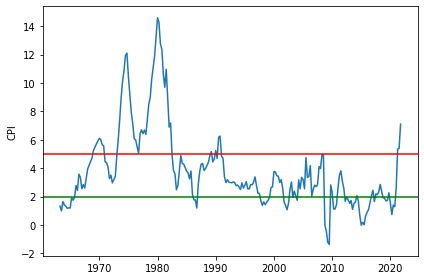

In [38]:
dates = df['DATE0']
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
plt.plot(x, df['CPI0'])
plt.axhline(y=2, color='g', linestyle='-')
plt.axhline(y=5, color='r', linestyle='-')
plt.ylabel("CPI")
plt.tight_layout()

The dangers of excessive inflation can be seen on the next plot, where CPI is combined with GDP figures. In several periods the measures mirror each other: high inflation is combined with low or even negative GDP.

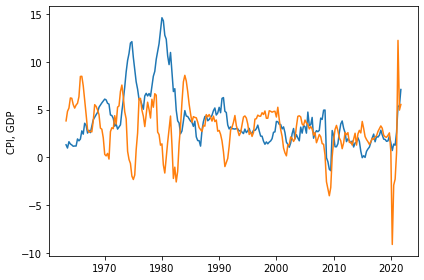

In [39]:
plt.plot(x, df['CPI0'])
plt.plot(x, df['GDP0'])
plt.ylabel("CPI, GDP")
plt.tight_layout()

Neural networks, Lasso regressions and Bayesian models will be used to discover the nature of inflation.

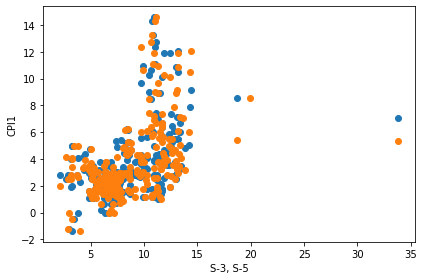

In [40]:
scatter = plt.scatter(df['S-5'],df['CPI1'])
scatter = plt.scatter(df['S-3'],df['CPI1'])
plt.xlabel("S-3, S-5")
plt.ylabel("CPI1")
plt.tight_layout()

In [41]:
df['CPI1'] = pd.to_numeric(df['CPI1'], errors='coerce')
df['CPIY4'] = pd.qcut(df['CPI1'], 2, labels=[1,2])
df['CPI1'].quantile([0.5])

0.5    3.01941
Name: CPI1, dtype: float64

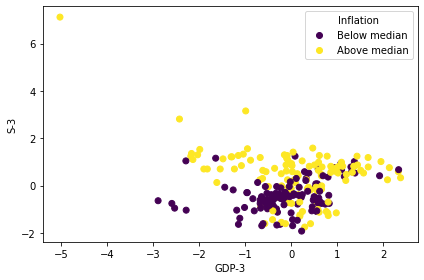

In [39]:
names = ['Below median', 'Above median']
scatter = plt.scatter(dfst['GDP-3'],dfst['S-3'],c=df['CPIY4'])
plt.legend(handles=scatter.legend_elements()[0], 
           labels=names,
           title="Inflation")
plt.xlabel("GDP-3")
plt.ylabel("S-3")
plt.tight_layout()

We won't be using CPIY4 anymore, so we can drop it from the dataframe.

In [40]:
df = df.drop('CPIY4', 1)

/tmp/ipykernel_85337/2625951594.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('CPIY4', 1)


## Neural networks
Neural networks are used to create a model for the prediction of next-quarter infaltion, using current, as well as past-quarter variables. These include the CPI index itself, the Producer Price Index (PPI), real GDP, the unemployment rate, government expenditures, the yield on AAA-rated corporate bonds, the yield on 10-year U.S Treasury bonds, the personal savings rate and labor productivity.
The models will be used to predict 3 types of targets:
1. CPIY1: rounded inflation rate
2. CPIY2: rise or fall in the inflation rate
3. CPIY3: category of inflation rate (low, moderate, elevated or alarming)

Models will be used on standardized and non-standardized explanatory variables.

### Predicting CPIY1 with non-standardized variables
CPIY1 consists of 17 categories, each containing values within the scope of 1 percentage point of inflation. For example, 6.7% inflation is denoted with the number 8, 4.2% with 5 and so on. Hence, we are testing the rate at which the neural network can correctly predict the percent-wide category into which next-quarter inflation lands.

In [41]:
df['CPIY1'].nunique()

17

#### Creating x (explanatory) and Y (target) arrays

In [42]:
df

CPI1 CPIY1 CPIY2 CPIY3       DATE0     CPI0      PPI0      GDP0   U0  \
0    0.98619   2.0     0     0  1963-04-01  1.32406   0.31746   3.82216  5.6   
1    1.64582   3.0     1     0  1963-07-01  0.98619  -0.94044   4.81693  5.5   
2    1.40937   2.0     0     0  1963-10-01  1.64582       0.0   5.15824  5.5   
3    1.30676   2.0     0     0  1964-01-01  1.40937   0.31746   6.21582  5.4   
4    1.17188   2.0     0     0  1964-04-01  1.30676  -0.31646   6.18075  5.2   
..       ...   ...   ...   ...         ...      ...       ...       ...  ...   
230  2.65838   4.0     1     1  2020-10-01  1.27815   0.75377  -2.26292  6.7   
231  5.34102   6.0     1     3  2021-01-01  2.65838  11.34127   0.54698  6.0   
232  5.38991   6.0     1     3  2021-04-01  5.34102  19.71757  12.22668  5.9   
233  7.09654   8.0     1     3  2021-07-01  5.38991  20.55141   4.94656  4.7   
234  8.55759  10.0     1     3  2021-10-01  7.09654  20.36808   5.53348  3.9   

    GOVSPEND0  ...   S-1   S-2   S-3   S-4   S-5 PROD-1 PROD-2 PROD-3 PROD-4  \
0     3.94545  ...  10.9  11.3  11.6  11.7  11.3    2.3    3.7    3.8    3.8   
1     4.07336  ...  10.7  10.9  11.3  11.6  11.7    3.5    2.3    3.7    3.8   
2     4.40262  ...  10.1  10.7  10.9  11.3  11.6    4.3    3.5    2.3    3.7   
3     5.09562  ...  11.5  10.1  10.7  10.9  11.3    3.5    4.3    3.5    2.3   
4      6.0126  ...  10.7  11.5  10.1  10.7  10.9    4.0    3.5    4.3    3.5   
..        ...  ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
230  23.45544  ...  18.7  33.8   7.8   7.4   7.0    3.7    2.5    0.9    2.4   
231  64.41446  ...  13.6  18.7  33.8   7.8   7.4    2.7    3.7    2.5    0.9   
232 -17.74758  ...  19.9  13.6  18.7  33.8   7.8    3.9    2.7    3.7    2.5   
233   -8.9697  ...  12.6  19.9  13.6  18.7  33.8    2.2    3.9    2.7    3.7   
234   0.13917  ...  10.5  12.6  19.9  13.6  18.7   -0.4    2.2    3.9    2.7   

    PROD-5  
0      7.0  
1      3.8  
2      3.8  
3      3.7  
4      2.3  
..     ...  
230    2.1  
231    2.4  
232    0.9  
233    2.5  
234    3.7  

[235 rows x 59 columns]

In [43]:
X = df.iloc[:,5:]
X = np.asarray(X).astype('float32')
X

array([[ 1.32406,  0.31746,  3.82216, ...,  3.8    ,  3.8    ,  7.     ],
       [ 0.98619, -0.94044,  4.81693, ...,  3.7    ,  3.8    ,  3.8    ],
       [ 1.64582,  0.     ,  5.15824, ...,  2.3    ,  3.7    ,  3.8    ],
       ...,
       [ 5.34102, 19.71757, 12.22668, ...,  3.7    ,  2.5    ,  0.9    ],
       [ 5.38991, 20.55141,  4.94656, ...,  2.7    ,  3.7    ,  2.5    ],
       [ 7.09654, 20.36808,  5.53348, ...,  3.9    ,  2.7    ,  3.7    ]],
      dtype=float32)

In [44]:
y = df.iloc[:,1]
y = np.asarray(y).astype('float32')
y

array([ 2.,  3.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  4.,  3.,  5.,
        4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  6.,  6.,  6.,  7.,  7.,
        7.,  7.,  7.,  7.,  5.,  5.,  5.,  4.,  5.,  4.,  4.,  4.,  6.,
        7.,  8., 10., 11., 12., 13., 13., 11., 10.,  9.,  8.,  7.,  7.,
        6.,  6.,  7.,  8.,  7.,  8.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 16., 15., 14., 13., 12., 11., 12., 10.,  8.,  8.,  6.,  5.,
        5.,  3.,  4.,  5.,  6.,  5.,  5.,  5.,  5.,  5.,  4.,  5.,  3.,
        3.,  3.,  2.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,
        5.,  6.,  6.,  6.,  7.,  7.,  6.,  6.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  3.,  3.,  3.,  2.,  3.,  2.,  3.,  3.,
        3.,  4.,  4.,  5.,  5.,  4.,  4.,  4.,  4.,  4.,  3.,  2.,  2.,
        3.,  3.,  4.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  6.,
        4.,  4.,  5.,  3.,  4.,  4.,  4.,  4.,  5.,  5.,  6.,  6

#### Splitting the variables into train and test sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=36)

NameError: name 'X' is not defined

In [46]:
X_train[0]

array([ 2.6764 ,  4.07166,  4.82763,  4.     ,  3.34171,  7.55   ,
        6.45   ,  4.4    ,  4.2    ,  2.62997,  1.9656 ,  1.7284 ,
        1.60692,  1.4268 ,  3.39257,  0.32051, -1.68404, -3.15457,
       -2.90196,  4.80021,  4.72753,  4.82186,  4.87954,  4.09777,
        4.2    ,  4.3    ,  4.2    ,  4.4    ,  4.6    ,  3.05652,
        1.96699,  2.44223,  1.54854,  1.73842,  7.39   ,  7.23   ,
        6.62   ,  6.22   ,  6.4    ,  5.9    ,  5.81   ,  5.25   ,
        4.65   ,  4.44   ,  4.8    ,  5.     ,  6.4    ,  6.2    ,
        6.9    ,  3.5    ,  3.9    ,  4.1    ,  3.6    ,  3.3    ],
      dtype=float32)

In [47]:
y_test[3]

11.0

#### Defining the relu and softmax functions

In [48]:
def relu(x):
    return np.clip(x,0,np.inf)
def softmax(x):
    return [np.exp(x[i])/np.sum(np.exp(x)) for i in range(len(x))]

#### Defining the model

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (54,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(17, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Running the model

In [50]:
model.fit(X_train, y_train, epochs=150)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)

Epoch 1/150
6/6 [==============================] - 1s 11ms/step - loss: 5.7637 - accuracy: 0.1524
Epoch 2/150
6/6 [==============================] - 0s 1ms/step - loss: 3.6821 - accuracy: 0.2134
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 2.7490 - accuracy: 0.2561
Epoch 4/150
6/6 [==============================] - 0s 1ms/step - loss: 2.5850 - accuracy: 0.3110
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 2.2296 - accuracy: 0.3720
Epoch 6/150
6/6 [==============================] - 0s 18ms/step - loss: 1.9445 - accuracy: 0.3902
Epoch 7/150
6/6 [==============================] - 0s 18ms/step - loss: 1.7804 - accuracy: 0.3841
Epoch 8/150
6/6 [==============================] - 0s 2ms/step - loss: 1.7162 - accuracy: 0.4085
Epoch 9/150
6/6 [==============================] - 0s 18ms/step - loss: 1.6155 - accuracy: 0.4451
Epoch 10/150
6/6 [==============================] - 0s 2ms/step - loss: 1.5594 - accuracy: 0.4634
Epoch 11/150
6/6 [=======

The model is correct in predicting future levels of inflation around half of the time.

#### Train and validation loss

In [51]:
history = model.fit(X_train,
                    y_train,
                    epochs=150,
                    batch_size=512,
                    validation_data=(X_test, y_test))

Epoch 1/150
1/1 [==============================] - 0s 104ms/step - loss: 0.1980 - accuracy: 0.9756 - val_loss: 2.7253 - val_accuracy: 0.4789
Epoch 2/150
1/1 [==============================] - 0s 17ms/step - loss: 0.1980 - accuracy: 0.9756 - val_loss: 2.7351 - val_accuracy: 0.4648
Epoch 3/150
1/1 [==============================] - 0s 83ms/step - loss: 0.1982 - accuracy: 0.9756 - val_loss: 2.7437 - val_accuracy: 0.4507
Epoch 4/150
1/1 [==============================] - 0s 82ms/step - loss: 0.1979 - accuracy: 0.9756 - val_loss: 2.7499 - val_accuracy: 0.4507
Epoch 5/150
1/1 [==============================] - 0s 18ms/step - loss: 0.1968 - accuracy: 0.9756 - val_loss: 2.7534 - val_accuracy: 0.4366
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.1950 - accuracy: 0.9756 - val_loss: 2.7553 - val_accuracy: 0.4366
Epoch 7/150
1/1 [==============================] - 0s 18ms/step - loss: 0.1931 - accuracy: 0.9756 - val_loss: 2.7568 - val_accuracy: 0.4366
Epoch 8/150
1/1 [==

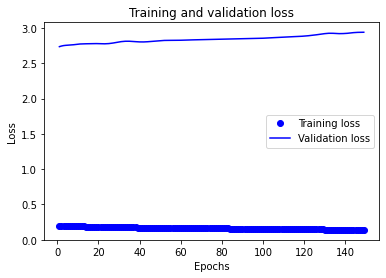

In [52]:
loss = history.history['loss'][1:]
val_loss = history.history['val_loss'][1:]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Not a lot of variance in training and validation loss over the course of epochs, although both show modest trends: training loss converging to lower values and validation loss rising slightly. 

Although rising validation loss may be a sign of overfitting, training loss changes at a similar, almost unnoticeable pace. The number of epochs is justified, as it allows the model to achieve the greatest accuracy, with only a slight risk of overfitting.

### Predicting CPIY1 with standardized variables

#### Creating x (explanatory) arrays

In [53]:
dfst

CPI1 CPIY1 CPIY2 CPIY3       DATE0      CPI0      PPI0      GDP0  \
0   -1.013164   2.0     0     0  1963-04-01 -0.887464 -0.594512  0.354718   
1   -0.781688   3.0     1     0  1963-07-01  -1.00652 -0.823908  0.758893   
2   -0.864663   2.0     0     0  1963-10-01 -0.774084 -0.652405  0.897568   
3   -0.900671   2.0     0     0  1964-01-01 -0.857403 -0.594512  1.327262   
4   -0.948002   2.0     0     0  1964-04-01  -0.89356 -0.710116  1.313013   
..        ...   ...   ...   ...         ...       ...       ...       ...   
230 -0.426363   4.0     1     1  2020-10-01 -0.903641 -0.514944  -2.11765   
231  0.515024   6.0     1     3  2021-01-01 -0.417285  1.415842 -0.975988   
232  0.532181   6.0     1     3  2021-04-01  0.528007  2.943384  3.769475   
233  1.131068   8.0     1     3  2021-07-01  0.545235  3.095447  0.811562   
234  1.643777  10.0     1     3  2021-10-01  1.146606  3.062014  1.050028   

           U0 GOVSPEND0  ...       S-1       S-2       S-3       S-4  \
0   -0.226025 -0.420087  ...  0.588425  0.701144  0.788772  0.844262   
1   -0.285706 -0.405377  ...  0.531379  0.587117  0.703154  0.815137   
2   -0.285706 -0.367508  ...   0.36024  0.530104  0.588998  0.727761   
3   -0.345386 -0.287806  ...  0.759563  0.359064   0.53192   0.61126   
4   -0.464748 -0.182344  ...  0.531379  0.758158  0.360685  0.553009   
..        ...       ...  ...       ...       ...       ...       ...   
230  0.430463  1.823762  ...  2.813224  7.115159 -0.295713 -0.408126   
231  0.012698   6.53447  ...  1.358548  2.810642  7.124447 -0.291625   
232 -0.046983 -2.915009  ...  3.155501  1.356799  2.815046  7.280958   
233 -0.763151 -1.905462  ...  1.073317  3.152723  1.359553  2.883035   
234 -1.240597 -0.857849  ...  0.474333  1.071732  3.157515  1.397643   

          S-5    PROD-1    PROD-2    PROD-3    PROD-4    PROD-5  
0    0.732848  0.198748  1.052994  1.107655   1.10825   3.00956  
1    0.849705  0.938153  0.188419  1.046061   1.10825  1.075871  
2    0.820491  1.431089  0.929484  0.183736  1.046637  1.075871  
3    0.732848  0.938153  1.423526  0.922871  0.184053  1.015444  
4     0.61599  1.246238  0.929484  1.415629   0.92341  0.169455  
..        ...       ...       ...       ...       ...       ...  
230 -0.523374  1.061387   0.31193  -0.67859  0.245666  0.048599  
231 -0.406516  0.445216  1.052994  0.306925 -0.678531  0.229883  
232 -0.289658  1.184621  0.435441  1.046061  0.307279 -0.676534  
233  7.306099  0.137131  1.176505  0.430114  1.046637   0.29031  
234  2.894717 -1.464913  0.126664   1.16925  0.430505  1.015444  

[235 rows x 59 columns]

In [54]:
X = dfst.iloc[:,5:]
X = np.asarray(X).astype('float32')
X

array([[-0.8874638 , -0.5945117 ,  0.35471815, ...,  1.1076554 ,
         1.1082497 ,  3.0095599 ],
       [-1.0065203 , -0.82390827,  0.75889325, ...,  1.0460607 ,
         1.1082497 ,  1.0758713 ],
       [-0.7740841 , -0.6524052 ,  0.8975676 , ...,  0.18373555,
         1.0466366 ,  1.0758713 ],
       ...,
       [ 0.528007  ,  2.9433837 ,  3.7694752 , ...,  1.0460607 ,
         0.30727908, -0.6765338 ],
       [ 0.5452345 ,  3.0954466 ,  0.81156194, ...,  0.43011418,
         1.0466366 ,  0.2903104 ],
       [ 1.146606  ,  3.0620136 ,  1.0500276 , ...,  1.16925   ,
         0.4305053 ,  1.0154436 ]], dtype=float32)

In [55]:
y

array([ 2.,  3.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  4.,  3.,  5.,
        4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  6.,  6.,  6.,  7.,  7.,
        7.,  7.,  7.,  7.,  5.,  5.,  5.,  4.,  5.,  4.,  4.,  4.,  6.,
        7.,  8., 10., 11., 12., 13., 13., 11., 10.,  9.,  8.,  7.,  7.,
        6.,  6.,  7.,  8.,  7.,  8.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 16., 15., 14., 13., 12., 11., 12., 10.,  8.,  8.,  6.,  5.,
        5.,  3.,  4.,  5.,  6.,  5.,  5.,  5.,  5.,  5.,  4.,  5.,  3.,
        3.,  3.,  2.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,
        5.,  6.,  6.,  6.,  7.,  7.,  6.,  6.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  3.,  3.,  3.,  2.,  3.,  2.,  3.,  3.,
        3.,  4.,  4.,  5.,  5.,  4.,  4.,  4.,  4.,  4.,  3.,  2.,  2.,
        3.,  3.,  4.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  6.,
        4.,  4.,  5.,  3.,  4.,  4.,  4.,  4.,  5.,  5.,  6.,  6

No need to standardize the target variable

#### Splitting the variables into train and test sets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=96)

#### Defining the relu and softmax functions

In [57]:
def relu(x):
    return np.clip(x,0,np.inf)
def softmax(x):
    return [np.exp(x[i])/np.sum(np.exp(x)) for i in range(len(x))]

#### Defining the model

In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (54,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(17, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Running the model

In [59]:
model.fit(X_train, y_train, epochs=150)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)

Epoch 1/150
6/6 [==============================] - 0s 1ms/step - loss: 3.1142 - accuracy: 0.0427
Epoch 2/150
6/6 [==============================] - 0s 1ms/step - loss: 2.7009 - accuracy: 0.1524
Epoch 3/150
6/6 [==============================] - 0s 1ms/step - loss: 2.3951 - accuracy: 0.3049
Epoch 4/150
6/6 [==============================] - 0s 18ms/step - loss: 2.1750 - accuracy: 0.3415
Epoch 5/150
6/6 [==============================] - 0s 1ms/step - loss: 2.0061 - accuracy: 0.3963
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 1.8650 - accuracy: 0.4573
Epoch 7/150
6/6 [==============================] - 0s 1ms/step - loss: 1.7581 - accuracy: 0.5000
Epoch 8/150
6/6 [==============================] - 0s 1ms/step - loss: 1.6624 - accuracy: 0.5122
Epoch 9/150
6/6 [==============================] - 0s 18ms/step - loss: 1.5819 - accuracy: 0.5366
Epoch 10/150
6/6 [==============================] - 0s 1ms/step - loss: 1.5176 - accuracy: 0.5549
Epoch 11/150
6/6 [=========

The model with standardized variables is roughly as accurate as the one without.

#### Train and validation loss

In [60]:
history = model.fit(X_train,
                    y_train,
                    epochs=150,
                    batch_size=512,
                    validation_data=(X_test, y_test))

Epoch 1/150
1/1 [==============================] - 0s 102ms/step - loss: 0.1773 - accuracy: 0.9878 - val_loss: 2.5136 - val_accuracy: 0.4930
Epoch 2/150
1/1 [==============================] - 0s 73ms/step - loss: 0.1769 - accuracy: 0.9878 - val_loss: 2.5178 - val_accuracy: 0.4930
Epoch 3/150
1/1 [==============================] - 0s 17ms/step - loss: 0.1766 - accuracy: 0.9878 - val_loss: 2.5218 - val_accuracy: 0.4930
Epoch 4/150
1/1 [==============================] - 0s 89ms/step - loss: 0.1763 - accuracy: 0.9817 - val_loss: 2.5255 - val_accuracy: 0.4930
Epoch 5/150
1/1 [==============================] - 0s 17ms/step - loss: 0.1761 - accuracy: 0.9817 - val_loss: 2.5289 - val_accuracy: 0.4930
Epoch 6/150
1/1 [==============================] - 0s 81ms/step - loss: 0.1758 - accuracy: 0.9878 - val_loss: 2.5320 - val_accuracy: 0.4930
Epoch 7/150
1/1 [==============================] - 0s 17ms/step - loss: 0.1755 - accuracy: 0.9878 - val_loss: 2.5348 - val_accuracy: 0.4930
Epoch 8/150
1/1 [==

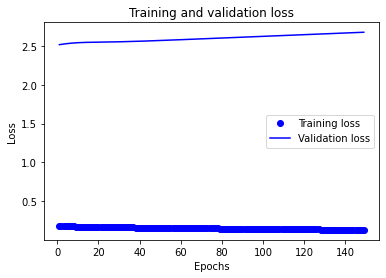

In [61]:
loss = history.history['loss'][1:]
val_loss = history.history['val_loss'][1:]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training and validation loss trends are similar to the model with non-standardized variables.

### Predicting CPIY2 with non-standardized variables
CPIY2 indicates whether inflation (as measured by CPI1) has risen in comparison to the last quarter (CPI0): 1 indicates growth, 0 indicates decline in the inflation rate. Hence, we are testing the rate at which the neural network can correctly predict whether inflation will rise or fall.

#### Creating the y (target) and X (explanatory) arrays

In [62]:
df

CPI1 CPIY1 CPIY2 CPIY3       DATE0     CPI0      PPI0      GDP0   U0  \
0    0.98619   2.0     0     0  1963-04-01  1.32406   0.31746   3.82216  5.6   
1    1.64582   3.0     1     0  1963-07-01  0.98619  -0.94044   4.81693  5.5   
2    1.40937   2.0     0     0  1963-10-01  1.64582       0.0   5.15824  5.5   
3    1.30676   2.0     0     0  1964-01-01  1.40937   0.31746   6.21582  5.4   
4    1.17188   2.0     0     0  1964-04-01  1.30676  -0.31646   6.18075  5.2   
..       ...   ...   ...   ...         ...      ...       ...       ...  ...   
230  2.65838   4.0     1     1  2020-10-01  1.27815   0.75377  -2.26292  6.7   
231  5.34102   6.0     1     3  2021-01-01  2.65838  11.34127   0.54698  6.0   
232  5.38991   6.0     1     3  2021-04-01  5.34102  19.71757  12.22668  5.9   
233  7.09654   8.0     1     3  2021-07-01  5.38991  20.55141   4.94656  4.7   
234  8.55759  10.0     1     3  2021-10-01  7.09654  20.36808   5.53348  3.9   

    GOVSPEND0  ...   S-1   S-2   S-3   S-4   S-5 PROD-1 PROD-2 PROD-3 PROD-4  \
0     3.94545  ...  10.9  11.3  11.6  11.7  11.3    2.3    3.7    3.8    3.8   
1     4.07336  ...  10.7  10.9  11.3  11.6  11.7    3.5    2.3    3.7    3.8   
2     4.40262  ...  10.1  10.7  10.9  11.3  11.6    4.3    3.5    2.3    3.7   
3     5.09562  ...  11.5  10.1  10.7  10.9  11.3    3.5    4.3    3.5    2.3   
4      6.0126  ...  10.7  11.5  10.1  10.7  10.9    4.0    3.5    4.3    3.5   
..        ...  ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
230  23.45544  ...  18.7  33.8   7.8   7.4   7.0    3.7    2.5    0.9    2.4   
231  64.41446  ...  13.6  18.7  33.8   7.8   7.4    2.7    3.7    2.5    0.9   
232 -17.74758  ...  19.9  13.6  18.7  33.8   7.8    3.9    2.7    3.7    2.5   
233   -8.9697  ...  12.6  19.9  13.6  18.7  33.8    2.2    3.9    2.7    3.7   
234   0.13917  ...  10.5  12.6  19.9  13.6  18.7   -0.4    2.2    3.9    2.7   

    PROD-5  
0      7.0  
1      3.8  
2      3.8  
3      3.7  
4      2.3  
..     ...  
230    2.1  
231    2.4  
232    0.9  
233    2.5  
234    3.7  

[235 rows x 59 columns]

In [63]:
y = df.iloc[:,2]
y = np.asarray(y).astype('float32')
y

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1.

In [64]:
X = df.iloc[:,5:]
X = np.asarray(X).astype('float32')
X

array([[ 1.32406,  0.31746,  3.82216, ...,  3.8    ,  3.8    ,  7.     ],
       [ 0.98619, -0.94044,  4.81693, ...,  3.7    ,  3.8    ,  3.8    ],
       [ 1.64582,  0.     ,  5.15824, ...,  2.3    ,  3.7    ,  3.8    ],
       ...,
       [ 5.34102, 19.71757, 12.22668, ...,  3.7    ,  2.5    ,  0.9    ],
       [ 5.38991, 20.55141,  4.94656, ...,  2.7    ,  3.7    ,  2.5    ],
       [ 7.09654, 20.36808,  5.53348, ...,  3.9    ,  2.7    ,  3.7    ]],
      dtype=float32)

#### Splitting the variables into train and test sets

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

#### Defining the relu and softmax functions

In [66]:
def relu(x):
    return np.clip(x,0,np.inf)
def softmax(x):
    return [np.exp(x[i])/np.sum(np.exp(x)) for i in range(len(x))]

#### Defining the model

In [67]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (54,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Running the model

In [68]:
model.fit(X_train, y_train, epochs=75)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)

Epoch 1/75
6/6 [==============================] - 0s 1ms/step - loss: 1.6327 - accuracy: 0.5122
Epoch 2/75
6/6 [==============================] - 0s 1ms/step - loss: 0.9872 - accuracy: 0.5671
Epoch 3/75
6/6 [==============================] - 0s 17ms/step - loss: 0.7893 - accuracy: 0.5671
Epoch 4/75
6/6 [==============================] - 0s 1ms/step - loss: 0.7477 - accuracy: 0.5854
Epoch 5/75
6/6 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6280
Epoch 6/75
6/6 [==============================] - 0s 1ms/step - loss: 0.6405 - accuracy: 0.6341
Epoch 7/75
6/6 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.6402
Epoch 8/75
6/6 [==============================] - 0s 17ms/step - loss: 0.5940 - accuracy: 0.6463
Epoch 9/75
6/6 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.7073
Epoch 10/75
6/6 [==============================] - 0s 17ms/step - loss: 0.6561 - accuracy: 0.6463
Epoch 11/75
6/6 [===================

The model is correct in predicting whether inflation will rise or fall slightly more than half of the time.

#### Train and validation loss

In [69]:
history = model.fit(X_train,
                    y_train,
                    epochs=75,
                    batch_size=512,
                    validation_data=(X_test, y_test))

Epoch 1/75
1/1 [==============================] - 0s 94ms/step - loss: 0.2986 - accuracy: 0.8537 - val_loss: 1.9792 - val_accuracy: 0.5211
Epoch 2/75
1/1 [==============================] - 0s 15ms/step - loss: 0.4246 - accuracy: 0.7439 - val_loss: 2.1193 - val_accuracy: 0.5211
Epoch 3/75
1/1 [==============================] - 0s 82ms/step - loss: 0.4928 - accuracy: 0.7134 - val_loss: 2.0524 - val_accuracy: 0.5211
Epoch 4/75
1/1 [==============================] - 0s 15ms/step - loss: 0.4526 - accuracy: 0.7317 - val_loss: 1.8323 - val_accuracy: 0.5493
Epoch 5/75
1/1 [==============================] - 0s 81ms/step - loss: 0.3423 - accuracy: 0.8232 - val_loss: 1.5823 - val_accuracy: 0.5352
Epoch 6/75
1/1 [==============================] - 0s 17ms/step - loss: 0.2484 - accuracy: 0.9146 - val_loss: 1.4165 - val_accuracy: 0.5775
Epoch 7/75
1/1 [==============================] - 0s 17ms/step - loss: 0.2346 - accuracy: 0.9512 - val_loss: 1.3600 - val_accuracy: 0.5915
Epoch 8/75
1/1 [===========

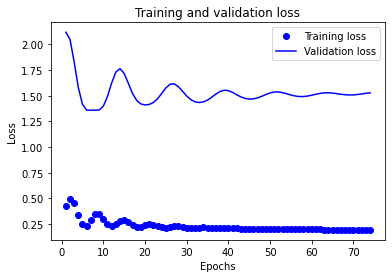

In [70]:
loss = history.history['loss'][1:]
val_loss = history.history['val_loss'][1:]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The lower number of epochs (75) is justified due to the nature of the target variable, which includes only two values. Much less training is required than in the case of CPIY1, which included 17 unique variables to choose from. This allows to minimize the risk of overfitting, while keeping training loss low as well, as illustrated by the validation loss plot.

### Predicting CPIY2 with standardized variables

#### Creating x (explanatory) arrays

In [71]:
dfst

CPI1 CPIY1 CPIY2 CPIY3       DATE0      CPI0      PPI0      GDP0  \
0   -1.013164   2.0     0     0  1963-04-01 -0.887464 -0.594512  0.354718   
1   -0.781688   3.0     1     0  1963-07-01  -1.00652 -0.823908  0.758893   
2   -0.864663   2.0     0     0  1963-10-01 -0.774084 -0.652405  0.897568   
3   -0.900671   2.0     0     0  1964-01-01 -0.857403 -0.594512  1.327262   
4   -0.948002   2.0     0     0  1964-04-01  -0.89356 -0.710116  1.313013   
..        ...   ...   ...   ...         ...       ...       ...       ...   
230 -0.426363   4.0     1     1  2020-10-01 -0.903641 -0.514944  -2.11765   
231  0.515024   6.0     1     3  2021-01-01 -0.417285  1.415842 -0.975988   
232  0.532181   6.0     1     3  2021-04-01  0.528007  2.943384  3.769475   
233  1.131068   8.0     1     3  2021-07-01  0.545235  3.095447  0.811562   
234  1.643777  10.0     1     3  2021-10-01  1.146606  3.062014  1.050028   

           U0 GOVSPEND0  ...       S-1       S-2       S-3       S-4  \
0   -0.226025 -0.420087  ...  0.588425  0.701144  0.788772  0.844262   
1   -0.285706 -0.405377  ...  0.531379  0.587117  0.703154  0.815137   
2   -0.285706 -0.367508  ...   0.36024  0.530104  0.588998  0.727761   
3   -0.345386 -0.287806  ...  0.759563  0.359064   0.53192   0.61126   
4   -0.464748 -0.182344  ...  0.531379  0.758158  0.360685  0.553009   
..        ...       ...  ...       ...       ...       ...       ...   
230  0.430463  1.823762  ...  2.813224  7.115159 -0.295713 -0.408126   
231  0.012698   6.53447  ...  1.358548  2.810642  7.124447 -0.291625   
232 -0.046983 -2.915009  ...  3.155501  1.356799  2.815046  7.280958   
233 -0.763151 -1.905462  ...  1.073317  3.152723  1.359553  2.883035   
234 -1.240597 -0.857849  ...  0.474333  1.071732  3.157515  1.397643   

          S-5    PROD-1    PROD-2    PROD-3    PROD-4    PROD-5  
0    0.732848  0.198748  1.052994  1.107655   1.10825   3.00956  
1    0.849705  0.938153  0.188419  1.046061   1.10825  1.075871  
2    0.820491  1.431089  0.929484  0.183736  1.046637  1.075871  
3    0.732848  0.938153  1.423526  0.922871  0.184053  1.015444  
4     0.61599  1.246238  0.929484  1.415629   0.92341  0.169455  
..        ...       ...       ...       ...       ...       ...  
230 -0.523374  1.061387   0.31193  -0.67859  0.245666  0.048599  
231 -0.406516  0.445216  1.052994  0.306925 -0.678531  0.229883  
232 -0.289658  1.184621  0.435441  1.046061  0.307279 -0.676534  
233  7.306099  0.137131  1.176505  0.430114  1.046637   0.29031  
234  2.894717 -1.464913  0.126664   1.16925  0.430505  1.015444  

[235 rows x 59 columns]

In [72]:
X = dfst.iloc[:,5:]
X = np.asarray(X).astype('float32')
X

array([[-0.8874638 , -0.5945117 ,  0.35471815, ...,  1.1076554 ,
         1.1082497 ,  3.0095599 ],
       [-1.0065203 , -0.82390827,  0.75889325, ...,  1.0460607 ,
         1.1082497 ,  1.0758713 ],
       [-0.7740841 , -0.6524052 ,  0.8975676 , ...,  0.18373555,
         1.0466366 ,  1.0758713 ],
       ...,
       [ 0.528007  ,  2.9433837 ,  3.7694752 , ...,  1.0460607 ,
         0.30727908, -0.6765338 ],
       [ 0.5452345 ,  3.0954466 ,  0.81156194, ...,  0.43011418,
         1.0466366 ,  0.2903104 ],
       [ 1.146606  ,  3.0620136 ,  1.0500276 , ...,  1.16925   ,
         0.4305053 ,  1.0154436 ]], dtype=float32)

In [73]:
y

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1.

#### Splitting the variables into train and test sets

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=29)

#### Defining the relu and softmax functions

In [75]:
def relu(x):
    return np.clip(x,0,np.inf)
def softmax(x):
    return [np.exp(x[i])/np.sum(np.exp(x)) for i in range(len(x))]

#### Defining the model

In [76]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (54,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Running the model

In [77]:
model.fit(X_train, y_train, epochs=75)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)

Epoch 1/75
6/6 [==============================] - 0s 1ms/step - loss: 0.7836 - accuracy: 0.4939
Epoch 2/75
6/6 [==============================] - 0s 15ms/step - loss: 0.6588 - accuracy: 0.6280
Epoch 3/75
6/6 [==============================] - 0s 1ms/step - loss: 0.6123 - accuracy: 0.6890
Epoch 4/75
6/6 [==============================] - 0s 1ms/step - loss: 0.6015 - accuracy: 0.6890
Epoch 5/75
6/6 [==============================] - 0s 17ms/step - loss: 0.5702 - accuracy: 0.7195
Epoch 6/75
6/6 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.7378
Epoch 7/75
6/6 [==============================] - 0s 17ms/step - loss: 0.5399 - accuracy: 0.7256
Epoch 8/75
6/6 [==============================] - 0s 1ms/step - loss: 0.5241 - accuracy: 0.7439
Epoch 9/75
6/6 [==============================] - 0s 17ms/step - loss: 0.5135 - accuracy: 0.7256
Epoch 10/75
6/6 [==============================] - 0s 1ms/step - loss: 0.5041 - accuracy: 0.7500
Epoch 11/75
6/6 [==================

The model with standardized variables is roughly as accurate as the one without.

#### Train and validation loss

In [78]:
history = model.fit(X_train,
                    y_train,
                    epochs=75,
                    batch_size=512,
                    validation_data=(X_test, y_test))

Epoch 1/75
1/1 [==============================] - 0s 102ms/step - loss: 0.2322 - accuracy: 0.9207 - val_loss: 1.0810 - val_accuracy: 0.6056
Epoch 2/75
1/1 [==============================] - 0s 17ms/step - loss: 0.2320 - accuracy: 0.9207 - val_loss: 1.0820 - val_accuracy: 0.5915
Epoch 3/75
1/1 [==============================] - 0s 88ms/step - loss: 0.2305 - accuracy: 0.9207 - val_loss: 1.0814 - val_accuracy: 0.5775
Epoch 4/75
1/1 [==============================] - 0s 94ms/step - loss: 0.2280 - accuracy: 0.9390 - val_loss: 1.0798 - val_accuracy: 0.5634
Epoch 5/75
1/1 [==============================] - 0s 18ms/step - loss: 0.2250 - accuracy: 0.9390 - val_loss: 1.0776 - val_accuracy: 0.5634
Epoch 6/75
1/1 [==============================] - 0s 18ms/step - loss: 0.2220 - accuracy: 0.9451 - val_loss: 1.0751 - val_accuracy: 0.5775
Epoch 7/75
1/1 [==============================] - 0s 85ms/step - loss: 0.2192 - accuracy: 0.9451 - val_loss: 1.0728 - val_accuracy: 0.5775
Epoch 8/75
1/1 [==========

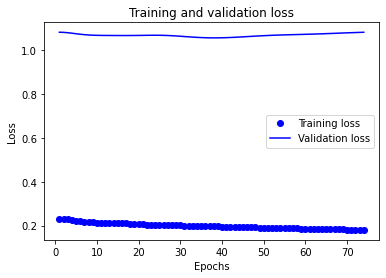

In [79]:
loss = history.history['loss'][1:]
val_loss = history.history['val_loss'][1:]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training and validation loss values are similar to the model with non-standardized variables, although the plot for standardized variables shows much less variance in training and validation loss for the first epochs.

### Predicting CPIY3 with non-standardized variables
For this variable, the neural network will try to predict one of four quantiles in which target inflation lands.

#### Creating the y (target) and X (explanatory) arrays

In [80]:
df

CPI1 CPIY1 CPIY2 CPIY3       DATE0     CPI0      PPI0      GDP0   U0  \
0    0.98619   2.0     0     0  1963-04-01  1.32406   0.31746   3.82216  5.6   
1    1.64582   3.0     1     0  1963-07-01  0.98619  -0.94044   4.81693  5.5   
2    1.40937   2.0     0     0  1963-10-01  1.64582       0.0   5.15824  5.5   
3    1.30676   2.0     0     0  1964-01-01  1.40937   0.31746   6.21582  5.4   
4    1.17188   2.0     0     0  1964-04-01  1.30676  -0.31646   6.18075  5.2   
..       ...   ...   ...   ...         ...      ...       ...       ...  ...   
230  2.65838   4.0     1     1  2020-10-01  1.27815   0.75377  -2.26292  6.7   
231  5.34102   6.0     1     3  2021-01-01  2.65838  11.34127   0.54698  6.0   
232  5.38991   6.0     1     3  2021-04-01  5.34102  19.71757  12.22668  5.9   
233  7.09654   8.0     1     3  2021-07-01  5.38991  20.55141   4.94656  4.7   
234  8.55759  10.0     1     3  2021-10-01  7.09654  20.36808   5.53348  3.9   

    GOVSPEND0  ...   S-1   S-2   S-3   S-4   S-5 PROD-1 PROD-2 PROD-3 PROD-4  \
0     3.94545  ...  10.9  11.3  11.6  11.7  11.3    2.3    3.7    3.8    3.8   
1     4.07336  ...  10.7  10.9  11.3  11.6  11.7    3.5    2.3    3.7    3.8   
2     4.40262  ...  10.1  10.7  10.9  11.3  11.6    4.3    3.5    2.3    3.7   
3     5.09562  ...  11.5  10.1  10.7  10.9  11.3    3.5    4.3    3.5    2.3   
4      6.0126  ...  10.7  11.5  10.1  10.7  10.9    4.0    3.5    4.3    3.5   
..        ...  ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
230  23.45544  ...  18.7  33.8   7.8   7.4   7.0    3.7    2.5    0.9    2.4   
231  64.41446  ...  13.6  18.7  33.8   7.8   7.4    2.7    3.7    2.5    0.9   
232 -17.74758  ...  19.9  13.6  18.7  33.8   7.8    3.9    2.7    3.7    2.5   
233   -8.9697  ...  12.6  19.9  13.6  18.7  33.8    2.2    3.9    2.7    3.7   
234   0.13917  ...  10.5  12.6  19.9  13.6  18.7   -0.4    2.2    3.9    2.7   

    PROD-5  
0      7.0  
1      3.8  
2      3.8  
3      3.7  
4      2.3  
..     ...  
230    2.1  
231    2.4  
232    0.9  
233    2.5  
234    3.7  

[235 rows x 59 columns]

In [81]:
y = df.iloc[:,3]
y = np.asarray(y).astype('float32')
y

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 2., 2., 1., 1., 1.,
       2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2.,
       2., 1., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 1., 1., 2., 3., 2., 2.,
       2., 2., 2., 2., 2., 1., 0., 0., 0., 1., 2., 2., 2., 2., 2., 2., 2.,
       3., 3., 2., 2., 3., 2., 3., 3., 3., 2., 2., 1., 2., 2., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1.,
       0., 0., 0., 0., 1., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 2.,
       2., 2., 1., 1., 1., 1., 1., 2., 2., 3., 3., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 2., 2., 2., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1.

In [82]:
X = df.iloc[:,5:]
X = np.asarray(X).astype('float32')
X

array([[ 1.32406,  0.31746,  3.82216, ...,  3.8    ,  3.8    ,  7.     ],
       [ 0.98619, -0.94044,  4.81693, ...,  3.7    ,  3.8    ,  3.8    ],
       [ 1.64582,  0.     ,  5.15824, ...,  2.3    ,  3.7    ,  3.8    ],
       ...,
       [ 5.34102, 19.71757, 12.22668, ...,  3.7    ,  2.5    ,  0.9    ],
       [ 5.38991, 20.55141,  4.94656, ...,  2.7    ,  3.7    ,  2.5    ],
       [ 7.09654, 20.36808,  5.53348, ...,  3.9    ,  2.7    ,  3.7    ]],
      dtype=float32)

#### Splitting the variables into train and test sets

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=20)

#### Defining the relu and softmax functions

In [84]:
def relu(x):
    return np.clip(x,0,np.inf)
def softmax(x):
    return [np.exp(x[i])/np.sum(np.exp(x)) for i in range(len(x))]

#### Defining the model

In [85]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (54,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Running the model

In [86]:
model.fit(X_train, y_train, epochs=125)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)

Epoch 1/125
6/6 [==============================] - 0s 13ms/step - loss: 2.7383 - accuracy: 0.3720
Epoch 2/125
6/6 [==============================] - 0s 1ms/step - loss: 1.9198 - accuracy: 0.4451
Epoch 3/125
6/6 [==============================] - 0s 18ms/step - loss: 1.3136 - accuracy: 0.5244
Epoch 4/125
6/6 [==============================] - 0s 1ms/step - loss: 1.2829 - accuracy: 0.5488
Epoch 5/125
6/6 [==============================] - 0s 17ms/step - loss: 1.0868 - accuracy: 0.5732
Epoch 6/125
6/6 [==============================] - 0s 1ms/step - loss: 1.0102 - accuracy: 0.5915
Epoch 7/125
6/6 [==============================] - 0s 18ms/step - loss: 0.8837 - accuracy: 0.6585
Epoch 8/125
6/6 [==============================] - 0s 1ms/step - loss: 0.9458 - accuracy: 0.6098
Epoch 9/125
6/6 [==============================] - 0s 2ms/step - loss: 0.9300 - accuracy: 0.5793
Epoch 10/125
6/6 [==============================] - 0s 1ms/step - loss: 0.8991 - accuracy: 0.6159
Epoch 11/125
6/6 [=======

The model is correct in predicting the future inlfation group even two-thirds of the time.

#### Train and validation loss

In [87]:
history = model.fit(X_train,
                    y_train,
                    epochs=125,
                    batch_size=512,
                    validation_data=(X_test, y_test))

Epoch 1/125
1/1 [==============================] - 0s 106ms/step - loss: 0.1777 - accuracy: 0.9817 - val_loss: 0.7182 - val_accuracy: 0.6761
Epoch 2/125
1/1 [==============================] - 0s 16ms/step - loss: 0.1787 - accuracy: 0.9817 - val_loss: 0.7174 - val_accuracy: 0.6761
Epoch 3/125
1/1 [==============================] - 0s 93ms/step - loss: 0.1834 - accuracy: 0.9878 - val_loss: 0.7231 - val_accuracy: 0.6620
Epoch 4/125
1/1 [==============================] - 0s 78ms/step - loss: 0.1877 - accuracy: 0.9756 - val_loss: 0.7292 - val_accuracy: 0.6620
Epoch 5/125
1/1 [==============================] - 0s 17ms/step - loss: 0.1885 - accuracy: 0.9695 - val_loss: 0.7334 - val_accuracy: 0.6620
Epoch 6/125
1/1 [==============================] - 0s 86ms/step - loss: 0.1851 - accuracy: 0.9695 - val_loss: 0.7377 - val_accuracy: 0.6761
Epoch 7/125
1/1 [==============================] - 0s 15ms/step - loss: 0.1795 - accuracy: 0.9695 - val_loss: 0.7454 - val_accuracy: 0.6761
Epoch 8/125
1/1 [==

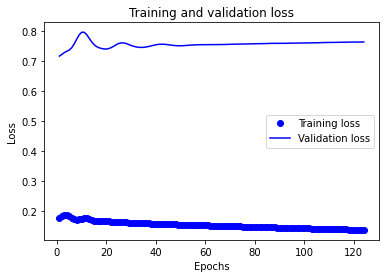

In [88]:
loss = history.history['loss'][1:]
val_loss = history.history['val_loss'][1:]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Predicting CPIY3 with standardized variables

#### Creating X (explanatory) arrays

In [89]:
X = dfst.iloc[:,5:]
X = np.asarray(X).astype('float32')
X

array([[-0.8874638 , -0.5945117 ,  0.35471815, ...,  1.1076554 ,
         1.1082497 ,  3.0095599 ],
       [-1.0065203 , -0.82390827,  0.75889325, ...,  1.0460607 ,
         1.1082497 ,  1.0758713 ],
       [-0.7740841 , -0.6524052 ,  0.8975676 , ...,  0.18373555,
         1.0466366 ,  1.0758713 ],
       ...,
       [ 0.528007  ,  2.9433837 ,  3.7694752 , ...,  1.0460607 ,
         0.30727908, -0.6765338 ],
       [ 0.5452345 ,  3.0954466 ,  0.81156194, ...,  0.43011418,
         1.0466366 ,  0.2903104 ],
       [ 1.146606  ,  3.0620136 ,  1.0500276 , ...,  1.16925   ,
         0.4305053 ,  1.0154436 ]], dtype=float32)

In [90]:
y

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 2., 2., 1., 1., 1.,
       2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2.,
       2., 1., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 1., 1., 2., 3., 2., 2.,
       2., 2., 2., 2., 2., 1., 0., 0., 0., 1., 2., 2., 2., 2., 2., 2., 2.,
       3., 3., 2., 2., 3., 2., 3., 3., 3., 2., 2., 1., 2., 2., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1.,
       0., 0., 0., 0., 1., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 2.,
       2., 2., 1., 1., 1., 1., 1., 2., 2., 3., 3., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 2., 2., 2., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1.

#### Splitting the variables into train and test sets

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=98)

#### Defining the relu and softmax functions

In [92]:
def relu(x):
    return np.clip(x,0,np.inf)
def softmax(x):
    return [np.exp(x[i])/np.sum(np.exp(x)) for i in range(len(x))]

#### Defining the model

In [93]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (54,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Running the model

In [94]:
model.fit(X_train, y_train, epochs=125)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)

Epoch 1/125
6/6 [==============================] - 0s 14ms/step - loss: 1.6117 - accuracy: 0.2073
Epoch 2/125
6/6 [==============================] - 0s 1ms/step - loss: 1.2154 - accuracy: 0.4939
Epoch 3/125
6/6 [==============================] - 0s 1ms/step - loss: 1.0503 - accuracy: 0.5488
Epoch 4/125
6/6 [==============================] - 0s 1ms/step - loss: 0.9631 - accuracy: 0.5854
Epoch 5/125
6/6 [==============================] - 0s 1ms/step - loss: 0.8969 - accuracy: 0.6280
Epoch 6/125
6/6 [==============================] - 0s 17ms/step - loss: 0.8418 - accuracy: 0.6768
Epoch 7/125
6/6 [==============================] - 0s 1ms/step - loss: 0.8009 - accuracy: 0.6951
Epoch 8/125
6/6 [==============================] - 0s 1ms/step - loss: 0.7643 - accuracy: 0.7317
Epoch 9/125
6/6 [==============================] - 0s 2ms/step - loss: 0.7330 - accuracy: 0.7622
Epoch 10/125
6/6 [==============================] - 0s 1ms/step - loss: 0.7088 - accuracy: 0.7988
Epoch 11/125
6/6 [=========

The model with standardized variables is slightly less accurate than the one without.

#### Train and validation loss

In [95]:
history = model.fit(X_train,
                    y_train,
                    epochs=125,
                    batch_size=512,
                    validation_data=(X_test, y_test))

Epoch 1/125
1/1 [==============================] - 0s 107ms/step - loss: 0.1221 - accuracy: 0.9878 - val_loss: 1.2475 - val_accuracy: 0.5775
Epoch 2/125
1/1 [==============================] - 0s 18ms/step - loss: 0.1217 - accuracy: 0.9878 - val_loss: 1.2493 - val_accuracy: 0.5775
Epoch 3/125
1/1 [==============================] - 0s 87ms/step - loss: 0.1213 - accuracy: 0.9878 - val_loss: 1.2510 - val_accuracy: 0.5915
Epoch 4/125
1/1 [==============================] - 0s 87ms/step - loss: 0.1210 - accuracy: 0.9878 - val_loss: 1.2524 - val_accuracy: 0.5915
Epoch 5/125
1/1 [==============================] - 0s 18ms/step - loss: 0.1206 - accuracy: 0.9878 - val_loss: 1.2537 - val_accuracy: 0.5915
Epoch 6/125
1/1 [==============================] - 0s 96ms/step - loss: 0.1203 - accuracy: 0.9878 - val_loss: 1.2547 - val_accuracy: 0.5915
Epoch 7/125
1/1 [==============================] - 0s 79ms/step - loss: 0.1199 - accuracy: 0.9878 - val_loss: 1.2556 - val_accuracy: 0.5915
Epoch 8/125
1/1 [==

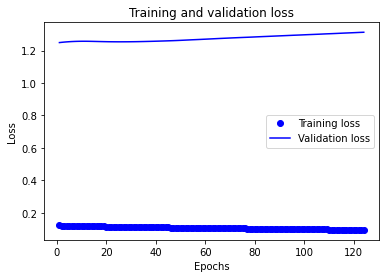

In [96]:
loss = history.history['loss'][1:]
val_loss = history.history['val_loss'][1:]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Lasso regressions
Lasso regressions will be used to judge the validity and influence of variables on future inflation rates. Three regressions will be conducted: one for all (current and past-quarter) variables and one excluding CPI variables and one excluding PI (CPI and PPI) variables. CPI1, the future-quarter rate of inflation is the exploratory variable. The models will include standardized data. The regressions are conducted for two different penalty terms: a stringent one (alpha=0.5) and a relaxed one (alpha=0.2).

Code from the following webpage was used in creating these models: https://vitalflux.com/lasso-ridge-regression-explained-with-python-example/

### All variables

#### Creating the X (explanatory) and y (target) variables

In [97]:
X = dfst.iloc[:,5:]
X

CPI0      PPI0      GDP0        U0 GOVSPEND0      AAA0     BOND0  \
0   -0.887464 -0.594512  0.354718 -0.226025 -0.420087 -1.038334 -0.653092   
1    -1.00652 -0.823908  0.758893 -0.285706 -0.405377 -1.008829 -0.630038   
2   -0.774084 -0.652405  0.897568 -0.285706 -0.367508 -0.994077 -0.606984   
3   -0.857403 -0.594512  1.327262 -0.345386 -0.287806 -0.983013 -0.577344   
4    -0.89356 -0.710116  1.313013 -0.464748 -0.182344 -0.971948 -0.603691   
..        ...       ...       ...       ...       ...       ...       ...   
230 -0.903641 -0.514944  -2.11765  0.430463  1.823762  -1.76489 -1.664172   
231 -0.417285  1.415842 -0.975988  0.012698   6.53447 -1.477218 -1.397405   
232  0.528007  2.943384  3.769475 -0.046983 -2.915009 -1.569421 -1.492915   
233  0.545235  3.095447  0.811562 -0.763151 -1.905462 -1.665312 -1.469861   
234  1.146606  3.062014  1.050028 -1.240597 -0.857849 -1.621054 -1.469861   

           S0     PROD0     CPI-1  ...       S-1       S-2       S-3  \
0     0.53574  0.939277 -0.948817  ...  0.588425  0.701144  0.788772   
1    0.364527  1.432253 -0.879298  ...  0.531379  0.587117  0.703154   
2    0.764024  0.939277 -0.998461  ...   0.36024  0.530104  0.588998   
3     0.53574  1.247387 -0.765817  ...  0.759563  0.359064   0.53192   
4    1.020845  1.062521  -0.84921  ...  0.531379  0.758158  0.360685   
..        ...       ...       ...  ...       ...       ...       ...   
230  1.363271  0.446301 -0.852286  ...  2.813224  7.115159 -0.295713   
231  3.161012  1.185765  -0.89549  ...  1.358548  2.810642  7.124447   
232  1.077916  0.138191 -0.408699  ...  3.155501  1.356799  2.815046   
233  0.478669 -1.463982  0.537438  ...  1.073317  3.152723  1.359553   
234 -0.377398 -0.046675  0.554681  ...  0.474333  1.071732  3.157515   

          S-4       S-5    PROD-1    PROD-2    PROD-3    PROD-4    PROD-5  
0    0.844262  0.732848  0.198748  1.052994  1.107655   1.10825   3.00956  
1    0.815137  0.849705  0.938153  0.188419  1.046061   1.10825  1.075871  
2    0.727761  0.820491  1.431089  0.929484  0.183736  1.046637  1.075871  
3     0.61126  0.732848  0.938153  1.423526  0.922871  0.184053  1.015444  
4    0.553009   0.61599  1.246238  0.929484  1.415629   0.92341  0.169455  
..        ...       ...       ...       ...       ...       ...       ...  
230 -0.408126 -0.523374  1.061387   0.31193  -0.67859  0.245666  0.048599  
231 -0.291625 -0.406516  0.445216  1.052994  0.306925 -0.678531  0.229883  
232  7.280958 -0.289658  1.184621  0.435441  1.046061  0.307279 -0.676534  
233  2.883035  7.306099  0.137131  1.176505  0.430114  1.046637   0.29031  
234  1.397643  2.894717 -1.464913  0.126664   1.16925  0.430505  1.015444  

[235 rows x 54 columns]

In [98]:
y = dfst.iloc[:,0]
y

0     -1.013164
1     -0.781688
2     -0.864663
3     -0.900671
4     -0.948002
         ...   
230   -0.426363
231    0.515024
232    0.532181
233    1.131068
234    1.643777
Name: CPI1, Length: 235, dtype: object

#### Splitting the variables into train and test sets

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=17)

#### Defining and running the model (penalty=0.5)

In [100]:
lasso = Lasso(alpha=0.5)

In [101]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [102]:
lasso.score(X_test,y_test), lasso.score(X_train,y_train)

(0.6313190853738224, 0.7141791403163882)

In [103]:
lasso.coef_

array([ 0.5024347,  0.       ,  0.       , -0.       ,  0.       ,
        0.       ,  0.       ,  0.       , -0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       , -0.       ,
       -0.       , -0.       , -0.       , -0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       , -0.       ,
       -0.       , -0.       ,  0.       ,  0.       ])

For this model, CPI0 is the only variables different from zero. Its coefficient states that a change of 1 standard deviation in the current-quarter inflation rate (CPI0) is associated with half a standard deviation change in the next-quarter inflation rate (CPI1).

#### Lowering the penalty (=0.2)

In [104]:
lasso = Lasso(alpha=0.2)

In [105]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.2)

In [106]:
lasso.score(X_test,y_test), lasso.score(X_train,y_train)

(0.8186233724556193, 0.885435744016657)

In [107]:
lasso.coef_

array([ 0.7641179 ,  0.00821048,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

Lowering the penalty further underlines the importance of current-quarter inflation in next-quarter predictions. Also, PPI emerges as the second significant variable, although its overlap with the targete variable is negligible.

### Excluding CPIs

#### Creating the X (explanatory) variables 

In [108]:
dfst = dfst.iloc[:, dfst.columns !='CPI0']
dfst = dfst.iloc[:, dfst.columns !='CPI-1']
dfst = dfst.iloc[:, dfst.columns !='CPI-2']
dfst = dfst.iloc[:, dfst.columns !='CPI-3']
dfst = dfst.iloc[:, dfst.columns !='CPI-4']
dfst = dfst.iloc[:, dfst.columns !='CPI-5']
dfst

CPI1 CPIY1 CPIY2 CPIY3       DATE0      PPI0      GDP0        U0  \
0   -1.013164   2.0     0     0  1963-04-01 -0.594512  0.354718 -0.226025   
1   -0.781688   3.0     1     0  1963-07-01 -0.823908  0.758893 -0.285706   
2   -0.864663   2.0     0     0  1963-10-01 -0.652405  0.897568 -0.285706   
3   -0.900671   2.0     0     0  1964-01-01 -0.594512  1.327262 -0.345386   
4   -0.948002   2.0     0     0  1964-04-01 -0.710116  1.313013 -0.464748   
..        ...   ...   ...   ...         ...       ...       ...       ...   
230 -0.426363   4.0     1     1  2020-10-01 -0.514944  -2.11765  0.430463   
231  0.515024   6.0     1     3  2021-01-01  1.415842 -0.975988  0.012698   
232  0.532181   6.0     1     3  2021-04-01  2.943384  3.769475 -0.046983   
233  1.131068   8.0     1     3  2021-07-01  3.095447  0.811562 -0.763151   
234  1.643777  10.0     1     3  2021-10-01  3.062014  1.050028 -1.240597   

    GOVSPEND0      AAA0  ...       S-1       S-2       S-3       S-4  \
0   -0.420087 -1.038334  ...  0.588425  0.701144  0.788772  0.844262   
1   -0.405377 -1.008829  ...  0.531379  0.587117  0.703154  0.815137   
2   -0.367508 -0.994077  ...   0.36024  0.530104  0.588998  0.727761   
3   -0.287806 -0.983013  ...  0.759563  0.359064   0.53192   0.61126   
4   -0.182344 -0.971948  ...  0.531379  0.758158  0.360685  0.553009   
..        ...       ...  ...       ...       ...       ...       ...   
230  1.823762  -1.76489  ...  2.813224  7.115159 -0.295713 -0.408126   
231   6.53447 -1.477218  ...  1.358548  2.810642  7.124447 -0.291625   
232 -2.915009 -1.569421  ...  3.155501  1.356799  2.815046  7.280958   
233 -1.905462 -1.665312  ...  1.073317  3.152723  1.359553  2.883035   
234 -0.857849 -1.621054  ...  0.474333  1.071732  3.157515  1.397643   

          S-5    PROD-1    PROD-2    PROD-3    PROD-4    PROD-5  
0    0.732848  0.198748  1.052994  1.107655   1.10825   3.00956  
1    0.849705  0.938153  0.188419  1.046061   1.10825  1.075871  
2    0.820491  1.431089  0.929484  0.183736  1.046637  1.075871  
3    0.732848  0.938153  1.423526  0.922871  0.184053  1.015444  
4     0.61599  1.246238  0.929484  1.415629   0.92341  0.169455  
..        ...       ...       ...       ...       ...       ...  
230 -0.523374  1.061387   0.31193  -0.67859  0.245666  0.048599  
231 -0.406516  0.445216  1.052994  0.306925 -0.678531  0.229883  
232 -0.289658  1.184621  0.435441  1.046061  0.307279 -0.676534  
233  7.306099  0.137131  1.176505  0.430114  1.046637   0.29031  
234  2.894717 -1.464913  0.126664   1.16925  0.430505  1.015444  

[235 rows x 53 columns]

In [109]:
X = dfst.iloc[:,5:]
X

PPI0      GDP0        U0 GOVSPEND0      AAA0     BOND0        S0  \
0   -0.594512  0.354718 -0.226025 -0.420087 -1.038334 -0.653092   0.53574   
1   -0.823908  0.758893 -0.285706 -0.405377 -1.008829 -0.630038  0.364527   
2   -0.652405  0.897568 -0.285706 -0.367508 -0.994077 -0.606984  0.764024   
3   -0.594512  1.327262 -0.345386 -0.287806 -0.983013 -0.577344   0.53574   
4   -0.710116  1.313013 -0.464748 -0.182344 -0.971948 -0.603691  1.020845   
..        ...       ...       ...       ...       ...       ...       ...   
230 -0.514944  -2.11765  0.430463  1.823762  -1.76489 -1.664172  1.363271   
231  1.415842 -0.975988  0.012698   6.53447 -1.477218 -1.397405  3.161012   
232  2.943384  3.769475 -0.046983 -2.915009 -1.569421 -1.492915  1.077916   
233  3.095447  0.811562 -0.763151 -1.905462 -1.665312 -1.469861  0.478669   
234  3.062014  1.050028 -1.240597 -0.857849 -1.621054 -1.469861 -0.377398   

        PROD0     PPI-1     PPI-2  ...       S-1       S-2       S-3  \
0    0.939277 -0.765785 -0.645765  ...  0.588425  0.701144  0.788772   
1    1.432253  -0.58947  -0.76557  ...  0.531379  0.587117  0.703154   
2    0.939277 -0.823331 -0.585481  ...   0.36024  0.530104  0.588998   
3    1.247387  -0.64849 -0.824348  ...  0.759563  0.359064   0.53192   
4    1.062521  -0.58947 -0.645765  ...  0.531379  0.758158  0.360685   
..        ...       ...       ...  ...       ...       ...       ...   
230  0.446301 -0.920239 -1.508487  ...  2.813224  7.115159 -0.295713   
231  1.185765 -0.508354  -0.92333  ...  1.358548  2.810642  7.124447   
232  0.138191  1.460011 -0.502628  ...  3.155501  1.356799  2.815046   
233 -1.463982  3.017282   1.50787  ...  1.073317  3.152723  1.359553   
234 -0.046675  3.172305  3.098476  ...  0.474333  1.071732  3.157515   

          S-4       S-5    PROD-1    PROD-2    PROD-3    PROD-4    PROD-5  
0    0.844262  0.732848  0.198748  1.052994  1.107655   1.10825   3.00956  
1    0.815137  0.849705  0.938153  0.188419  1.046061   1.10825  1.075871  
2    0.727761  0.820491  1.431089  0.929484  0.183736  1.046637  1.075871  
3     0.61126  0.732848  0.938153  1.423526  0.922871  0.184053  1.015444  
4    0.553009   0.61599  1.246238  0.929484  1.415629   0.92341  0.169455  
..        ...       ...       ...       ...       ...       ...       ...  
230 -0.408126 -0.523374  1.061387   0.31193  -0.67859  0.245666  0.048599  
231 -0.291625 -0.406516  0.445216  1.052994  0.306925 -0.678531  0.229883  
232  7.280958 -0.289658  1.184621  0.435441  1.046061  0.307279 -0.676534  
233  2.883035  7.306099  0.137131  1.176505  0.430114  1.046637   0.29031  
234  1.397643  2.894717 -1.464913  0.126664   1.16925  0.430505  1.015444  

[235 rows x 48 columns]

In [110]:
X

PPI0      GDP0        U0 GOVSPEND0      AAA0     BOND0        S0  \
0   -0.594512  0.354718 -0.226025 -0.420087 -1.038334 -0.653092   0.53574   
1   -0.823908  0.758893 -0.285706 -0.405377 -1.008829 -0.630038  0.364527   
2   -0.652405  0.897568 -0.285706 -0.367508 -0.994077 -0.606984  0.764024   
3   -0.594512  1.327262 -0.345386 -0.287806 -0.983013 -0.577344   0.53574   
4   -0.710116  1.313013 -0.464748 -0.182344 -0.971948 -0.603691  1.020845   
..        ...       ...       ...       ...       ...       ...       ...   
230 -0.514944  -2.11765  0.430463  1.823762  -1.76489 -1.664172  1.363271   
231  1.415842 -0.975988  0.012698   6.53447 -1.477218 -1.397405  3.161012   
232  2.943384  3.769475 -0.046983 -2.915009 -1.569421 -1.492915  1.077916   
233  3.095447  0.811562 -0.763151 -1.905462 -1.665312 -1.469861  0.478669   
234  3.062014  1.050028 -1.240597 -0.857849 -1.621054 -1.469861 -0.377398   

        PROD0     PPI-1     PPI-2  ...       S-1       S-2       S-3  \
0    0.939277 -0.765785 -0.645765  ...  0.588425  0.701144  0.788772   
1    1.432253  -0.58947  -0.76557  ...  0.531379  0.587117  0.703154   
2    0.939277 -0.823331 -0.585481  ...   0.36024  0.530104  0.588998   
3    1.247387  -0.64849 -0.824348  ...  0.759563  0.359064   0.53192   
4    1.062521  -0.58947 -0.645765  ...  0.531379  0.758158  0.360685   
..        ...       ...       ...  ...       ...       ...       ...   
230  0.446301 -0.920239 -1.508487  ...  2.813224  7.115159 -0.295713   
231  1.185765 -0.508354  -0.92333  ...  1.358548  2.810642  7.124447   
232  0.138191  1.460011 -0.502628  ...  3.155501  1.356799  2.815046   
233 -1.463982  3.017282   1.50787  ...  1.073317  3.152723  1.359553   
234 -0.046675  3.172305  3.098476  ...  0.474333  1.071732  3.157515   

          S-4       S-5    PROD-1    PROD-2    PROD-3    PROD-4    PROD-5  
0    0.844262  0.732848  0.198748  1.052994  1.107655   1.10825   3.00956  
1    0.815137  0.849705  0.938153  0.188419  1.046061   1.10825  1.075871  
2    0.727761  0.820491  1.431089  0.929484  0.183736  1.046637  1.075871  
3     0.61126  0.732848  0.938153  1.423526  0.922871  0.184053  1.015444  
4    0.553009   0.61599  1.246238  0.929484  1.415629   0.92341  0.169455  
..        ...       ...       ...       ...       ...       ...       ...  
230 -0.408126 -0.523374  1.061387   0.31193  -0.67859  0.245666  0.048599  
231 -0.291625 -0.406516  0.445216  1.052994  0.306925 -0.678531  0.229883  
232  7.280958 -0.289658  1.184621  0.435441  1.046061  0.307279 -0.676534  
233  2.883035  7.306099  0.137131  1.176505  0.430114  1.046637   0.29031  
234  1.397643  2.894717 -1.464913  0.126664   1.16925  0.430505  1.015444  

[235 rows x 48 columns]

#### Splitting the variables into train and test sets

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=74)

#### Defining and running the model (penalty=0.5)

In [112]:
lasso = Lasso(alpha=0.5)

In [113]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [114]:
lasso.score(X_test,y_test), lasso.score(X_train,y_train)

(0.2324526117702832, 0.2382412203266423)

In [115]:
lasso.coef_

array([ 0.16369299,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.01979959,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

With absent inflation rates, PPI emerges as the only significant variable (PPI0 and PPI-1). A change of 1 std. dev. in PPI0 is associated with a 0.16 change in std. dev. in the CPI1. The impact of PPI-1 is miniscule.

#### Lowering the penalty (=0.2)

In [116]:
lasso = Lasso(alpha=0.2)

In [117]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.2)

In [118]:
lasso.score(X_test,y_test), lasso.score(X_train,y_train)

(0.6921885638630343, 0.6762179174195726)

In [119]:
lasso.coef_

array([ 0.38140384, -0.        , -0.        ,  0.        ,  0.        ,
        0.19112107,  0.        , -0.        ,  0.        ,  0.05928696,
        0.        ,  0.07955376,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.05003665,
        0.01685932,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

Upon lowering the penalty, a few new variable coefficients emerge. PPI0 remains the most significant variable. What is most surprising is that the current quarter (BOND0) yield on 10-year Treasury bonds is equivalent to around half the influence of PPI0 on CPI1 - 0.19 standarad deviations. Also surprising, PPI-2 (0.059) emerges instead of PPI-1, with PPI-4 (0.079) also present. S-2 and S-3, the variables for the personal savings rates for second- and third-past quarters, are also included in the regression (0.05 and 0.016 respectively).

### Excluding PIs

In [120]:
dfst = dfst.iloc[:, dfst.columns !='PPI0']
dfst = dfst.iloc[:, dfst.columns !='PPI-1']
dfst = dfst.iloc[:, dfst.columns !='PPI-2']
dfst = dfst.iloc[:, dfst.columns !='PPI-3']
dfst = dfst.iloc[:, dfst.columns !='PPI-4']
dfst = dfst.iloc[:, dfst.columns !='PPI-5']
dfst

CPI1 CPIY1 CPIY2 CPIY3       DATE0      GDP0        U0 GOVSPEND0  \
0   -1.013164   2.0     0     0  1963-04-01  0.354718 -0.226025 -0.420087   
1   -0.781688   3.0     1     0  1963-07-01  0.758893 -0.285706 -0.405377   
2   -0.864663   2.0     0     0  1963-10-01  0.897568 -0.285706 -0.367508   
3   -0.900671   2.0     0     0  1964-01-01  1.327262 -0.345386 -0.287806   
4   -0.948002   2.0     0     0  1964-04-01  1.313013 -0.464748 -0.182344   
..        ...   ...   ...   ...         ...       ...       ...       ...   
230 -0.426363   4.0     1     1  2020-10-01  -2.11765  0.430463  1.823762   
231  0.515024   6.0     1     3  2021-01-01 -0.975988  0.012698   6.53447   
232  0.532181   6.0     1     3  2021-04-01  3.769475 -0.046983 -2.915009   
233  1.131068   8.0     1     3  2021-07-01  0.811562 -0.763151 -1.905462   
234  1.643777  10.0     1     3  2021-10-01  1.050028 -1.240597 -0.857849   

         AAA0     BOND0  ...       S-1       S-2       S-3       S-4  \
0   -1.038334 -0.653092  ...  0.588425  0.701144  0.788772  0.844262   
1   -1.008829 -0.630038  ...  0.531379  0.587117  0.703154  0.815137   
2   -0.994077 -0.606984  ...   0.36024  0.530104  0.588998  0.727761   
3   -0.983013 -0.577344  ...  0.759563  0.359064   0.53192   0.61126   
4   -0.971948 -0.603691  ...  0.531379  0.758158  0.360685  0.553009   
..        ...       ...  ...       ...       ...       ...       ...   
230  -1.76489 -1.664172  ...  2.813224  7.115159 -0.295713 -0.408126   
231 -1.477218 -1.397405  ...  1.358548  2.810642  7.124447 -0.291625   
232 -1.569421 -1.492915  ...  3.155501  1.356799  2.815046  7.280958   
233 -1.665312 -1.469861  ...  1.073317  3.152723  1.359553  2.883035   
234 -1.621054 -1.469861  ...  0.474333  1.071732  3.157515  1.397643   

          S-5    PROD-1    PROD-2    PROD-3    PROD-4    PROD-5  
0    0.732848  0.198748  1.052994  1.107655   1.10825   3.00956  
1    0.849705  0.938153  0.188419  1.046061   1.10825  1.075871  
2    0.820491  1.431089  0.929484  0.183736  1.046637  1.075871  
3    0.732848  0.938153  1.423526  0.922871  0.184053  1.015444  
4     0.61599  1.246238  0.929484  1.415629   0.92341  0.169455  
..        ...       ...       ...       ...       ...       ...  
230 -0.523374  1.061387   0.31193  -0.67859  0.245666  0.048599  
231 -0.406516  0.445216  1.052994  0.306925 -0.678531  0.229883  
232 -0.289658  1.184621  0.435441  1.046061  0.307279 -0.676534  
233  7.306099  0.137131  1.176505  0.430114  1.046637   0.29031  
234  2.894717 -1.464913  0.126664   1.16925  0.430505  1.015444  

[235 rows x 47 columns]

In [121]:
X = dfst.iloc[:,5:]
X

GDP0        U0 GOVSPEND0      AAA0     BOND0        S0     PROD0  \
0    0.354718 -0.226025 -0.420087 -1.038334 -0.653092   0.53574  0.939277   
1    0.758893 -0.285706 -0.405377 -1.008829 -0.630038  0.364527  1.432253   
2    0.897568 -0.285706 -0.367508 -0.994077 -0.606984  0.764024  0.939277   
3    1.327262 -0.345386 -0.287806 -0.983013 -0.577344   0.53574  1.247387   
4    1.313013 -0.464748 -0.182344 -0.971948 -0.603691  1.020845  1.062521   
..        ...       ...       ...       ...       ...       ...       ...   
230  -2.11765  0.430463  1.823762  -1.76489 -1.664172  1.363271  0.446301   
231 -0.975988  0.012698   6.53447 -1.477218 -1.397405  3.161012  1.185765   
232  3.769475 -0.046983 -2.915009 -1.569421 -1.492915  1.077916  0.138191   
233  0.811562 -0.763151 -1.905462 -1.665312 -1.469861  0.478669 -1.463982   
234  1.050028 -1.240597 -0.857849 -1.621054 -1.469861 -0.377398 -0.046675   

        GDP-1     GDP-2     GDP-3  ...       S-1       S-2       S-3  \
0    0.267528  0.557863  1.296099  ...  0.588425  0.701144  0.788772   
1     0.35886  0.268842  0.584868  ...  0.531379  0.587117  0.703154   
2    0.763932  0.360243  0.287606  ...   0.36024  0.530104  0.588998   
3    0.902915  0.765626  0.381613  ...  0.759563  0.359064   0.53192   
4    1.333563  0.904715  0.798554  ...  0.531379  0.758158  0.360685   
..        ...       ...       ...  ...       ...       ...       ...   
230 -2.373333 -4.899091 -0.955996  ...  2.813224  7.115159 -0.295713   
231 -2.118998 -2.374041 -5.027678  ...  1.358548  2.810642  7.124447   
232 -0.974801 -2.119511 -2.430632  ...  3.155501  1.356799  2.815046   
233  3.781199 -0.974438 -2.168846  ...  1.073317  3.152723  1.359553   
234  0.816718  3.785202 -0.991124  ...  0.474333  1.071732  3.157515   

          S-4       S-5    PROD-1    PROD-2    PROD-3    PROD-4    PROD-5  
0    0.844262  0.732848  0.198748  1.052994  1.107655   1.10825   3.00956  
1    0.815137  0.849705  0.938153  0.188419  1.046061   1.10825  1.075871  
2    0.727761  0.820491  1.431089  0.929484  0.183736  1.046637  1.075871  
3     0.61126  0.732848  0.938153  1.423526  0.922871  0.184053  1.015444  
4    0.553009   0.61599  1.246238  0.929484  1.415629   0.92341  0.169455  
..        ...       ...       ...       ...       ...       ...       ...  
230 -0.408126 -0.523374  1.061387   0.31193  -0.67859  0.245666  0.048599  
231 -0.291625 -0.406516  0.445216  1.052994  0.306925 -0.678531  0.229883  
232  7.280958 -0.289658  1.184621  0.435441  1.046061  0.307279 -0.676534  
233  2.883035  7.306099  0.137131  1.176505  0.430114  1.046637   0.29031  
234  1.397643  2.894717 -1.464913  0.126664   1.16925  0.430505  1.015444  

[235 rows x 42 columns]

#### Splitting the variables into train and test sets

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=74)

#### Defining and running the model (penalty=0.5)

In [123]:
lasso = Lasso(alpha=0.5)

In [124]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [125]:
lasso.score(X_test,y_test), lasso.score(X_train,y_train)

(0.002271512306658119, 0.002130334268998224)

In [126]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.00192773,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ])

The only variable coefficient included in the regressions is BOND0. However, its correlation with the target variables is almost equal to zero.

#### Lowering the penalty (=0.2)

In [127]:
lasso = Lasso(alpha=0.2)

In [128]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.2)

In [129]:
lasso.score(X_test,y_test), lasso.score(X_train,y_train)

(0.3986105861211897, 0.3868077609128301)

In [130]:
lasso.coef_

array([-0.        , -0.        ,  0.        ,  0.        ,  0.25295294,
        0.        , -0.05943782,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.01891474,
        0.01570733,  0.00027744,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.03167753,  0.09186234,
        0.        ,  0.06626262, -0.        , -0.        , -0.        ,
       -0.        ,  0.        ])

In [131]:
print(X.columns[19])

GOVSPEND-3


Apart from BOND0 (0.25), the regression included coefficients for variables such as PROD0 (-0.059), S-2 (0.032), S-3 (0.092), S-5 (0.067), as well as GOVSPEND-3 (0.018), GOVSPEND-4 (0.015) and GOVSPEND-5 (0.0003), federal government expenditures.

## Bayesian analysis
The analysis consists of 6 Bayesian models, each for every quarter, starting from current-quarter (Q0) and going back to the fifth past quarter (Q-5). A summary of coefficent means, scatter plots for select variables, along with trace plots are included.

But first, to prove the validity of the model, we generate our own random variables and then use the Bayesian model to recover the previously generated parameters.

In [132]:
def gen_data(a1 = 2, a2 = 1, b = -1, n=200):
    x1 = pm.Normal.dist(0,1).random(size=n)
    x2 = pm.Normal.dist(0,1).random(size=n)
    noise = pm.Normal.dist(0,1).random(size=n)
    y = b + a1 * x1 + a2 * x2 + noise
    random = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
    return random

random = gen_data()

In [133]:
with pm.Model() as random_model:
    b_b = pm.Normal('b', 0, 2)
    b_a1 = pm.Normal('a1', 0, 2)
    b_a2 = pm.Normal('a2', 0, 2)
    sigma = pm.HalfNormal('sigma', 1)
    obs = pm.Normal('obs', mu = b_a1*random.x1 + b_a2*random.x2 + b_b, sigma = sigma, observed = random.y)

    trace = pm.sample()

with random_model:
    ppc_simulated_data = pm.sample_posterior_predictive(trace, var_names=['obs'])

data_posterior_simulated_data = az.from_pymc3(
    trace,
    posterior_predictive = ppc_simulated_data)

/tmp/ipykernel_85337/4171968827.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, a2, a1, b]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.


/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


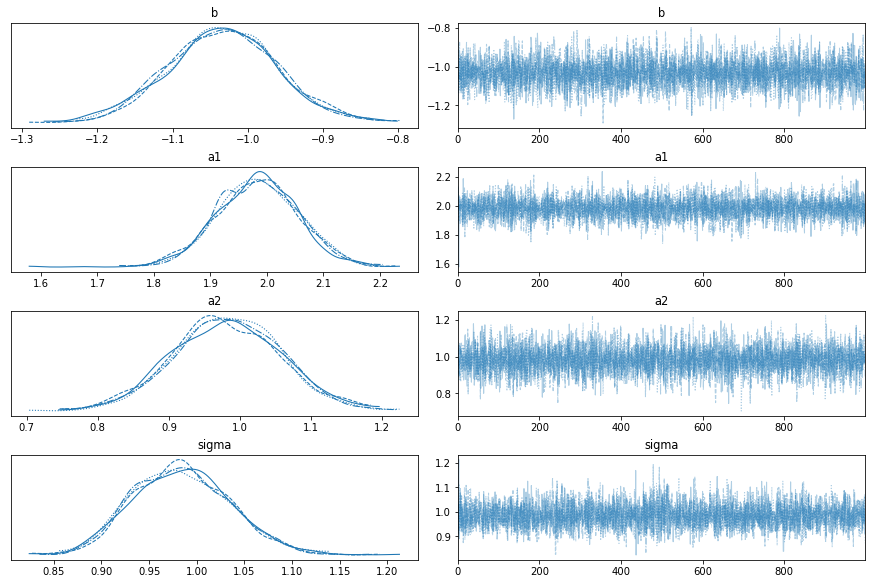

In [134]:
with random_model:
    pm.plot_trace(trace)

In [135]:
az.summary(data_posterior_simulated_data.posterior)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
b     -1.033  0.072  -1.161   -0.886      0.001    0.001    5524.0    3281.0   
a1     1.984  0.071   1.843    2.111      0.001    0.001    7090.0    2676.0   
a2     0.982  0.075   0.841    1.124      0.001    0.001    6730.0    2954.0   
sigma  0.984  0.050   0.899    1.084      0.001    0.000    5711.0    2664.0   

       r_hat  
b        1.0  
a1       1.0  
a2       1.0  
sigma    1.0

As ilustrated by the mean coefficients and trace plots, the model is very good in recovering the relevant parameters. 

### Restarting kernel
Before creating further models and the necessary variables the kernel should be restarted for memory space optimization. Only the necessary variables are loaded.

In [ ]:
os._exit(00)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize
from scipy import stats
from sklearn.preprocessing import StandardScaler
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from pandas import read_csv
from sklearn import datasets
import arviz as az
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, show

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
cpi = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/CPIAUCSL.csv")
ppico = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/PPIACO.csv")
gdp = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/GDPC1.csv")
unemp = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/UNRATE.csv")
govspend = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/FGEXPND.csv")
savings = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/PSAVERT.csv")
prod = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/PRS85006091%20(1).csv")
aaa = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/AAA.csv")
ts10 = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/mid/DGS10.csv")

In [3]:
df = pd.merge(cpi, ppico, how='inner', on='DATE')
df = pd.merge(df, gdp, how='inner', on='DATE')
df = pd.merge(df, unemp, how='inner', on='DATE')
df = pd.merge(df, govspend, how='inner', on='DATE')
df = pd.merge(df, aaa, how='inner', on='DATE')
df = pd.merge(df, ts10, how='inner', on='DATE')
df = pd.merge(df, savings, how='inner', on='DATE')
df = pd.merge(df, prod, how='inner', on='DATE')

df = df.rename({
    'PPIACO_PC1':'PPI0',
    'CPIAUCSL_PC1':'CPI0',
    'GDPC1_PC1':'GDP0',
    'UNRATE':'U0',
    'FGEXPND_PC1':'GOVSPEND0',
    'DGS10':'BOND0',
    'PSAVERT':'S0',
    'PRS85006091':'PROD0',
    'DATE':'DATE0', 
    'AAA':'AAA0'   
}, axis='columns')

In [4]:
cpipred = []
for i in range(1, len(df['CPI0'])):
    cpipred.append(df['CPI0'][i])
cpipred = pd.DataFrame (cpipred, columns = ['CPI1'])

df = df.iloc[:-1 , :]
df = pd.concat([df, cpipred], axis=1) 
df = df. T. drop_duplicates(). T

In [5]:
cpipast1 = []
for i in range(4, len(df['CPI0'])-1):
    cpipast1.append(df['CPI0'][i])
cpipast1 = pd.DataFrame (cpipast1, columns = ['CPI-1'])

cpipast2 = []
for i in range(3, len(df['CPI0'])-2):
    cpipast2.append(df['CPI0'][i])
cpipast2 = pd.DataFrame (cpipast2, columns = ['CPI-2'])

cpipast3 = []
for i in range(2, len(df['CPI0'])-3):
    cpipast3.append(df['CPI0'][i])
cpipast3 = pd.DataFrame (cpipast3, columns = ['CPI-3'])

cpipast4 = []
for i in range(1, len(df['CPI0'])-4):
    cpipast4.append(df['CPI0'][i])
cpipast4 = pd.DataFrame (cpipast4, columns = ['CPI-4'])

cpipast5 = []
for i in range(0, len(df['CPI0'])-5):
    cpipast5.append(df['CPI0'][i])
cpipast5 = pd.DataFrame (cpipast5, columns = ['CPI-5'])

In [6]:
ppipast1 = []
for i in range(4, len(df['PPI0'])-1):
    ppipast1.append(df['PPI0'][i])
ppipast1 = pd.DataFrame (ppipast1, columns = ['PPI-1'])

ppipast2 = []
for i in range(3, len(df['PPI0'])-2):
    ppipast2.append(df['PPI0'][i])
ppipast2 = pd.DataFrame (ppipast2, columns = ['PPI-2'])

ppipast3 = []
for i in range(2, len(df['PPI0'])-3):
    ppipast3.append(df['PPI0'][i])
ppipast3 = pd.DataFrame (ppipast3, columns = ['PPI-3'])

ppipast4 = []
for i in range(1, len(df['PPI0'])-4):
    ppipast4.append(df['PPI0'][i])
ppipast4 = pd.DataFrame (ppipast4, columns = ['PPI-4'])

ppipast5 = []
for i in range(0, len(df['PPI0'])-5):
    ppipast5.append(df['PPI0'][i])
ppipast5 = pd.DataFrame (ppipast5, columns = ['PPI-5'])

In [7]:
gdppast1 = []
for i in range(4, len(df['GDP0'])-1):
    gdppast1.append(df['GDP0'][i])
gdppast1 = pd.DataFrame (gdppast1, columns = ['GDP-1'])

gdppast2 = []
for i in range(3, len(df['GDP0'])-2):
    gdppast2.append(df['GDP0'][i])
gdppast2 = pd.DataFrame (gdppast2, columns = ['GDP-2'])

gdppast3 = []
for i in range(2, len(df['GDP0'])-3):
    gdppast3.append(df['GDP0'][i])
gdppast3 = pd.DataFrame (gdppast3, columns = ['GDP-3'])

gdppast4 = []
for i in range(1, len(df['GDP0'])-4):
    gdppast4.append(df['GDP0'][i])
gdppast4 = pd.DataFrame (gdppast4, columns = ['GDP-4'])

gdppast5 = []
for i in range(0, len(df['GDP0'])-5):
    gdppast5.append(df['GDP0'][i])
gdppast5 = pd.DataFrame (gdppast5, columns = ['GDP-5'])

In [8]:
upast1 = []
for i in range(4, len(df['U0'])-1):
    upast1.append(df['U0'][i])
upast1 = pd.DataFrame (upast1, columns = ['U-1'])

upast2 = []
for i in range(3, len(df['U0'])-2):
    upast2.append(df['U0'][i])
upast2 = pd.DataFrame (upast2, columns = ['U-2'])

upast3 = []
for i in range(2, len(df['U0'])-3):
    upast3.append(df['U0'][i])
upast3 = pd.DataFrame (upast3, columns = ['U-3'])

upast4 = []
for i in range(1, len(df['U0'])-4):
    upast4.append(df['U0'][i])
upast4 = pd.DataFrame (upast4, columns = ['U-4'])

upast5 = []
for i in range(0, len(df['U0'])-5):
    upast5.append(df['U0'][i])
upast5 = pd.DataFrame (upast5, columns = ['U-5'])

In [9]:
spendpast1 = []
for i in range(4, len(df['GOVSPEND0'])-1):
    spendpast1.append(df['GOVSPEND0'][i])
spendpast1 = pd.DataFrame (spendpast1, columns = ['GOVSPEND-1'])

spendpast2 = []
for i in range(3, len(df['GOVSPEND0'])-2):
    spendpast2.append(df['GOVSPEND0'][i])
spendpast2 = pd.DataFrame (spendpast2, columns = ['GOVSPEND-2'])

spendpast3 = []
for i in range(2, len(df['GOVSPEND0'])-3):
    spendpast3.append(df['GOVSPEND0'][i])
spendpast3 = pd.DataFrame (spendpast3, columns = ['GOVSPEND-3'])

spendpast4 = []
for i in range(1, len(df['GOVSPEND0'])-4):
    spendpast4.append(df['GOVSPEND0'][i])
spendpast4 = pd.DataFrame (spendpast4, columns = ['GOVSPEND-4'])

spendpast5 = []
for i in range(0, len(df['GOVSPEND0'])-5):
    spendpast5.append(df['GOVSPEND0'][i])
spendpast5 = pd.DataFrame (spendpast5, columns = ['GOVSPEND-5'])

In [10]:
aaapast1 = []
for i in range(4, len(df['AAA0'])-1):
    aaapast1.append(df['AAA0'][i])
aaapast1 = pd.DataFrame (aaapast1, columns = ['AAA-1'])

aaapast2 = []
for i in range(3, len(df['AAA0'])-2):
    aaapast2.append(df['AAA0'][i])
aaapast2 = pd.DataFrame (aaapast2, columns = ['AAA-2'])

aaapast3 = []
for i in range(2, len(df['AAA0'])-3):
    aaapast3.append(df['AAA0'][i])
aaapast3 = pd.DataFrame (aaapast3, columns = ['AAA-3'])

aaapast4 = []
for i in range(1, len(df['AAA0'])-4):
    aaapast4.append(df['AAA0'][i])
aaapast4 = pd.DataFrame (aaapast4, columns = ['AAA-4'])

aaapast5 = []
for i in range(0, len(df['AAA0'])-5):
    aaapast5.append(df['AAA0'][i])
aaapast5 = pd.DataFrame (aaapast5, columns = ['AAA-5'])

In [11]:
bondpast1 = []
for i in range(4, len(df['BOND0'])-1):
    bondpast1.append(df['BOND0'][i])
bondpast1 = pd.DataFrame (bondpast1, columns = ['BOND-1'])

bondpast2 = []
for i in range(3, len(df['BOND0'])-2):
    bondpast2.append(df['BOND0'][i])
bondpast2 = pd.DataFrame (bondpast2, columns = ['BOND-2'])

bondpast3 = []
for i in range(2, len(df['BOND0'])-3):
    bondpast3.append(df['BOND0'][i])
bondpast3 = pd.DataFrame (bondpast3, columns = ['BOND-3'])

bondpast4 = []
for i in range(1, len(df['BOND0'])-4):
    bondpast4.append(df['BOND0'][i])
bondpast4 = pd.DataFrame (bondpast4, columns = ['BOND-4'])

bondpast5 = []
for i in range(0, len(df['BOND0'])-5):
    bondpast5.append(df['BOND0'][i])
bondpast5 = pd.DataFrame (bondpast5, columns = ['BOND-5'])

In [12]:
savpast1 = []
for i in range(4, len(df['S0'])-1):
    savpast1.append(df['S0'][i])
savpast1 = pd.DataFrame (savpast1, columns = ['S-1'])

savpast2 = []
for i in range(3, len(df['S0'])-2):
    savpast2.append(df['S0'][i])
savpast2 = pd.DataFrame (savpast2, columns = ['S-2'])

savpast3 = []
for i in range(2, len(df['S0'])-3):
    savpast3.append(df['S0'][i])
savpast3 = pd.DataFrame (savpast3, columns = ['S-3'])

savpast4 = []
for i in range(1, len(df['S0'])-4):
    savpast4.append(df['S0'][i])
savpast4 = pd.DataFrame (savpast4, columns = ['S-4'])

savpast5 = []
for i in range(0, len(df['S0'])-5):
    savpast5.append(df['S0'][i])
savpast5 = pd.DataFrame (savpast5, columns = ['S-5'])

In [13]:
prodpast1 = []
for i in range(4, len(df['PROD0'])-1):
    prodpast1.append(df['PROD0'][i])
prodpast1 = pd.DataFrame (prodpast1, columns = ['PROD-1'])

prodpast2 = []
for i in range(3, len(df['PROD0'])-2):
    prodpast2.append(df['PROD0'][i])
prodpast2 = pd.DataFrame (prodpast2, columns = ['PROD-2'])

prodpast3 = []
for i in range(2, len(df['PROD0'])-3):
    prodpast3.append(df['PROD0'][i])
prodpast3 = pd.DataFrame (prodpast3, columns = ['PROD-3'])

prodpast4 = []
for i in range(1, len(df['PROD0'])-4):
    prodpast4.append(df['PROD0'][i])
prodpast4 = pd.DataFrame (prodpast4, columns = ['PROD-4'])

prodpast5 = []
for i in range(0, len(df['PROD0'])-5):
    prodpast5.append(df['PROD0'][i])
prodpast5 = pd.DataFrame (prodpast5, columns = ['PROD-5'])

In [14]:
df = df.iloc[5: , :]
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)

df = pd.concat([df, cpipast1, cpipast2, cpipast3, cpipast4, cpipast5, ppipast1, ppipast2, ppipast3, ppipast4, ppipast5, gdppast1, gdppast2, gdppast3, gdppast4, gdppast5, upast1, upast2, upast3, upast4, upast5, spendpast1, spendpast2, spendpast3, spendpast4, spendpast5, aaapast1, aaapast2, aaapast3, aaapast4, aaapast5, bondpast1, bondpast2, bondpast3, bondpast4, bondpast5, savpast1, savpast2, savpast3, savpast4, savpast5, prodpast1, prodpast2, prodpast3, prodpast4, prodpast5], axis=1) 
df = df. T. drop_duplicates(). T
df

DATE0     CPI0      PPI0      GDP0   U0 GOVSPEND0  AAA0 BOND0    S0  \
0    1963-04-01  1.32406   0.31746   3.82216  5.6   3.94545  4.23   4.0  10.7   
1    1963-07-01  0.98619  -0.94044   4.81693  5.5   4.07336  4.31  4.07  10.1   
2    1963-10-01  1.64582       0.0   5.15824  5.5   4.40262  4.35  4.14  11.5   
3    1964-01-01  1.40937   0.31746   6.21582  5.4   5.09562  4.38  4.23  10.7   
4    1964-04-01  1.30676  -0.31646   6.18075  5.2    6.0126  4.41  4.15  12.4   
..          ...      ...       ...       ...  ...       ...   ...   ...   ...   
230  2020-10-01  1.27815   0.75377  -2.26292  6.7  23.45544  2.26  0.93  13.6   
231  2021-01-01  2.65838  11.34127   0.54698  6.0  64.41446  3.04  1.74  19.9   
232  2021-04-01  5.34102  19.71757  12.22668  5.9 -17.74758  2.79  1.45  12.6   
233  2021-07-01  5.38991  20.55141   4.94656  4.7   -8.9697  2.53  1.52  10.5   
234  2021-10-01  7.09654  20.36808   5.53348  3.9   0.13917  2.65  1.52   7.5   

    PROD0  ...   S-1   S-2   S-3   S-4   S-5 PROD-1 PROD-2 PROD-3 PROD-4  \
0     3.5  ...  10.9  11.3  11.6  11.7  11.3    2.3    3.7    3.8    3.8   
1     4.3  ...  10.7  10.9  11.3  11.6  11.7    3.5    2.3    3.7    3.8   
2     3.5  ...  10.1  10.7  10.9  11.3  11.6    4.3    3.5    2.3    3.7   
3     4.0  ...  11.5  10.1  10.7  10.9  11.3    3.5    4.3    3.5    2.3   
4     3.7  ...  10.7  11.5  10.1  10.7  10.9    4.0    3.5    4.3    3.5   
..    ...  ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
230   2.7  ...  18.7  33.8   7.8   7.4   7.0    3.7    2.5    0.9    2.4   
231   3.9  ...  13.6  18.7  33.8   7.8   7.4    2.7    3.7    2.5    0.9   
232   2.2  ...  19.9  13.6  18.7  33.8   7.8    3.9    2.7    3.7    2.5   
233  -0.4  ...  12.6  19.9  13.6  18.7  33.8    2.2    3.9    2.7    3.7   
234   1.9  ...  10.5  12.6  19.9  13.6  18.7   -0.4    2.2    3.9    2.7   

    PROD-5  
0      7.0  
1      3.8  
2      3.8  
3      3.7  
4      2.3  
..     ...  
230    2.1  
231    2.4  
232    0.9  
233    2.5  
234    3.7  

[235 rows x 56 columns]

In [15]:
def standardize(x):
    return (x-x.mean())/x.std()

In [16]:
dfprep = df.loc[:, df.columns !='DATE0']
dfst = standardize(dfprep)
dfst

CPI0      PPI0      GDP0        U0 GOVSPEND0      AAA0     BOND0  \
0   -0.887464 -0.594512  0.354718 -0.226025 -0.420087 -1.038334 -0.653092   
1    -1.00652 -0.823908  0.758893 -0.285706 -0.405377 -1.008829 -0.630038   
2   -0.774084 -0.652405  0.897568 -0.285706 -0.367508 -0.994077 -0.606984   
3   -0.857403 -0.594512  1.327262 -0.345386 -0.287806 -0.983013 -0.577344   
4    -0.89356 -0.710116  1.313013 -0.464748 -0.182344 -0.971948 -0.603691   
..        ...       ...       ...       ...       ...       ...       ...   
230 -0.903641 -0.514944  -2.11765  0.430463  1.823762  -1.76489 -1.664172   
231 -0.417285  1.415842 -0.975988  0.012698   6.53447 -1.477218 -1.397405   
232  0.528007  2.943384  3.769475 -0.046983 -2.915009 -1.569421 -1.492915   
233  0.545235  3.095447  0.811562 -0.763151 -1.905462 -1.665312 -1.469861   
234  1.146606  3.062014  1.050028 -1.240597 -0.857849 -1.621054 -1.469861   

           S0     PROD0      CPI1  ...       S-1       S-2       S-3  \
0     0.53574  0.939277 -1.013164  ...  0.588425  0.701144  0.788772   
1    0.364527  1.432253 -0.781688  ...  0.531379  0.587117  0.703154   
2    0.764024  0.939277 -0.864663  ...   0.36024  0.530104  0.588998   
3     0.53574  1.247387 -0.900671  ...  0.759563  0.359064   0.53192   
4    1.020845  1.062521 -0.948002  ...  0.531379  0.758158  0.360685   
..        ...       ...       ...  ...       ...       ...       ...   
230  1.363271  0.446301 -0.426363  ...  2.813224  7.115159 -0.295713   
231  3.161012  1.185765  0.515024  ...  1.358548  2.810642  7.124447   
232  1.077916  0.138191  0.532181  ...  3.155501  1.356799  2.815046   
233  0.478669 -1.463982  1.131068  ...  1.073317  3.152723  1.359553   
234 -0.377398 -0.046675  1.643777  ...  0.474333  1.071732  3.157515   

          S-4       S-5    PROD-1    PROD-2    PROD-3    PROD-4    PROD-5  
0    0.844262  0.732848  0.198748  1.052994  1.107655   1.10825   3.00956  
1    0.815137  0.849705  0.938153  0.188419  1.046061   1.10825  1.075871  
2    0.727761  0.820491  1.431089  0.929484  0.183736  1.046637  1.075871  
3     0.61126  0.732848  0.938153  1.423526  0.922871  0.184053  1.015444  
4    0.553009   0.61599  1.246238  0.929484  1.415629   0.92341  0.169455  
..        ...       ...       ...       ...       ...       ...       ...  
230 -0.408126 -0.523374  1.061387   0.31193  -0.67859  0.245666  0.048599  
231 -0.291625 -0.406516  0.445216  1.052994  0.306925 -0.678531  0.229883  
232  7.280958 -0.289658  1.184621  0.435441  1.046061  0.307279 -0.676534  
233  2.883035  7.306099  0.137131  1.176505  0.430114  1.046637   0.29031  
234  1.397643  2.894717 -1.464913  0.126664   1.16925  0.430505  1.015444  

[235 rows x 55 columns]

#### Creating model variables

In [17]:
baaa0 = dfst['AAA0']
baaa1 = dfst['AAA-1']
baaa2 = (dfst['AAA-2'])
baaa3 = (dfst['AAA-3'])
baaa4 = (dfst['AAA-4'])
baaa5 = (dfst['AAA-5'])

bbond0 = (dfst['BOND0'])
bbond1 = (dfst['BOND-1'])
bbond2 = (dfst['BOND-2'])
bbond3 = (dfst['BOND-3'])
bbond4 = (dfst['BOND-4'])
bbond5 = (dfst['BOND-5'])

bgdp0 = (dfst['GDP0'])
bgdp1 = (dfst['GDP-1'])
bgdp2 = (dfst['GDP-2'])
bgdp3 = (dfst['GDP-3'])
bgdp4 = (dfst['GDP-4'])
bgdp5 = (dfst['GDP-5'])

bprod0 = (dfst['PROD0'])
bprod1 = (dfst['PROD-1'])
bprod2 = (dfst['PROD-2'])
bprod3 = (dfst['PROD-3'])
bprod4 = (dfst['PROD-4'])
bprod5 = (dfst['PROD-5'])

bsav0 = (dfst['S0'])
bsav1 = (dfst['S-1'])
bsav2 = (dfst['S-2'])
bsav3 = (dfst['S-3'])
bsav4 = (dfst['S-4'])
bsav5 = (dfst['S-5'])

bspend0 = (dfst['GOVSPEND0'])
bspend1 = (dfst['GOVSPEND-1'])
bspend2 = (dfst['GOVSPEND-2'])
bspend3 = (dfst['GOVSPEND-3'])
bspend4 = (dfst['GOVSPEND-4'])
bspend5 = (dfst['GOVSPEND-5'])

bunemp0 = (dfst['U0'])
bunemp1 = (dfst['U-1'])
bunemp2 = (dfst['U-2'])
bunemp3 = (dfst['U-3'])
bunemp4 = (dfst['U-4'])
bunemp5 = (dfst['U-5'])

bppi0 = (dfst['PPI0'])
bppi1 = (dfst['PPI-1'])
bppi2 = (dfst['PPI-2'])
bppi3 = (dfst['PPI-3'])
bppi4 = (dfst['PPI-4'])
bppi5 = (dfst['PPI-5'])

bcpi1 = (dfst['CPI1'])
bcpi0 = (dfst['CPI0'])
bcpip1 = (dfst['CPI-1'])
bcpip2 = (dfst['CPI-2'])
bcpip3 = (dfst['CPI-3'])
bcpip4 = (dfst['CPI-4'])
bcpip5 = (dfst['CPI-5'])

In [18]:
baaa0 = list(baaa0)
baaa1 = list(baaa1)
baaa2 = list(baaa2)
baaa3 = list(baaa3)
baaa4 = list(baaa4)
baaa5 = list(baaa5)

bbond0 = list(bbond0)
bbond1 = list(bbond1)
bbond2 = list(bbond2)
bbond3 = list(bbond3)
bbond4 = list(bbond4)
bbond5 = list(bbond5)

bgdp0 = list(bgdp0)
bgdp1 = list(bgdp1)
bgdp2 = list(bgdp2)
bgdp3 = list(bgdp3)
bgdp4 = list(bgdp4)
bgdp5 = list(bgdp5)

bppi0 = list(bppi0)
bppi1 = list(bppi1)
bppi2 = list(bppi2)
bppi3 = list(bppi3)
bppi4 = list(bppi4)
bppi5 = list(bppi5)

bprod0 = list(bprod0)
bprod1 = list(bprod1)
bprod2 = list(bprod2)
bprod3 = list(bprod3)
bprod4 = list(bprod4)
bprod5 = list(bprod5)

bsav0 = list(bsav0)
bsav1 = list(bsav1)
bsav2 = list(bsav2)
bsav3 = list(bsav3)
bsav4 = list(bsav4)
bsav5 = list(bsav5)

bspend0 = list(bspend0)
bspend1 = list(bspend1)
bspend2 = list(bspend2)
bspend3 = list(bspend3)
bspend4 = list(bspend4)
bspend5 = list(bspend5)

bunemp0 = list(bunemp0)
bunemp1 = list(bunemp1)
bunemp2 = list(bunemp2)
bunemp3 = list(bunemp3)
bunemp4 = list(bunemp4)
bunemp5 = list(bunemp5)

bcpi1 = list(bcpi1)
bcpi0 = list(bcpi0)
bcpip1 = list(bcpip1)
bcpip2 = list(bcpip2)
bcpip3 = list(bcpip3)
bcpip4 = list(bcpip4)
bcpip5 = list(bcpip5)

### Quarter[0] variables model

In [19]:
with pm.Model() as normal:

      ## priors on coefficients
      constant = pm.Normal('constant', mu = 0.0, sd = 1.0)
      σ_prior = 0.1

      b_aaa0 = pm.Normal('b_aaa0', mu = 0, sd = σ_prior)
      b_bond0 = pm.Normal('b_bond0',mu=0,sd=σ_prior)
      b_gdp0 = pm.Normal('b_gdp0',mu = 0, sd = σ_prior)
      b_spend0 = pm.Normal('b_spend0',mu = 0, sd = σ_prior)
      b_ppi0 = pm.Normal('b_ppi0',mu = 0, sd = σ_prior)
      b_prod0 = pm.Normal('b_prod0',mu = 0, sd = σ_prior)
      b_sav0 = pm.Normal('b_sav0',mu = 0, sd = σ_prior)
      b_unemp0 = pm.Normal('b_unemp0',mu = 0, sd = σ_prior)
      b_cpi0 = pm.Normal('b_cpi0',mu = 0, sd = σ_prior)

      ## model
      μ = constant + b_aaa0 * baaa0 + b_bond0 * bbond0 + b_gdp0 * bgdp0 + b_spend0 * bspend0 + b_ppi0 * bppi0 + b_prod0 * bprod0 + b_sav0 * bsav0 + b_unemp0 * bunemp0 + b_cpi0 * bcpi0
      σ = pm.HalfNormal('σ', 1)

      inflation = pm.Normal('inflation', μ, σ, observed=bcpi1)
      trace_normal = pm.sample()

with normal:
      ppc_normal = pm.sample_posterior_predictive(trace_normal, var_names=["inflation"])

data_posterior_normal = az.from_pymc3(
    trace_normal,
    posterior_predictive = ppc_normal)

/tmp/ipykernel_93369/2680816062.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_normal = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, b_cpi0, b_unemp0, b_sav0, b_prod0, b_ppi0, b_spend0, b_gdp0, b_bond0, b_aaa0, constant]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 74 seconds.


/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [20]:
variables = ['b_aaa0','b_bond0', 'b_gdp0', 'b_spend0', 'b_ppi0', 'b_prod0', 'b_sav0', 'b_unemp0', 'b_cpi0']
az.summary(data_posterior_normal.posterior,variables)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
b_aaa0   -0.002  0.065  -0.123    0.118      0.001    0.001    2776.0   
b_bond0   0.063  0.067  -0.058    0.195      0.001    0.001    2952.0   
b_gdp0    0.034  0.031  -0.025    0.091      0.001    0.000    2535.0   
b_spend0  0.039  0.032  -0.018    0.100      0.001    0.000    2621.0   
b_ppi0    0.134  0.035   0.063    0.196      0.001    0.000    3078.0   
b_prod0  -0.034  0.025  -0.080    0.015      0.000    0.000    3096.0   
b_sav0    0.054  0.029  -0.003    0.108      0.001    0.000    2868.0   
b_unemp0 -0.042  0.024  -0.088    0.003      0.000    0.000    3641.0   
b_cpi0    0.753  0.046   0.659    0.836      0.001    0.001    2958.0   

          ess_tail  r_hat  
b_aaa0      2471.0    1.0  
b_bond0     2678.0    1.0  
b_gdp0      2768.0    1.0  
b_spend0    2530.0    1.0  
b_ppi0      2650.0    1.0  
b_prod0     2709.0    1.0  
b_sav0      2742.0    1.0  
b_unemp0    2912.0    1.0  
b_cpi0      2572.0    1.0

Based on the above table, we can state, with 94% probability, that CPI0, PPI0 and S0 values are associated with an increase in the value of CPI1. The mean values for these coefficients are biggest for CPI0 (a st.dev. increase of 1 associated with a 0.75 st.dev. increase in CPI1), PPI0 (0.13) and S0 (0.06).

What's important here too is that all r_hats are equal to 1, indicating the convergence of chains.

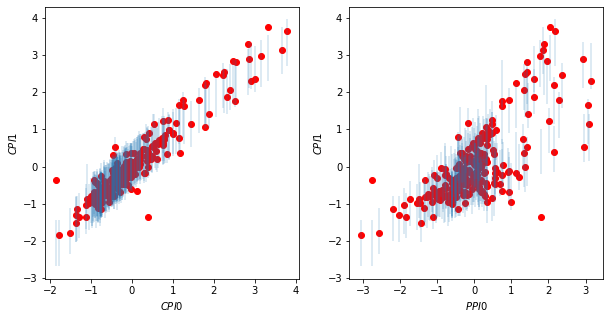

In [21]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['CPI0'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['CPI0'],dfst['CPI1'], color='r')
ax1.set(xlabel='$CPI0$', ylabel='$CPI1$');
ax2.vlines(dfst['PPI0'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['PPI0'],dfst['CPI1'], color='r')
ax2.set(xlabel='$PPI0$', ylabel='$CPI1$');

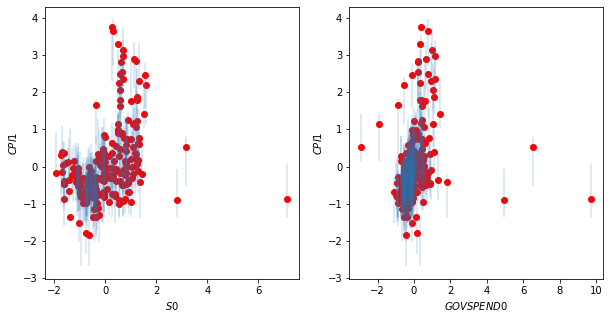

In [22]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['S0'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['S0'],dfst['CPI1'], color='r')
ax1.set(xlabel='$S0$', ylabel='$CPI1$');
ax2.vlines(dfst['GOVSPEND0'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['GOVSPEND0'],dfst['CPI1'], color='r')
ax2.set(xlabel='$GOVSPEND0$', ylabel='$CPI1$');

As we can see from the scatter plots, the model fits the data quite well, as the overwhelming majority of observations (red dots) fit their 95% confidence intervals (blue lines).

Marginal posterior distributions for all variables can be seen below.

/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'b_aaa0'}>,
        <AxesSubplot:title={'center':'b_aaa0'}>],
       [<AxesSubplot:title={'center':'b_bond0'}>,
        <AxesSubplot:title={'center':'b_bond0'}>],
       [<AxesSubplot:title={'center':'b_gdp0'}>,
        <AxesSubplot:title={'center':'b_gdp0'}>],
       [<AxesSubplot:title={'center':'b_spend0'}>,
        <AxesSubplot:title={'center':'b_spend0'}>],
       [<AxesSubplot:title={'center':'b_ppi0'}>,
        <AxesSubplot:title={'center':'b_ppi0'}>],
       [<AxesSubplot:title={'center':'b_prod0'}>,
        <AxesSubplot:title={'center':'b_prod0'}>],
       [<AxesSubplot:title={'center':'b_sav0'}>,
        <AxesSubplot:title={'center':'b_sav0'}>],
       [<AxesSubplot:title={'center':'b_unemp0'}>,
        <AxesSubplot:title={'center':'b_unemp0'}>],
       [<AxesSubplot:title={'center':'b_cpi0'}>,
        <AxesSubplot:title={'center':'b_cpi0'}>]], dtype=object)

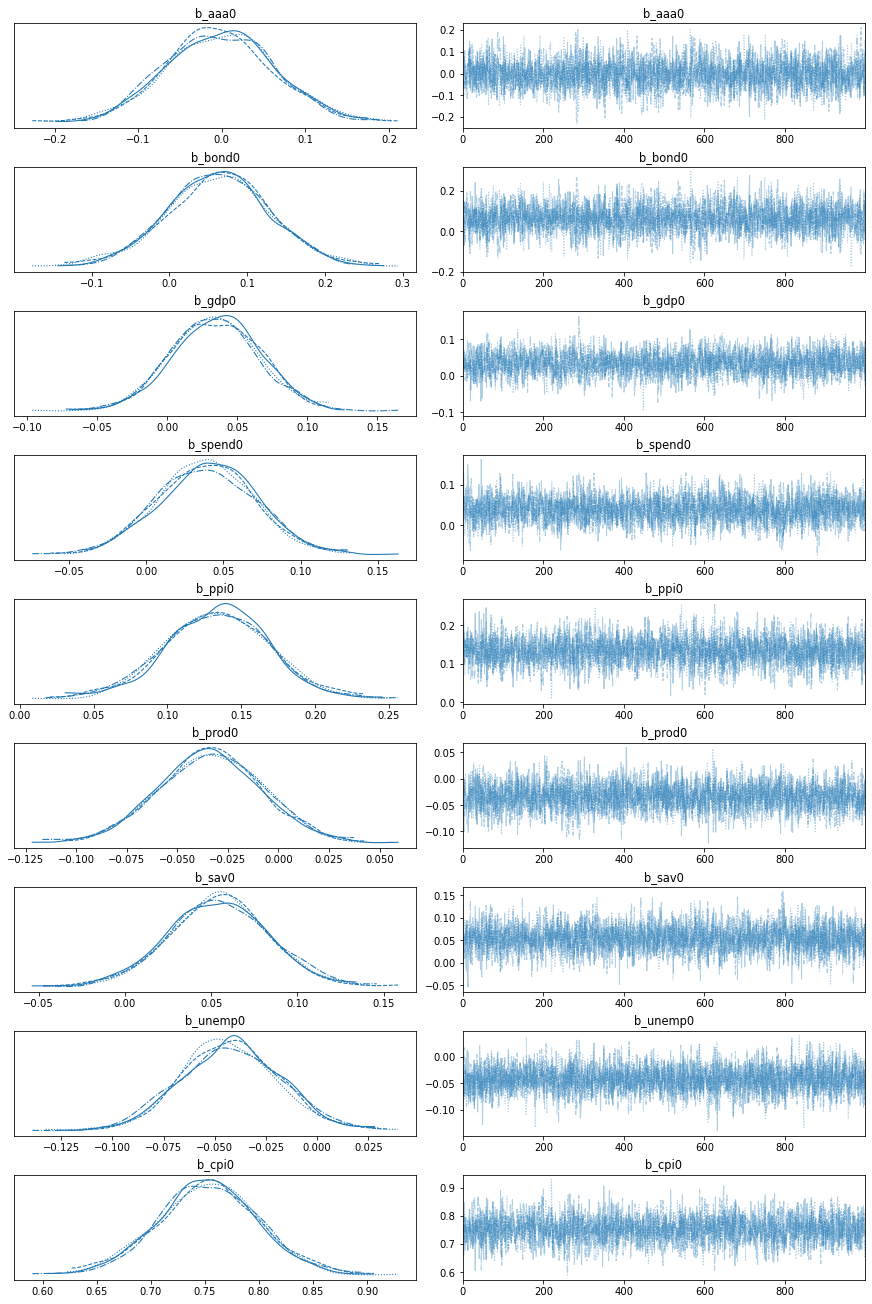

In [23]:
az.plot_trace(trace_normal,var_names=variables)

### Quarter[-1] variables model

In [24]:
with pm.Model() as normal:

      ## priors on coefficients
      constant = pm.Normal('constant', mu = 0.0, sd = 1.0)
      σ_prior = 0.1

      b_aaa1 = pm.Normal('b_aaa1', mu = 0, sd = σ_prior)
      b_bond1 = pm.Normal('b_bond1',mu=0,sd=σ_prior)
      b_gdp1 = pm.Normal('b_gdp1',mu = 0, sd = σ_prior)
      b_spend1 = pm.Normal('b_spend1',mu = 0, sd = σ_prior)
      b_ppi1 = pm.Normal('b_ppi1',mu = 0, sd = σ_prior)
      b_prod1 = pm.Normal('b_prod1',mu = 0, sd = σ_prior)
      b_sav1 = pm.Normal('b_sav1',mu = 0, sd = σ_prior)
      b_unemp1 = pm.Normal('b_unemp1',mu = 0, sd = σ_prior)
      b_cpip1 = pm.Normal('b_cpip1',mu = 0, sd = σ_prior)

      ## model
      μ = constant + b_aaa1 * baaa1 + b_bond1 * bbond1 + b_gdp1 * bgdp1 + b_spend1 * bspend1 + b_ppi1 * bppi1 + b_prod1 * bprod1 + b_sav1 * bsav1 + b_unemp1 * bunemp1 + b_cpip1 * bcpip1
      σ = pm.HalfNormal('σ', 1)

      inflation = pm.Normal('inflation', μ, σ, observed=bcpi1)
      trace_normal = pm.sample()

with normal:
      ppc_normal = pm.sample_posterior_predictive(trace_normal, var_names=["inflation"])

data_posterior_normal = az.from_pymc3(
    trace_normal,
    posterior_predictive = ppc_normal)

/tmp/ipykernel_93369/1227982987.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_normal = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, b_cpip1, b_unemp1, b_sav1, b_prod1, b_ppi1, b_spend1, b_gdp1, b_bond1, b_aaa1, constant]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 67 seconds.


/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [25]:
variables = ['b_aaa1','b_bond1', 'b_gdp1', 'b_spend1', 'b_ppi1', 'b_prod1', 'b_sav1', 'b_unemp1', 'b_cpip1']
az.summary(data_posterior_normal.posterior,variables)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
b_aaa1   -0.002  0.069  -0.129    0.128      0.001    0.001    2930.0   
b_bond1   0.063  0.071  -0.072    0.192      0.001    0.001    3066.0   
b_gdp1    0.060  0.040  -0.013    0.134      0.001    0.001    2676.0   
b_spend1  0.003  0.041  -0.070    0.080      0.001    0.001    3114.0   
b_ppi1    0.169  0.044   0.084    0.251      0.001    0.001    2915.0   
b_prod1  -0.027  0.035  -0.094    0.038      0.001    0.000    3383.0   
b_sav1    0.135  0.038   0.064    0.207      0.001    0.000    3703.0   
b_unemp1 -0.052  0.034  -0.115    0.012      0.001    0.000    3712.0   
b_cpip1   0.627  0.058   0.522    0.740      0.001    0.001    2782.0   

          ess_tail  r_hat  
b_aaa1      2776.0    1.0  
b_bond1     2807.0    1.0  
b_gdp1      2942.0    1.0  
b_spend1    2963.0    1.0  
b_ppi1      2528.0    1.0  
b_prod1     3266.0    1.0  
b_sav1      3421.0    1.0  
b_unemp1    3226.0    1.0  
b_cpip1     2715.0    1.0

The same indicators, CPI, PPI and S (past-quarter variables) remain to be associated with a correlation not equal to zero in the target variable. The means of both S and PPI have risen from quarter to quarter (from 0.06 to 0.14 and from 0.13 to 0.17, respectively), while the coefficient mean of CPI has fallen from 0.75 to 0.63. All r_hats are equal to zero.

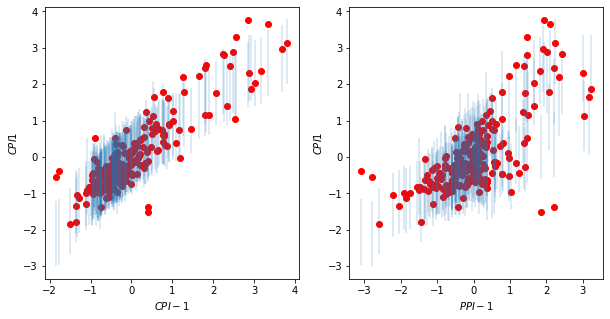

In [26]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['CPI-1'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['CPI-1'],dfst['CPI1'], color='r')
ax1.set(xlabel='$CPI-1$', ylabel='$CPI1$');
ax2.vlines(dfst['PPI-1'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['PPI-1'],dfst['CPI1'], color='r')
ax2.set(xlabel='$PPI-1$', ylabel='$CPI1$');

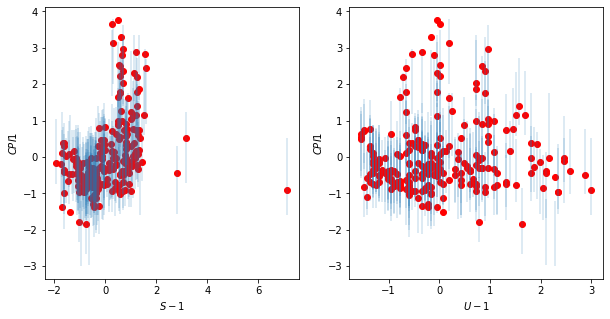

In [27]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['S-1'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['S-1'],dfst['CPI1'], color='r')
ax1.set(xlabel='$S-1$', ylabel='$CPI1$');
ax2.vlines(dfst['U-1'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['U-1'],dfst['CPI1'], color='r')
ax2.set(xlabel='$U-1$', ylabel='$CPI1$');

/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'b_aaa1'}>,
        <AxesSubplot:title={'center':'b_aaa1'}>],
       [<AxesSubplot:title={'center':'b_bond1'}>,
        <AxesSubplot:title={'center':'b_bond1'}>],
       [<AxesSubplot:title={'center':'b_gdp1'}>,
        <AxesSubplot:title={'center':'b_gdp1'}>],
       [<AxesSubplot:title={'center':'b_spend1'}>,
        <AxesSubplot:title={'center':'b_spend1'}>],
       [<AxesSubplot:title={'center':'b_ppi1'}>,
        <AxesSubplot:title={'center':'b_ppi1'}>],
       [<AxesSubplot:title={'center':'b_prod1'}>,
        <AxesSubplot:title={'center':'b_prod1'}>],
       [<AxesSubplot:title={'center':'b_sav1'}>,
        <AxesSubplot:title={'center':'b_sav1'}>],
       [<AxesSubplot:title={'center':'b_unemp1'}>,
        <AxesSubplot:title={'center':'b_unemp1'}>],
       [<AxesSubplot:title={'center':'b_cpip1'}>,
        <AxesSubplot:title={'center':'b_cpip1'}>]], dtype=object)

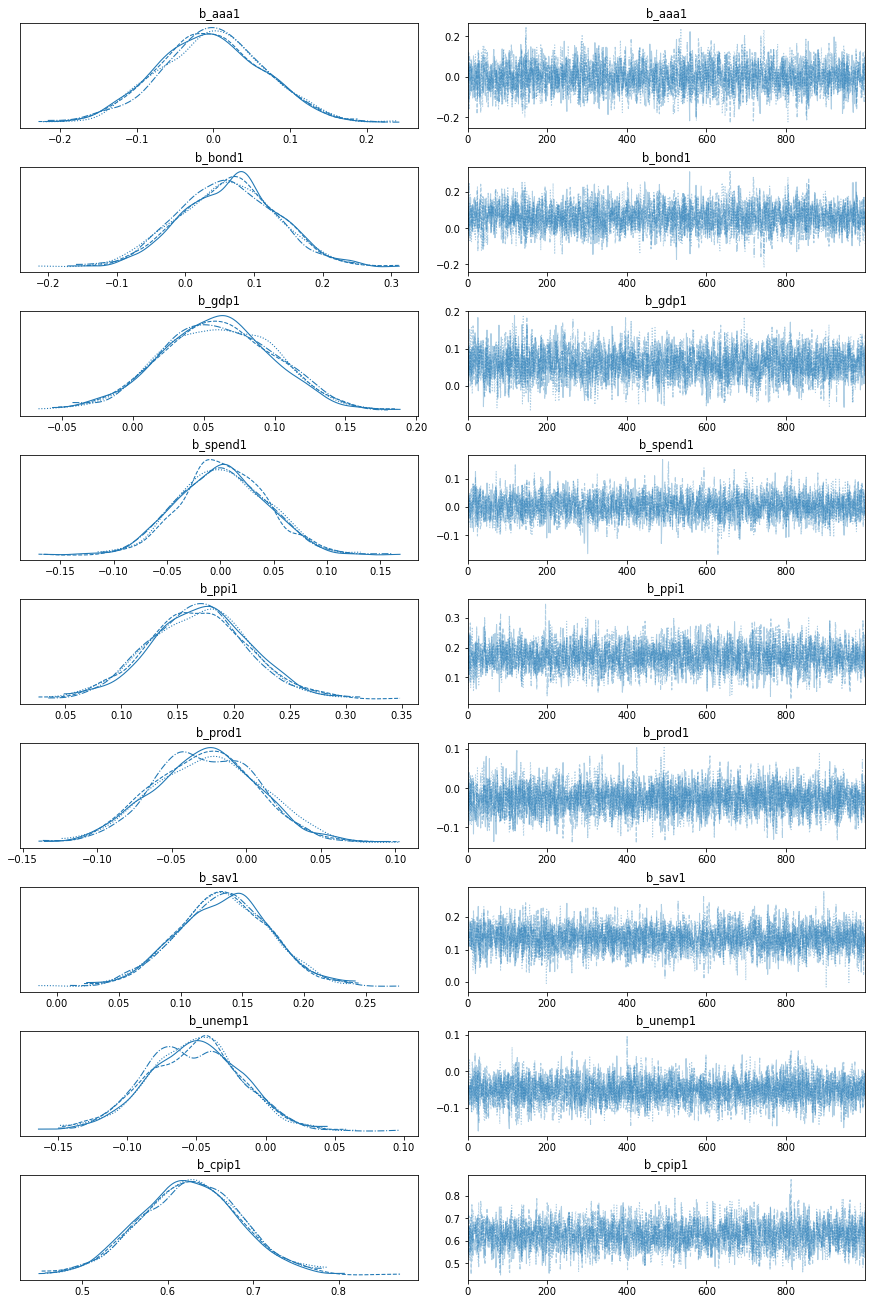

In [28]:
az.plot_trace(trace_normal,var_names=variables)

### Quarter[-2] variables model

In [29]:
with pm.Model() as normal:

      ## priors on coefficients
      constant = pm.Normal('constant', mu = 0.0, sd = 1.0)
      σ_prior = 0.1

      b_aaa2 = pm.Normal('b_aaa2', mu = 0, sd = σ_prior)
      b_bond2 = pm.Normal('b_bond2',mu=0,sd=σ_prior)
      b_gdp2 = pm.Normal('b_gdp2',mu = 0, sd = σ_prior)
      b_spend2 = pm.Normal('b_spend2',mu = 0, sd = σ_prior)
      b_ppi2 = pm.Normal('b_ppi2',mu = 0, sd = σ_prior)
      b_prod2 = pm.Normal('b_prod2',mu = 0, sd = σ_prior)
      b_sav2 = pm.Normal('b_sav2',mu = 0, sd = σ_prior)
      b_unemp2 = pm.Normal('b_unemp2',mu = 0, sd = σ_prior)
      b_cpip2 = pm.Normal('b_cpip2',mu = 0, sd = σ_prior)

      ## model
      μ = constant + b_aaa2 * baaa2 + b_bond2 * bbond2 + b_gdp2 * bgdp2 + b_spend2 * bspend2 + b_ppi2 * bppi2 + b_prod2 * bprod2 + b_sav2 * bsav2 + b_unemp2 * bunemp2 + b_cpip2 * bcpip2
      σ = pm.HalfNormal('σ', 1)

      inflation = pm.Normal('inflation', μ, σ, observed=bcpi1)
      trace_normal = pm.sample()

with normal:
      ppc_normal = pm.sample_posterior_predictive(trace_normal, var_names=["inflation"])

data_posterior_normal = az.from_pymc3(
    trace_normal,
    posterior_predictive = ppc_normal)

/tmp/ipykernel_93369/3465466617.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_normal = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, b_cpip2, b_unemp2, b_sav2, b_prod2, b_ppi2, b_spend2, b_gdp2, b_bond2, b_aaa2, constant]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 66 seconds.


/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [30]:
variables = ['b_aaa2','b_bond2', 'b_gdp2', 'b_spend2', 'b_ppi2', 'b_prod2', 'b_sav2', 'b_unemp2', 'b_cpip2']
az.summary(data_posterior_normal.posterior,variables)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
b_aaa2    0.003  0.073  -0.135    0.143      0.001    0.001    2949.0   
b_bond2   0.042  0.075  -0.098    0.185      0.001    0.001    3056.0   
b_gdp2    0.123  0.045   0.039    0.207      0.001    0.001    2696.0   
b_spend2  0.056  0.047  -0.030    0.147      0.001    0.001    2666.0   
b_ppi2    0.150  0.049   0.063    0.244      0.001    0.001    3144.0   
b_prod2  -0.016  0.041  -0.093    0.061      0.001    0.001    3143.0   
b_sav2    0.169  0.045   0.086    0.254      0.001    0.001    3287.0   
b_unemp2 -0.041  0.039  -0.112    0.032      0.001    0.000    4131.0   
b_cpip2   0.551  0.064   0.431    0.675      0.001    0.001    2891.0   

          ess_tail  r_hat  
b_aaa2      2651.0    1.0  
b_bond2     2914.0    1.0  
b_gdp2      3081.0    1.0  
b_spend2    3056.0    1.0  
b_ppi2      2982.0    1.0  
b_prod2     3058.0    1.0  
b_sav2      3023.0    1.0  
b_unemp2    3021.0    1.0  
b_cpip2     2740.0    1.0

The correlation between future and past-quarter inflation rates continue to fall (this time from 0.63 to 0.55). The correlation of target inflation (CPI1) with second-past quarter (PPI-2) has begun to decrease slightly: from 0.17 to 0.15. The mean coefficient for savings has grown from 0.14 to 0.17, overtaking PPI as the second most influential variable in the second-past quarter.

In this quarter, GDP has also emerged as an indicator, whose correlation with future-quarter inflation is, with 94% probability, not equal to zero. The mean coefficient for the variable equals 0.12. 

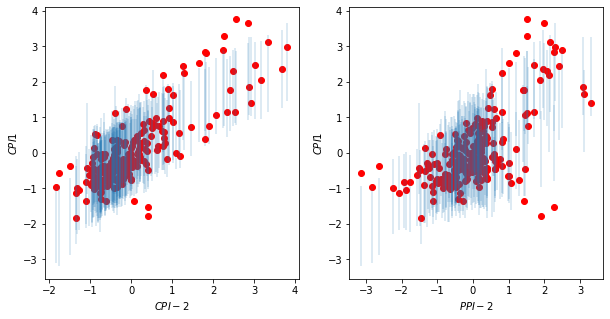

In [31]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['CPI-2'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['CPI-2'],dfst['CPI1'], color='r')
ax1.set(xlabel='$CPI-2$', ylabel='$CPI1$');
ax2.vlines(dfst['PPI-2'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['PPI-2'],dfst['CPI1'], color='r')
ax2.set(xlabel='$PPI-2$', ylabel='$CPI1$');

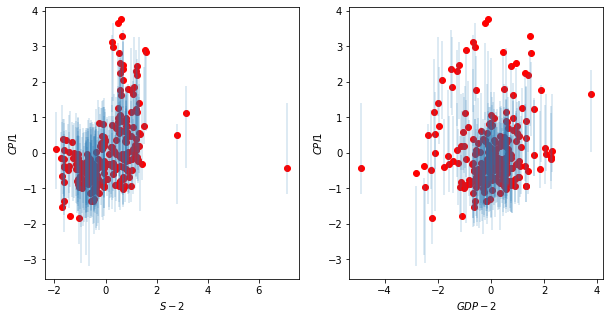

In [32]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['S-2'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['S-2'],dfst['CPI1'], color='r')
ax1.set(xlabel='$S-2$', ylabel='$CPI1$');
ax2.vlines(dfst['GDP-2'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['GDP-2'],dfst['CPI1'], color='r')
ax2.set(xlabel='$GDP-2$', ylabel='$CPI1$');

/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'b_aaa2'}>,
        <AxesSubplot:title={'center':'b_aaa2'}>],
       [<AxesSubplot:title={'center':'b_bond2'}>,
        <AxesSubplot:title={'center':'b_bond2'}>],
       [<AxesSubplot:title={'center':'b_gdp2'}>,
        <AxesSubplot:title={'center':'b_gdp2'}>],
       [<AxesSubplot:title={'center':'b_spend2'}>,
        <AxesSubplot:title={'center':'b_spend2'}>],
       [<AxesSubplot:title={'center':'b_ppi2'}>,
        <AxesSubplot:title={'center':'b_ppi2'}>],
       [<AxesSubplot:title={'center':'b_prod2'}>,
        <AxesSubplot:title={'center':'b_prod2'}>],
       [<AxesSubplot:title={'center':'b_sav2'}>,
        <AxesSubplot:title={'center':'b_sav2'}>],
       [<AxesSubplot:title={'center':'b_unemp2'}>,
        <AxesSubplot:title={'center':'b_unemp2'}>],
       [<AxesSubplot:title={'center':'b_cpip2'}>,
        <AxesSubplot:title={'center':'b_cpip2'}>]], dtype=object)

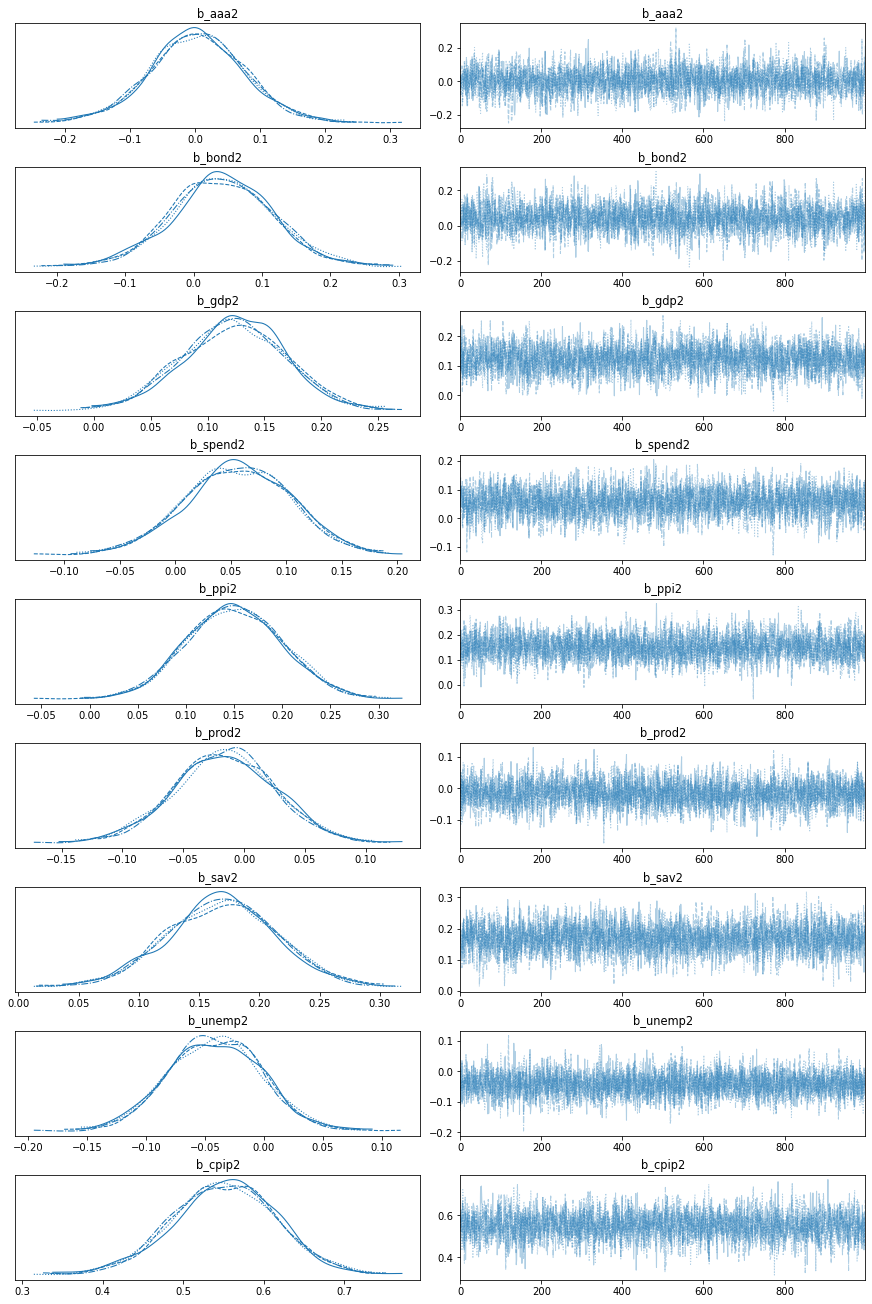

In [33]:
az.plot_trace(trace_normal,var_names=variables)

### Quarter[-3] variables model

In [34]:
with pm.Model() as normal:

      ## priors on coefficients
      constant = pm.Normal('constant', mu = 0.0, sd = 1.0)
      σ_prior = 0.1

      b_aaa3 = pm.Normal('b_aaa3', mu = 0, sd = σ_prior)
      b_bond3 = pm.Normal('b_bond3',mu=0,sd=σ_prior)
      b_gdp3 = pm.Normal('b_gdp3',mu = 0, sd = σ_prior)
      b_spend3 = pm.Normal('b_spend3',mu = 0, sd = σ_prior)
      b_ppi3 = pm.Normal('b_ppi3',mu = 0, sd = σ_prior)
      b_prod3 = pm.Normal('b_prod3',mu = 0, sd = σ_prior)
      b_sav3 = pm.Normal('b_sav3',mu = 0, sd = σ_prior)
      b_unemp3 = pm.Normal('b_unemp3',mu = 0, sd = σ_prior)
      b_cpip3 = pm.Normal('b_cpip3',mu = 0, sd = σ_prior)

      ## model
      μ = constant + b_aaa3 * baaa3 + b_bond3 * bbond3 + b_gdp3 * bgdp3 + b_spend3 * bspend3 + b_ppi3 * bppi3 + b_prod3 * bprod3 + b_sav3 * bsav3 + b_unemp3 * bunemp3 + b_cpip3 * bcpip3
      σ = pm.HalfNormal('σ', 1)

      inflation = pm.Normal('inflation', μ, σ, observed=bcpi1)
      trace_normal = pm.sample()

with normal:
      ppc_normal = pm.sample_posterior_predictive(trace_normal, var_names=["inflation"])

data_posterior_normal = az.from_pymc3(
    trace_normal,
    posterior_predictive = ppc_normal)

/tmp/ipykernel_93369/2087609938.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_normal = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, b_cpip3, b_unemp3, b_sav3, b_prod3, b_ppi3, b_spend3, b_gdp3, b_bond3, b_aaa3, constant]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 54 seconds.


/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [35]:
variables = ['b_aaa3','b_bond3', 'b_gdp3', 'b_spend3', 'b_ppi3', 'b_prod3', 'b_sav3', 'b_unemp3', 'b_cpip3']
az.summary(data_posterior_normal.posterior,variables)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
b_aaa3    0.009  0.073  -0.128    0.145      0.001    0.001    2910.0   
b_bond3   0.036  0.075  -0.106    0.178      0.001    0.001    2586.0   
b_gdp3    0.140  0.051   0.048    0.239      0.001    0.001    3669.0   
b_spend3  0.112  0.053   0.008    0.208      0.001    0.001    3267.0   
b_ppi3    0.145  0.056   0.035    0.247      0.001    0.001    3738.0   
b_prod3  -0.023  0.046  -0.111    0.063      0.001    0.001    4286.0   
b_sav3    0.199  0.050   0.103    0.289      0.001    0.001    3542.0   
b_unemp3 -0.039  0.044  -0.124    0.042      0.001    0.001    5028.0   
b_cpip3   0.439  0.070   0.305    0.567      0.001    0.001    3572.0   

          ess_tail  r_hat  
b_aaa3      2589.0    1.0  
b_bond3     2583.0    1.0  
b_gdp3      3179.0    1.0  
b_spend3    3183.0    1.0  
b_ppi3      3089.0    1.0  
b_prod3     2973.0    1.0  
b_sav3      3060.0    1.0  
b_unemp3    3301.0    1.0  
b_cpip3     3335.0    1.0

In the third past-quarter the same trends can be observed: CPI and PPI mean coefficients decrease, while the personal savings coefficient continues to rise. A st.dev. increase in GDP and government spending are also associated with a bigger than zero increase in target inflation. The highest mean coefficients include: CPI-3 (0.44), S-3 (0.2), PPI-3 (0.14), GDP-3 (0.14) and GOVSPEND-3 (0.11).

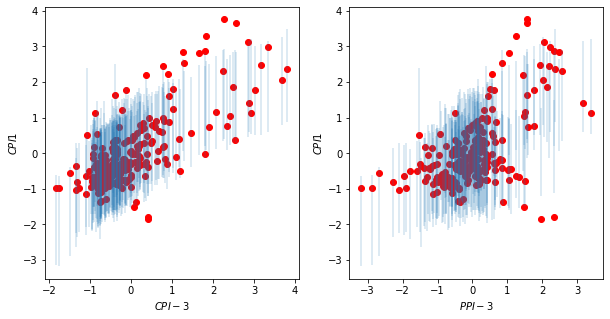

In [36]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['CPI-3'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['CPI-3'],dfst['CPI1'], color='r')
ax1.set(xlabel='$CPI-3$', ylabel='$CPI1$');
ax2.vlines(dfst['PPI-3'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['PPI-3'],dfst['CPI1'], color='r')
ax2.set(xlabel='$PPI-3$', ylabel='$CPI1$');

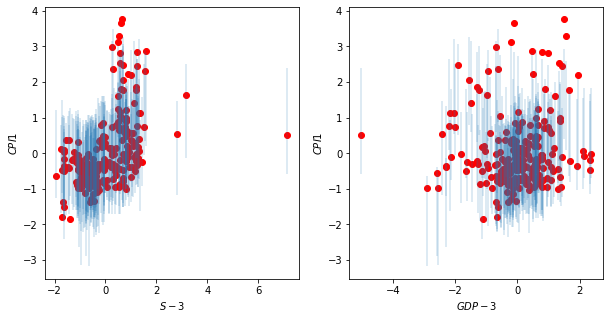

In [37]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['S-3'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['S-3'],dfst['CPI1'], color='r')
ax1.set(xlabel='$S-3$', ylabel='$CPI1$');
ax2.vlines(dfst['GDP-3'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['GDP-3'],dfst['CPI1'], color='r')
ax2.set(xlabel='$GDP-3$', ylabel='$CPI1$');

/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'b_aaa3'}>,
        <AxesSubplot:title={'center':'b_aaa3'}>],
       [<AxesSubplot:title={'center':'b_bond3'}>,
        <AxesSubplot:title={'center':'b_bond3'}>],
       [<AxesSubplot:title={'center':'b_gdp3'}>,
        <AxesSubplot:title={'center':'b_gdp3'}>],
       [<AxesSubplot:title={'center':'b_spend3'}>,
        <AxesSubplot:title={'center':'b_spend3'}>],
       [<AxesSubplot:title={'center':'b_ppi3'}>,
        <AxesSubplot:title={'center':'b_ppi3'}>],
       [<AxesSubplot:title={'center':'b_prod3'}>,
        <AxesSubplot:title={'center':'b_prod3'}>],
       [<AxesSubplot:title={'center':'b_sav3'}>,
        <AxesSubplot:title={'center':'b_sav3'}>],
       [<AxesSubplot:title={'center':'b_unemp3'}>,
        <AxesSubplot:title={'center':'b_unemp3'}>],
       [<AxesSubplot:title={'center':'b_cpip3'}>,
        <AxesSubplot:title={'center':'b_cpip3'}>]], dtype=object)

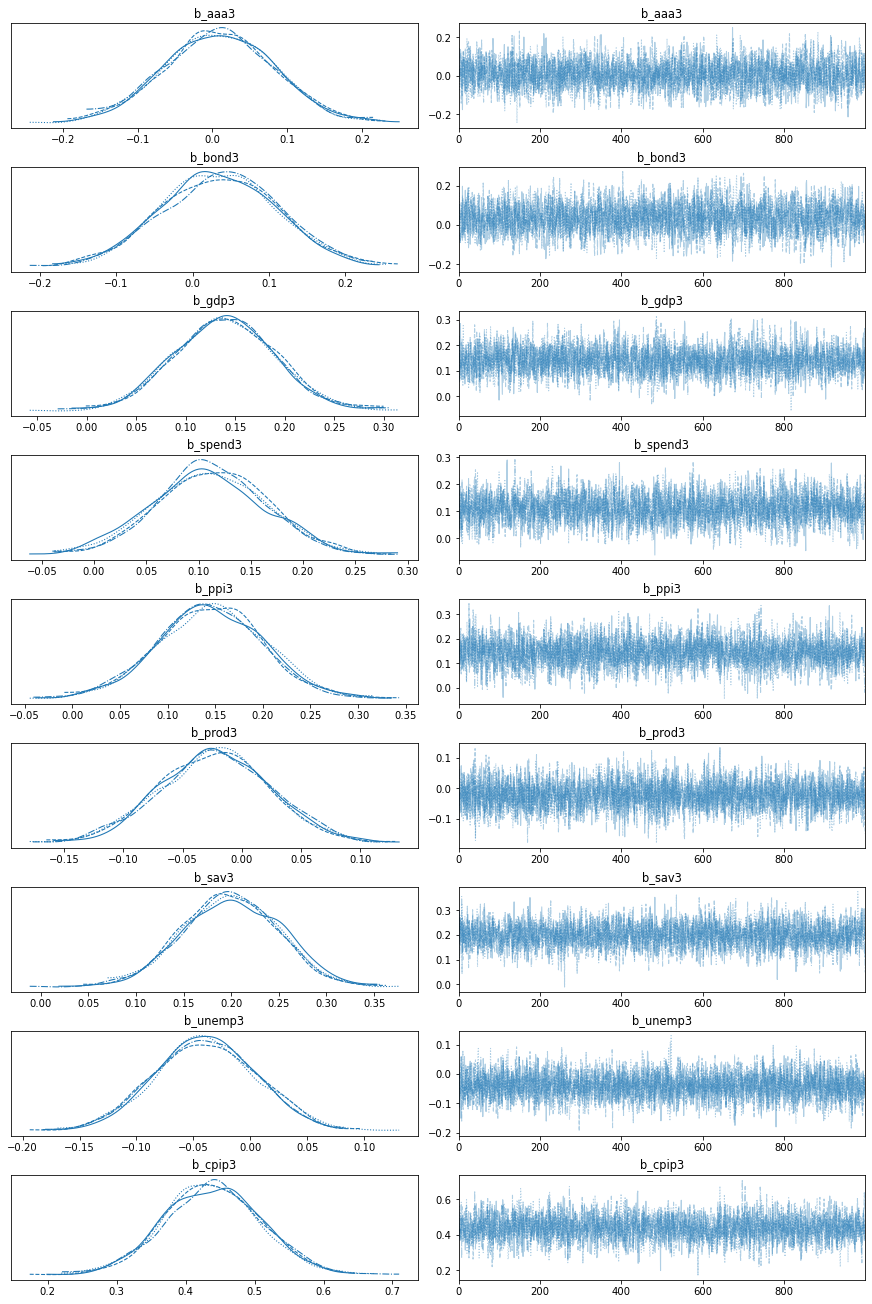

In [38]:
az.plot_trace(trace_normal,var_names=variables)

### Quarter[-4] variables model

In [39]:
with pm.Model() as normal:

      ## priors on coefficients
      constant = pm.Normal('constant', mu = 0.0, sd = 1.0)
      σ_prior = 0.1

      b_aaa4 = pm.Normal('b_aaa4', mu = 0, sd = σ_prior)
      b_bond4 = pm.Normal('b_bond4',mu=0,sd=σ_prior)
      b_gdp4 = pm.Normal('b_gdp4',mu = 0, sd = σ_prior)
      b_spend4 = pm.Normal('b_spend4',mu = 0, sd = σ_prior)
      b_ppi4 = pm.Normal('b_ppi4',mu = 0, sd = σ_prior)
      b_prod4 = pm.Normal('b_prod4',mu = 0, sd = σ_prior)
      b_sav4 = pm.Normal('b_sav4',mu = 0, sd = σ_prior)
      b_unemp4 = pm.Normal('b_unemp4',mu = 0, sd = σ_prior)
      b_cpip4 = pm.Normal('b_cpip4',mu = 0, sd = σ_prior)

      ## model
      μ = constant + b_aaa4 * baaa4 + b_bond4 * bbond4 + b_gdp4 * bgdp4 + b_spend4 * bspend4 + b_ppi4 * bppi4 + b_prod4 * bprod4 + b_sav4 * bsav4 + b_unemp4 * bunemp4 + b_cpip4 * bcpip4
      σ = pm.HalfNormal('σ', 1)

      inflation = pm.Normal('inflation', μ, σ, observed=bcpi1)
      trace_normal = pm.sample()

with normal:
      ppc_normal = pm.sample_posterior_predictive(trace_normal, var_names=["inflation"])

data_posterior_normal = az.from_pymc3(
    trace_normal,
    posterior_predictive = ppc_normal)

/tmp/ipykernel_93369/2411855892.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_normal = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, b_cpip4, b_unemp4, b_sav4, b_prod4, b_ppi4, b_spend4, b_gdp4, b_bond4, b_aaa4, constant]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 50 seconds.


/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [40]:
variables = ['b_aaa4','b_bond4', 'b_gdp4', 'b_spend4', 'b_ppi4', 'b_prod4', 'b_sav4', 'b_unemp4', 'b_cpip4']
az.summary(data_posterior_normal.posterior,variables)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
b_aaa4   -0.004  0.076  -0.149    0.136      0.001    0.001    4094.0   
b_bond4   0.020  0.078  -0.128    0.165      0.001    0.001    4025.0   
b_gdp4    0.155  0.053   0.054    0.252      0.001    0.001    3639.0   
b_spend4  0.105  0.054   0.005    0.209      0.001    0.001    3660.0   
b_ppi4    0.136  0.056   0.031    0.237      0.001    0.001    4065.0   
b_prod4  -0.006  0.046  -0.092    0.080      0.001    0.001    4457.0   
b_sav4    0.207  0.053   0.116    0.317      0.001    0.001    4325.0   
b_unemp4 -0.027  0.048  -0.117    0.062      0.001    0.001    4995.0   
b_cpip4   0.403  0.070   0.269    0.530      0.001    0.001    3804.0   

          ess_tail  r_hat  
b_aaa4      3144.0    1.0  
b_bond4     3197.0    1.0  
b_gdp4      3252.0    1.0  
b_spend4    3188.0    1.0  
b_ppi4      2839.0    1.0  
b_prod4     3724.0    1.0  
b_sav4      3132.0    1.0  
b_unemp4    3354.0    1.0  
b_cpip4     3150.0    1.0

CPI and PPI coefficients continue to slide in the fourth past-quarter, savings and GDP coefficients continue to grow. The mean government spending coefficient dips slightly. GDP overtakes PPI as the third highest mean coefficient. The highest mean coefficients include: CPI-4 (0.4), S-4 (0.21), GDP-4 (0.16), PPI-4 (0.14) and GOVSPEND-4 (0.11).

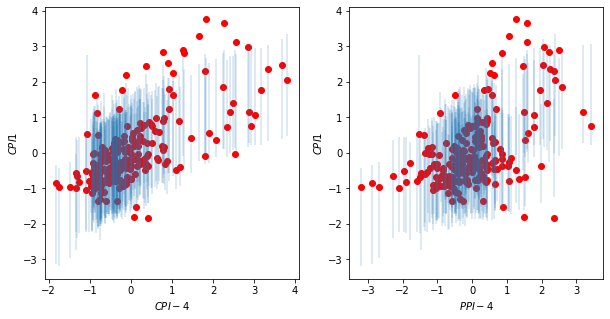

In [41]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['CPI-4'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['CPI-4'],dfst['CPI1'], color='r')
ax1.set(xlabel='$CPI-4$', ylabel='$CPI1$');
ax2.vlines(dfst['PPI-4'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['PPI-4'],dfst['CPI1'], color='r')
ax2.set(xlabel='$PPI-4$', ylabel='$CPI1$');

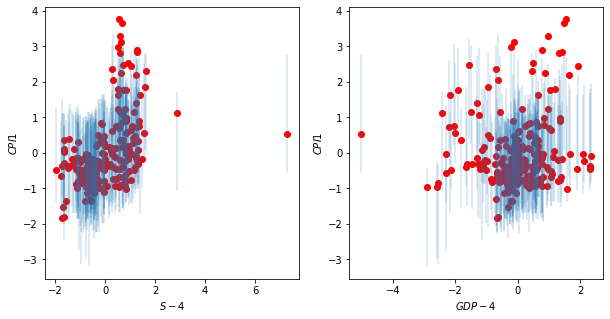

In [42]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['S-4'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['S-4'],dfst['CPI1'], color='r')
ax1.set(xlabel='$S-4$', ylabel='$CPI1$');
ax2.vlines(dfst['GDP-4'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['GDP-4'],dfst['CPI1'], color='r')
ax2.set(xlabel='$GDP-4$', ylabel='$CPI1$');

/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'b_aaa4'}>,
        <AxesSubplot:title={'center':'b_aaa4'}>],
       [<AxesSubplot:title={'center':'b_bond4'}>,
        <AxesSubplot:title={'center':'b_bond4'}>],
       [<AxesSubplot:title={'center':'b_gdp4'}>,
        <AxesSubplot:title={'center':'b_gdp4'}>],
       [<AxesSubplot:title={'center':'b_spend4'}>,
        <AxesSubplot:title={'center':'b_spend4'}>],
       [<AxesSubplot:title={'center':'b_ppi4'}>,
        <AxesSubplot:title={'center':'b_ppi4'}>],
       [<AxesSubplot:title={'center':'b_prod4'}>,
        <AxesSubplot:title={'center':'b_prod4'}>],
       [<AxesSubplot:title={'center':'b_sav4'}>,
        <AxesSubplot:title={'center':'b_sav4'}>],
       [<AxesSubplot:title={'center':'b_unemp4'}>,
        <AxesSubplot:title={'center':'b_unemp4'}>],
       [<AxesSubplot:title={'center':'b_cpip4'}>,
        <AxesSubplot:title={'center':'b_cpip4'}>]], dtype=object)

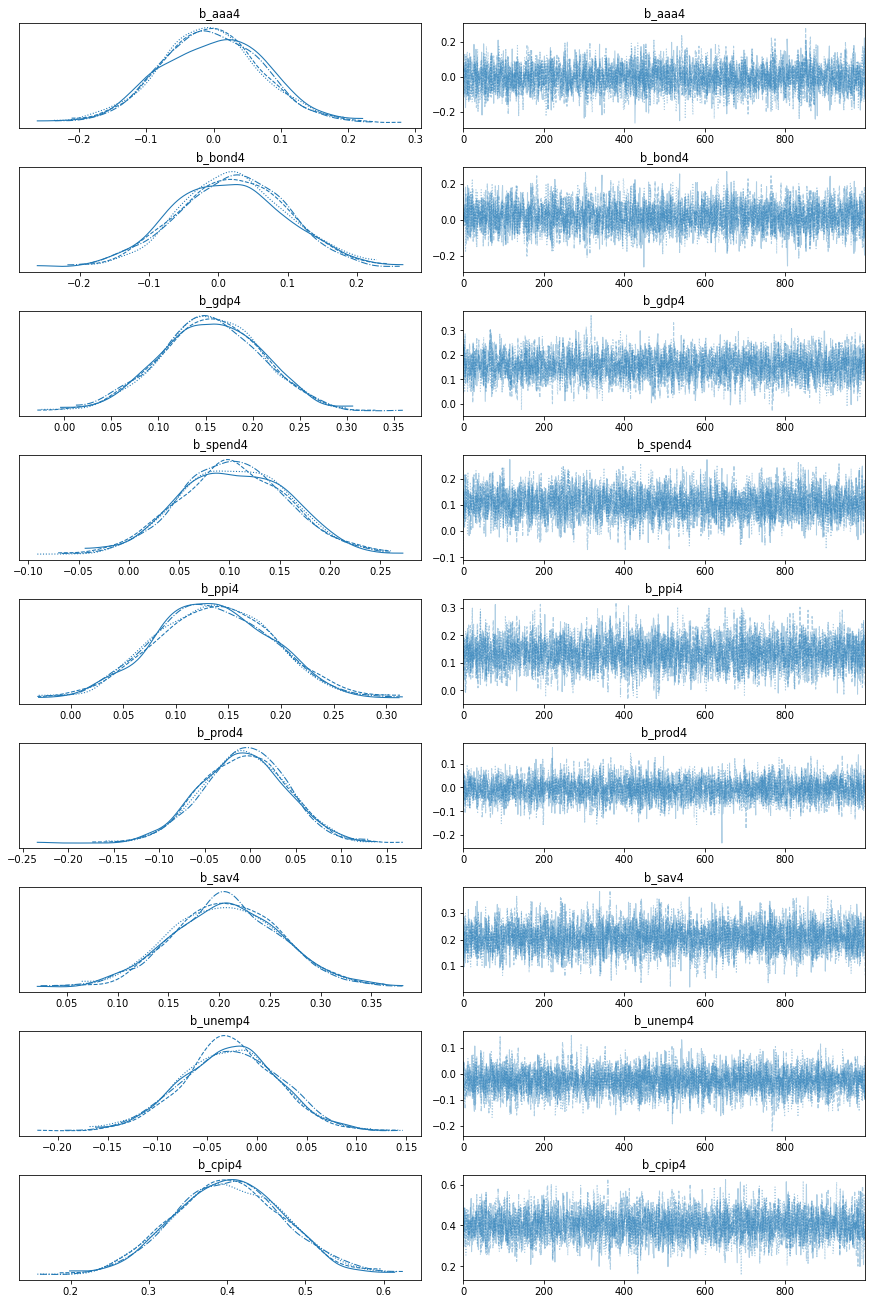

In [43]:
az.plot_trace(trace_normal,var_names=variables)

### Quarter[-5] variables model

In [44]:
with pm.Model() as normal:

      ## priors on coefficients
      constant = pm.Normal('constant', mu = 0.0, sd = 1.0)
      σ_prior = 0.1

      b_aaa5 = pm.Normal('b_aaa5', mu = 0, sd = σ_prior)
      b_bond5 = pm.Normal('b_bond5',mu=0,sd=σ_prior)
      b_gdp5 = pm.Normal('b_gdp5',mu = 0, sd = σ_prior)
      b_spend5 = pm.Normal('b_spend5',mu = 0, sd = σ_prior)
      b_ppi5 = pm.Normal('b_ppi5',mu = 0, sd = σ_prior)
      b_prod5 = pm.Normal('b_prod5',mu = 0, sd = σ_prior)
      b_sav5 = pm.Normal('b_sav5',mu = 0, sd = σ_prior)
      b_unemp5 = pm.Normal('b_unemp5',mu = 0, sd = σ_prior)
      b_cpip5 = pm.Normal('b_cpip5',mu = 0, sd = σ_prior)

      ## model
      μ = constant + b_aaa5 * baaa5 + b_bond5 * bbond5 + b_gdp5 * bgdp5 + b_spend5 * bspend5 + b_ppi5 * bppi5 + b_prod5 * bprod5 + b_sav5 * bsav5 + b_unemp5 * bunemp5 + b_cpip5 * bcpip5
      σ = pm.HalfNormal('σ', 1)

      inflation = pm.Normal('inflation', μ, σ, observed=bcpi1)
      trace_normal = pm.sample()

with normal:
      ppc_normal = pm.sample_posterior_predictive(trace_normal, var_names=["inflation"])

data_posterior_normal = az.from_pymc3(
    trace_normal,
    posterior_predictive = ppc_normal)

/tmp/ipykernel_93369/1633834011.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_normal = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, b_cpip5, b_unemp5, b_sav5, b_prod5, b_ppi5, b_spend5, b_gdp5, b_bond5, b_aaa5, constant]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.


/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [45]:
variables = ['b_aaa5','b_bond5', 'b_gdp5', 'b_spend5', 'b_ppi5', 'b_prod5', 'b_sav5', 'b_unemp5', 'b_cpip5']
az.summary(data_posterior_normal.posterior,variables)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
b_aaa5    0.003  0.073  -0.122    0.152      0.001    0.001    3509.0   
b_bond5   0.012  0.074  -0.132    0.145      0.001    0.001    3825.0   
b_gdp5    0.178  0.054   0.078    0.283      0.001    0.001    3582.0   
b_spend5  0.139  0.056   0.033    0.239      0.001    0.001    4250.0   
b_ppi5    0.109  0.058   0.005    0.223      0.001    0.001    4337.0   
b_prod5   0.001  0.050  -0.094    0.090      0.001    0.001    4118.0   
b_sav5    0.209  0.054   0.112    0.313      0.001    0.001    5027.0   
b_unemp5 -0.023  0.049  -0.118    0.067      0.001    0.001    5118.0   
b_cpip5   0.366  0.070   0.232    0.495      0.001    0.001    4441.0   

          ess_tail  r_hat  
b_aaa5      2886.0    1.0  
b_bond5     3232.0    1.0  
b_gdp5      3622.0    1.0  
b_spend5    3276.0    1.0  
b_ppi5      3150.0    1.0  
b_prod5     3401.0    1.0  
b_sav5      3522.0    1.0  
b_unemp5    3154.0    1.0  
b_cpip5     3273.0    1.0

CPI and PPI coefficients continue to fall in the fifth past-quarter, savings and GDP coefficients continue to grow slightly. The mean government spending coefficient increases again, overtaking PPI. The highest mean coefficients include: CPI-5 (0.367), S-5 (0.208), GDP-5 (0.180), GOVSPEND-5 (0.139) and PPI-5 (0.108).

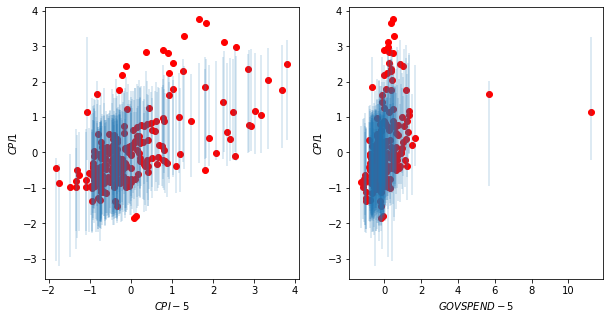

In [46]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['CPI-5'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['CPI-5'],dfst['CPI1'], color='r')
ax1.set(xlabel='$CPI-5$', ylabel='$CPI1$');
ax2.vlines(dfst['GOVSPEND-5'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['GOVSPEND-5'],dfst['CPI1'], color='r')
ax2.set(xlabel='$GOVSPEND-5$', ylabel='$CPI1$');

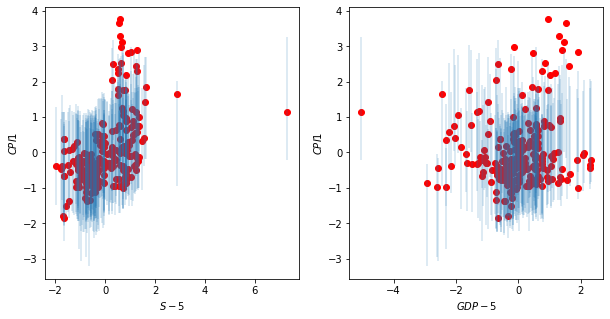

In [47]:
percentiles = np.percentile(ppc_normal['inflation'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.vlines(dfst['S-5'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(dfst['S-5'],dfst['CPI1'], color='r')
ax1.set(xlabel='$S-5$', ylabel='$CPI1$');
ax2.vlines(dfst['GDP-5'],percentiles[:,0],percentiles[:,1],alpha=0.2)
ax2.scatter(dfst['GDP-5'],dfst['CPI1'], color='r')
ax2.set(xlabel='$GDP-5$', ylabel='$CPI1$');

/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'b_aaa5'}>,
        <AxesSubplot:title={'center':'b_aaa5'}>],
       [<AxesSubplot:title={'center':'b_bond5'}>,
        <AxesSubplot:title={'center':'b_bond5'}>],
       [<AxesSubplot:title={'center':'b_gdp5'}>,
        <AxesSubplot:title={'center':'b_gdp5'}>],
       [<AxesSubplot:title={'center':'b_spend5'}>,
        <AxesSubplot:title={'center':'b_spend5'}>],
       [<AxesSubplot:title={'center':'b_ppi5'}>,
        <AxesSubplot:title={'center':'b_ppi5'}>],
       [<AxesSubplot:title={'center':'b_prod5'}>,
        <AxesSubplot:title={'center':'b_prod5'}>],
       [<AxesSubplot:title={'center':'b_sav5'}>,
        <AxesSubplot:title={'center':'b_sav5'}>],
       [<AxesSubplot:title={'center':'b_unemp5'}>,
        <AxesSubplot:title={'center':'b_unemp5'}>],
       [<AxesSubplot:title={'center':'b_cpip5'}>,
        <AxesSubplot:title={'center':'b_cpip5'}>]], dtype=object)

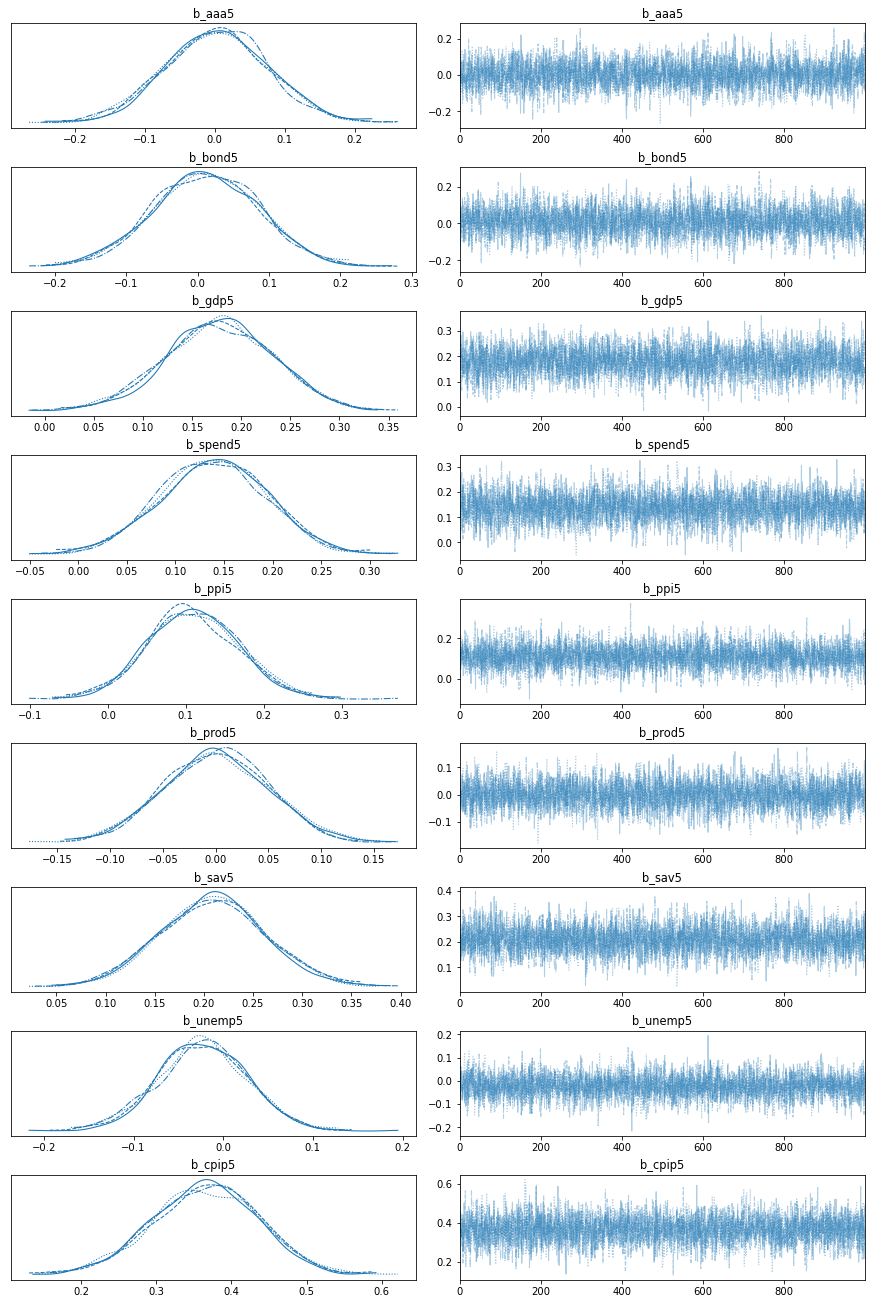

In [48]:
az.plot_trace(trace_normal,var_names=variables)

# Robustness analysis 

Several steps were taken in order to ensure the robustness of results. 

These include:
- creation of additional target variables for neural network analysis
- tuning of hyperparameters (no. of epochs, train and test set split) and the inclusion of train and validation loss plots
- for Lasso regressions, different penalty terms and different sets of explanatory variables
- the recovery of randomly generated variables using a Bayesian model

As for the outliers, these were left in the dataframes for good reason. Namely, it is the belief that the most interesting things in economics happen at the fringes. There is good reason to believe that certain marginal outcomes, such as a heavy drop in GDP, a big increase in government spending or a severe recession, can be a good opportunity to study our economies.

# Discussion and conclusion 



Future (next-quarter) levels of inflation can be predicted with around 50% accuracy. Prediction of trend (rise or fall) of next-quarter inflation seems a little easier, with the model routinely surpassing 50% probability of correct predictions on the test set. This probability rises to even 67% when trying to predict the category (low, moderate, elevated or alarming) into which the inflation rate falls. 

Apart from previous-quarter CPI and PPI measures, which lose their predictive power going back, GDP, government spending and, in particular, the personal savings rate, exhibit a pressure of 0.1-0.2 std. dev. on target inflation, with a reverse trend present. Despite, the decline of PPI as a forecasting measure into the past quarters, the mean coefficient of CPI in the fifth past-quarter remains well above the seond highest mean coefficent (savings) and twice as big as the mean coefficient for GDP, possibly signalling the importance and build-up of second-round effects or the stickinness of prices in an inflation surge.

Lasso regressions also show a correlation between current (Q0) market yield on 10-year U.S Treasury bonds and next-quarter inflation.

While causal pathways for government spending, GDP and, especially, savings could be established and argued for, the evidence for the presence of an effect seems unsubstantial. However, the role of these indicators as potentially valuable forecasting tools should not be overlooked.

Further reaserch into this topic should include larger swaths of data: more observations, collected in other, homogeneous environments and a larger number of explanatory variables, which could be used for more accurate inflation prediction. In particular, a focus on trade, supply chains and monetary indicators should be explored.